In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import nibabel as nib
import random
from scipy import stats
from scipy import fft
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import os
import pickle

In [2]:
# assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'

ROOT_DIR = BRANDON
data_dir = ROOT_DIR + 'raw-data/agriVision/toy-agriVision-RGB-cleaned'
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
file_names = os.listdir(data_dir)
n = len(file_list)
n

1008

In [3]:
os.chdir(ROOT_DIR + "testing-framework/")
from utilities import *
from plot_utilities import *
os.chdir(ROOT_DIR + "dataset-preparation/")
from transform_utilities import *
from scipy import ndimage


In [4]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            



# Red Wavelet

In [5]:
red_wv = convert_to_wavelet_basis(data_dir, "Red", debug=True)
red_wv.head()

10 layers being used


100%|██████████| 1008/1008 [00:12<00:00, 78.07it/s]


channel  layer orientation  \
0     Red      1          L1   
1     Red      2           D   
2     Red      2           H   
3     Red      2           V   
4     Red      3           D   

                                                data  
0  [152.19140625000017, 899.3945312500011, 712.05...  
1  [-53.769531250000064, 60.37890625000011, -0.19...  
2  [63.18359375000008, 51.01953125000001, 5.48828...  
3  [-87.51171875000009, -9.363281250000057, -20.6...  
4  [7.289062500000005, 7.234375000000006, -2.5312...

In [6]:
red_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    red_df = pd.concat([red_df, ks_df], axis = 0)
red_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_79795/1513324452.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  red_df = pd.concat([red_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.067460   2.033603e-02
0     2     D      H  0.122024   5.884621e-07
1     2     D      V  0.133929   2.686059e-08
2     3     H      V  0.033978   1.902156e-02
1     3     D      V  0.092758   1.640262e-15
0     3     D      H  0.113095   7.221825e-23
2     4     H      V  0.023996   1.822634e-04
1     4     D      V  0.080295   1.135433e-45
0     4     D      H  0.090774   2.854273e-58
2     5     H      V  0.024352   4.754029e-17
1     5     D      V  0.057865   2.527414e-94
0     5     D      H  0.073986  5.350311e-154
2     6     H      V  0.015474   2.893023e-27
1     6     D      V  0.042322  3.025758e-201
0     6     D      H  0.053219  4.790925e-318
2     7     H      V  0.017916  2.471750e-144
1     7     D      V  0.035913   0.000000e+00
0     7     D      H  0.049557   0.000000e+00
2     8     H      V  0.019989   0.000000e+00
1     8     D      V  0.044440   0.000000e+00
0     8     D      H  0.060035   0.000000e+00
2     9     H      V  0.021750   0.000000e+00
1     9     D      V  0.048192   0.000000e+00
0     9     D      H  0.064262   0.000000e+00
2    10     H      V  0.030824   0.000000e+00
1    10     D      V  0.036482   0.000000e+00
0    10     D      H  0.048666   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


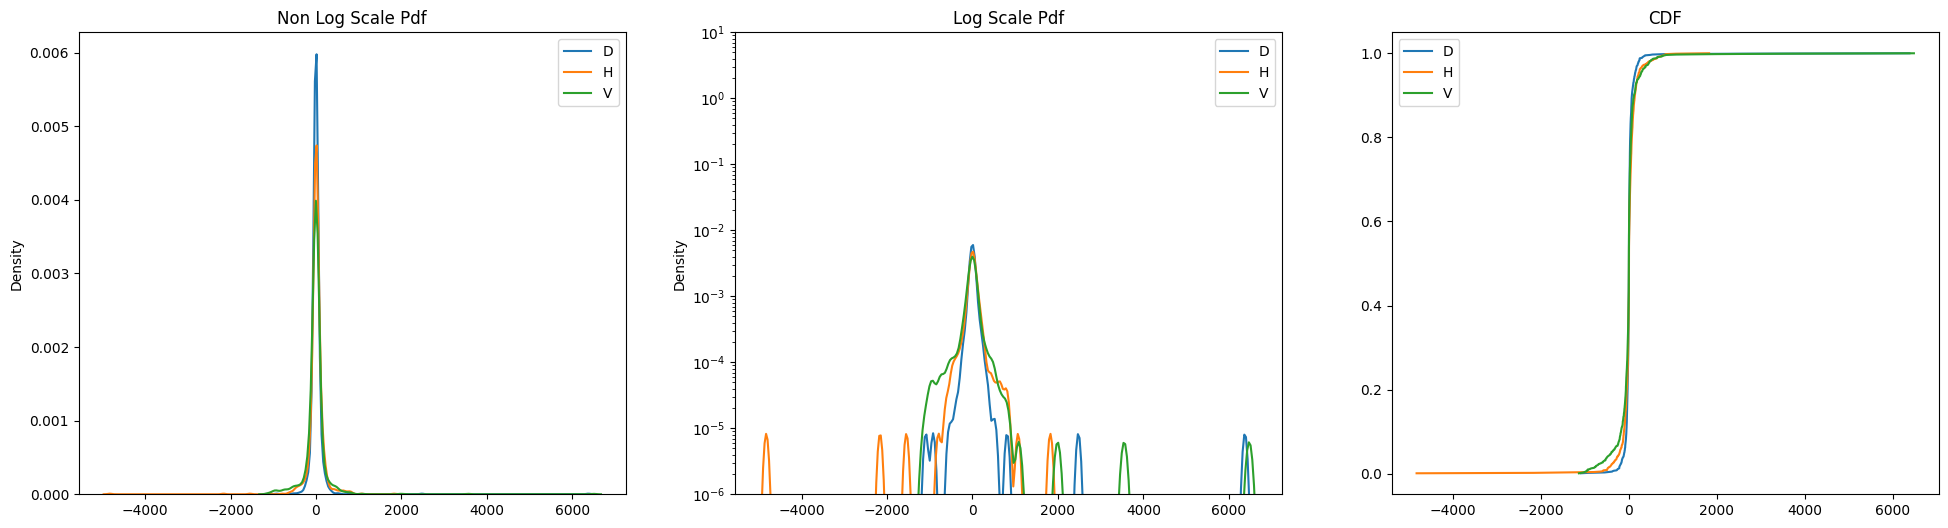

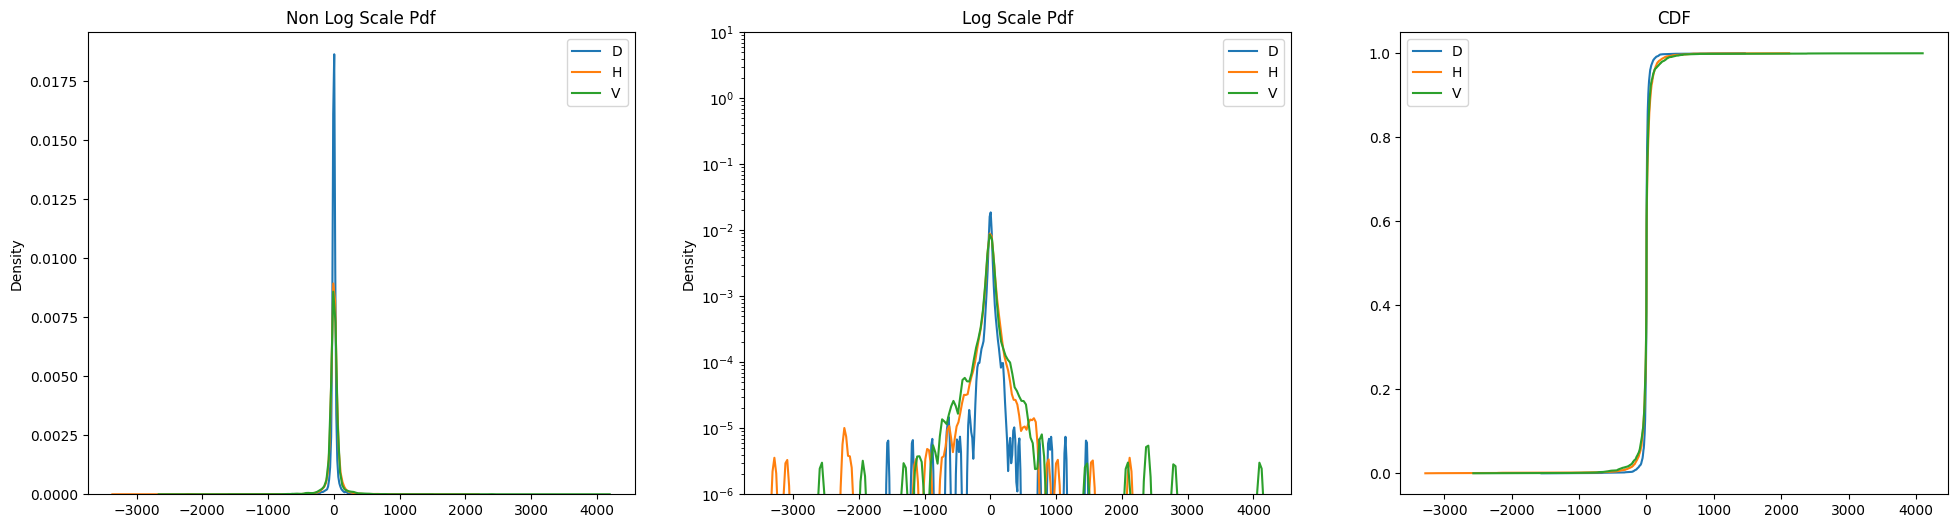

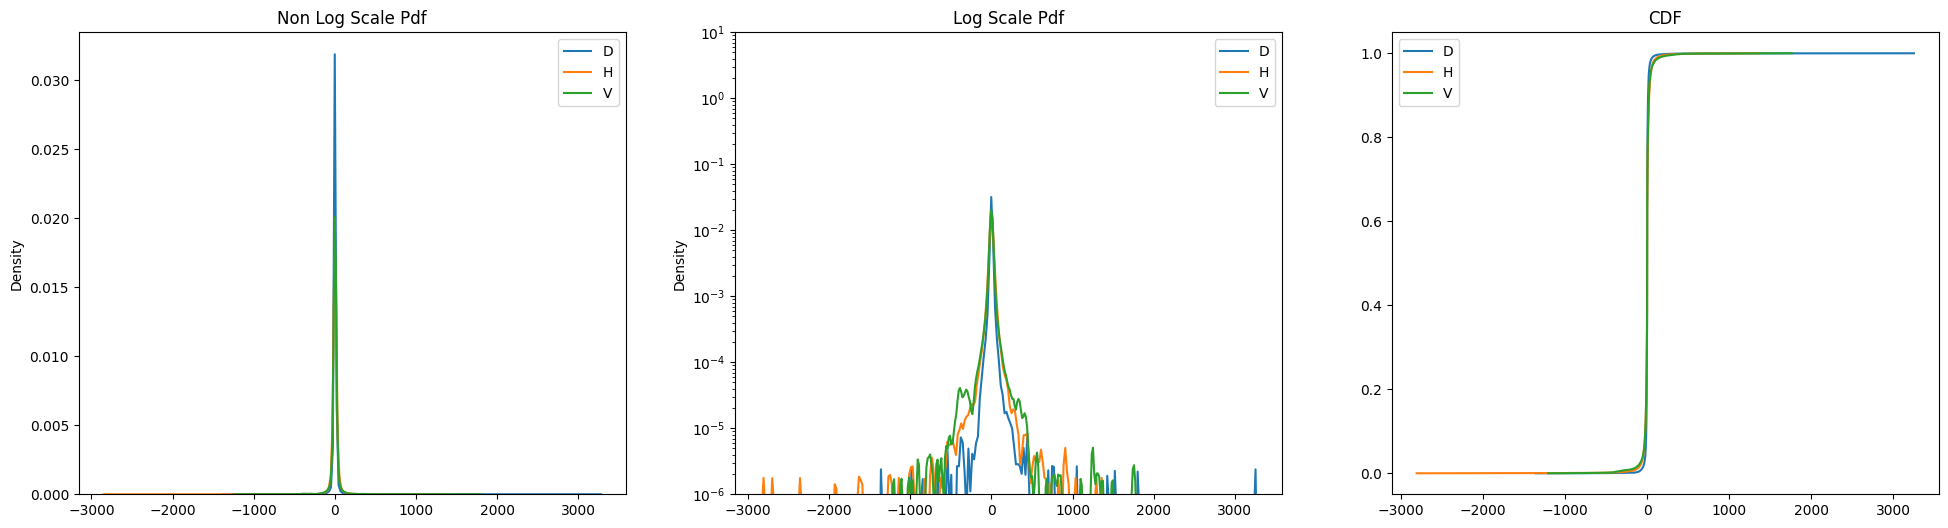

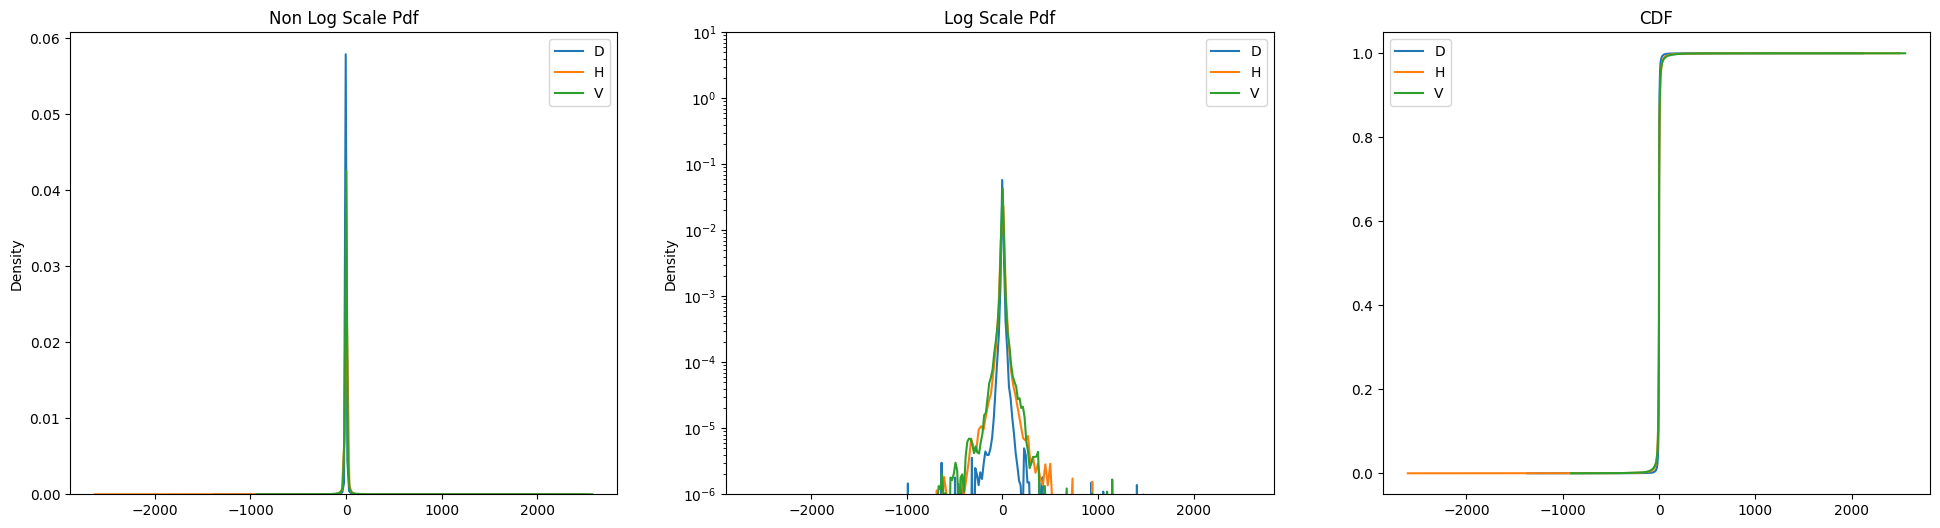

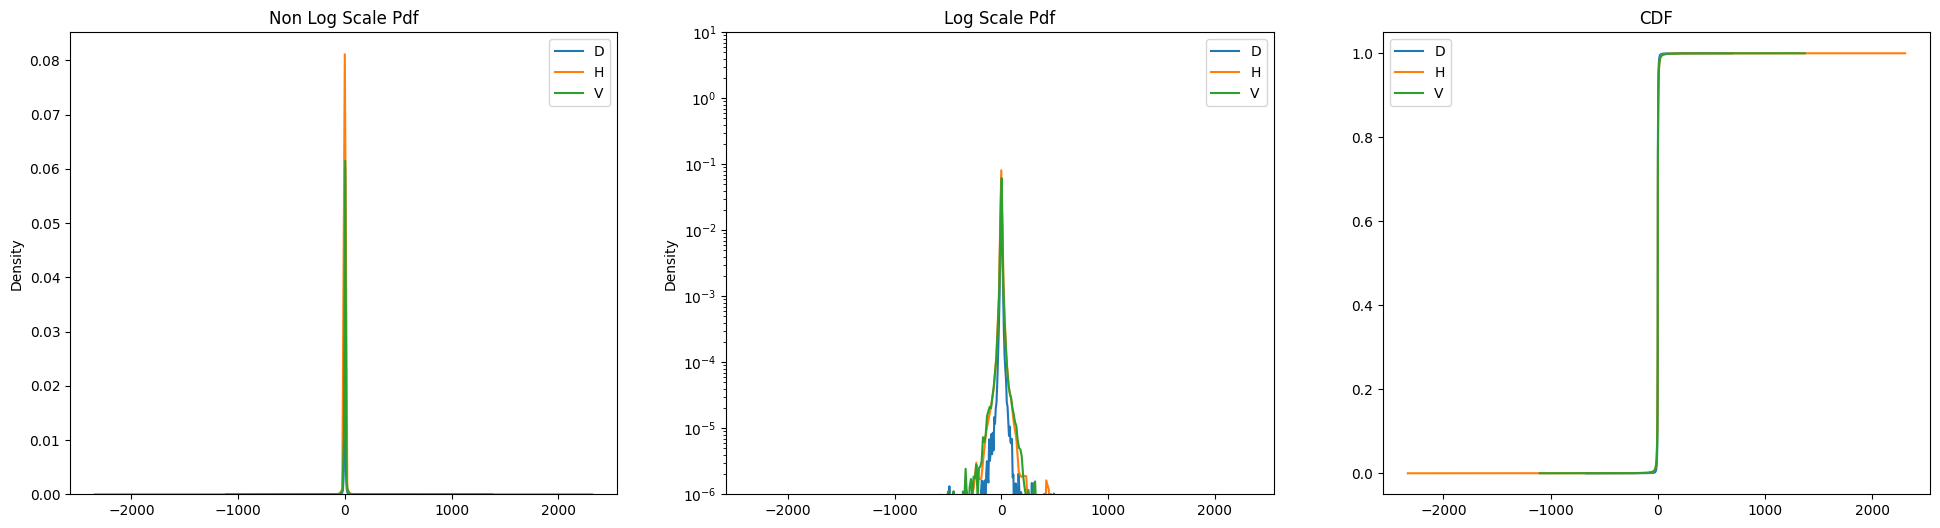

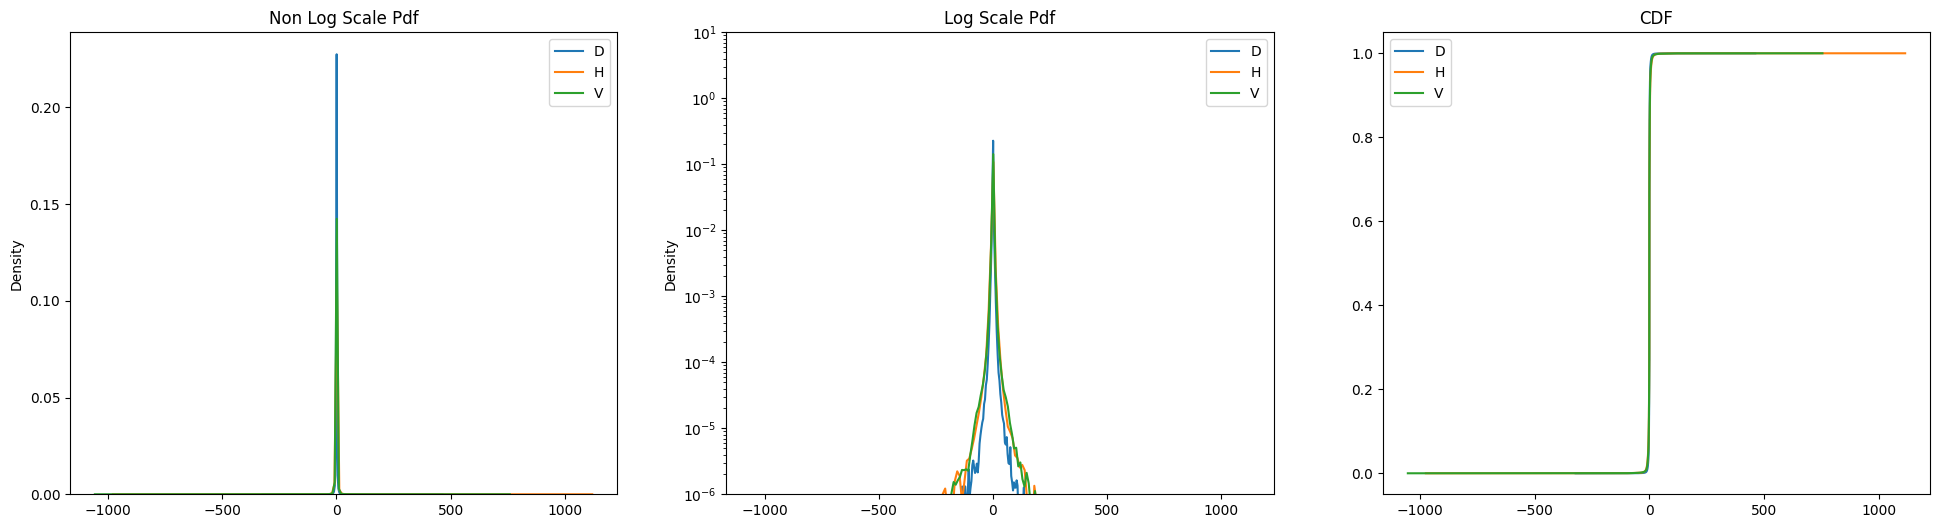

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


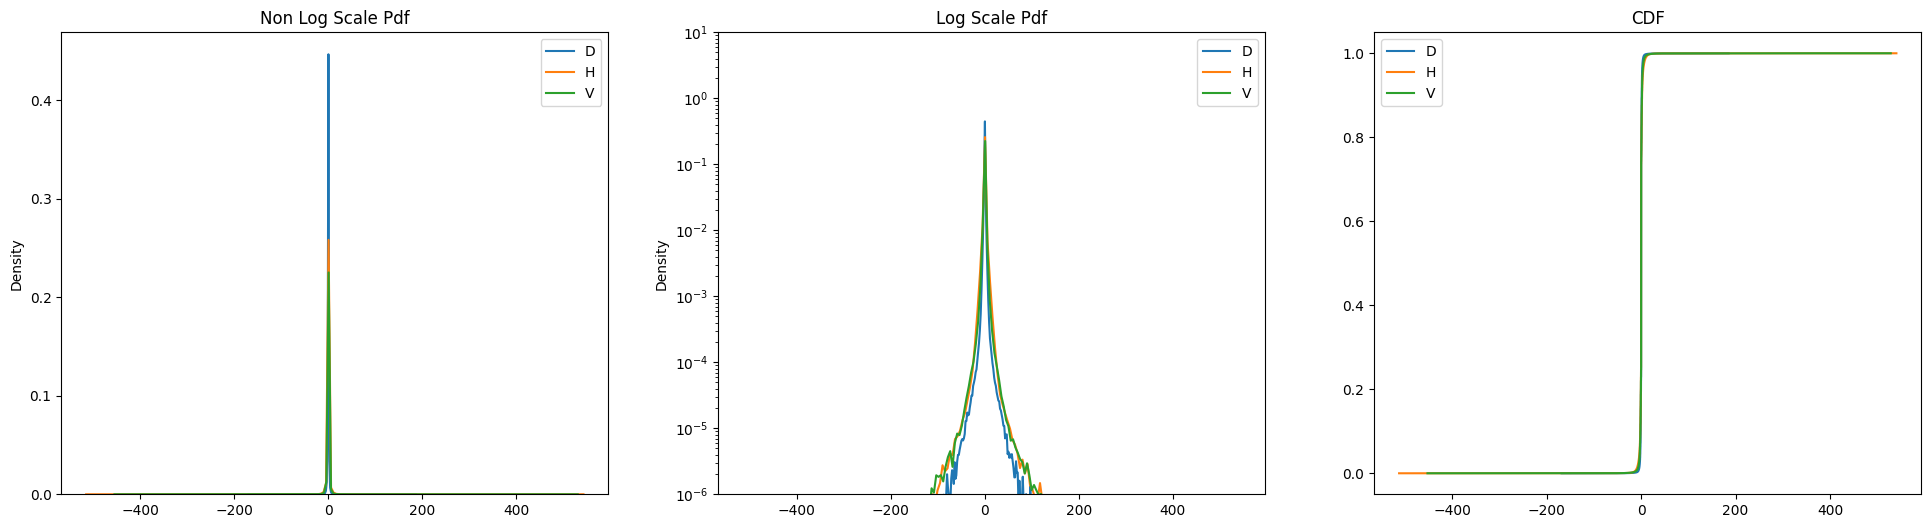

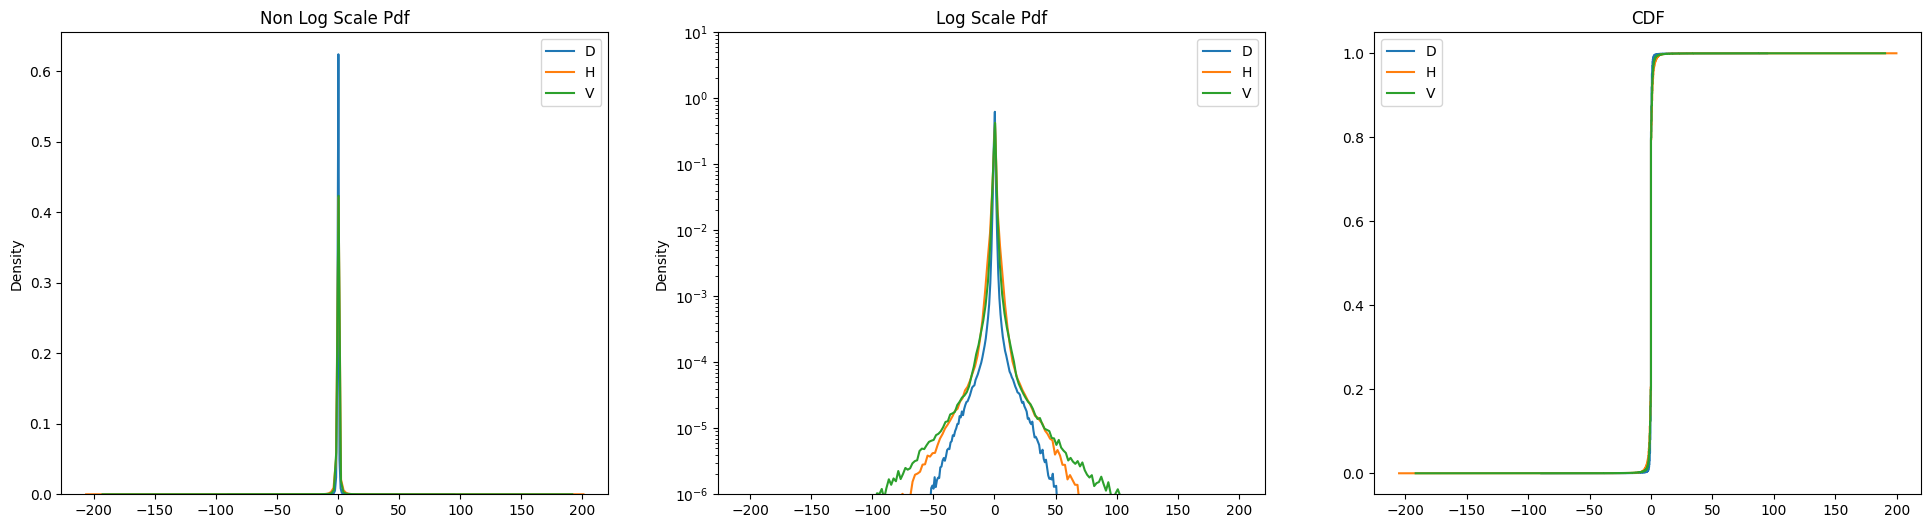

In [27]:
for i in range(2, 10):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


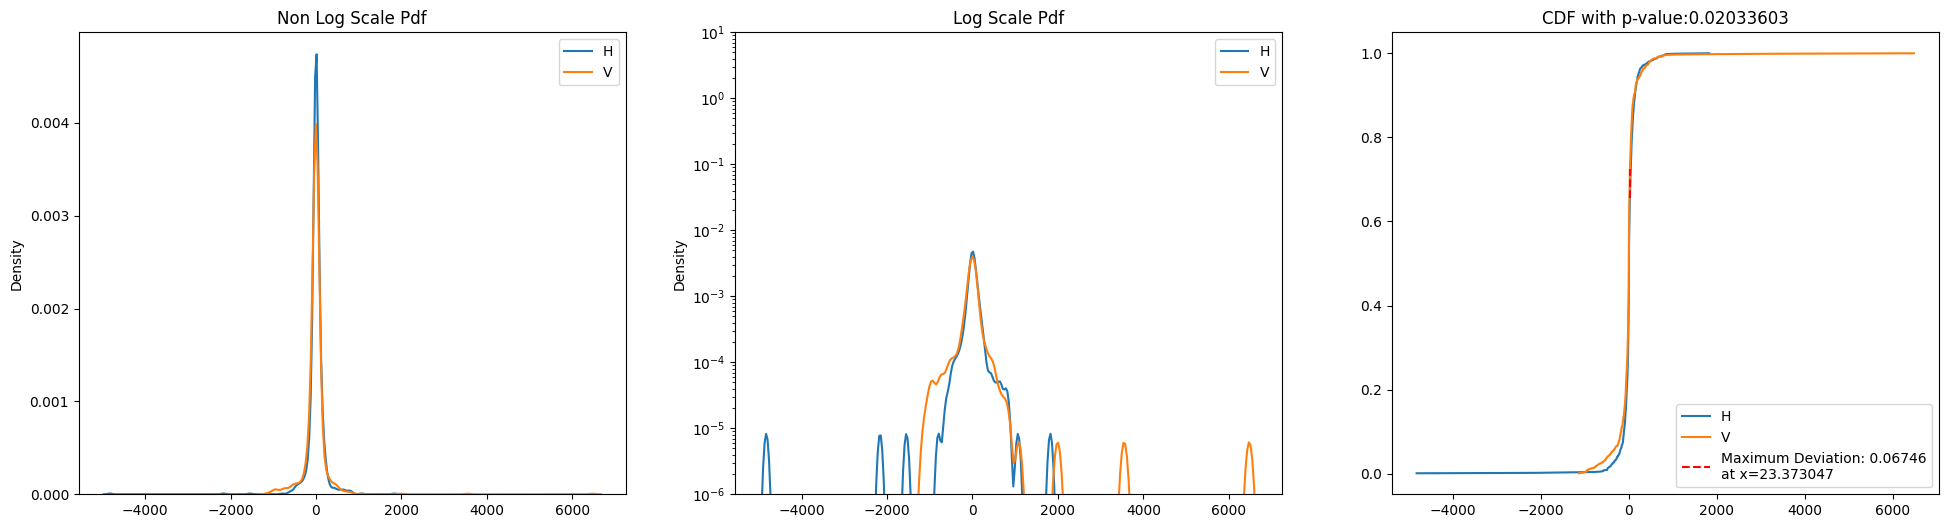

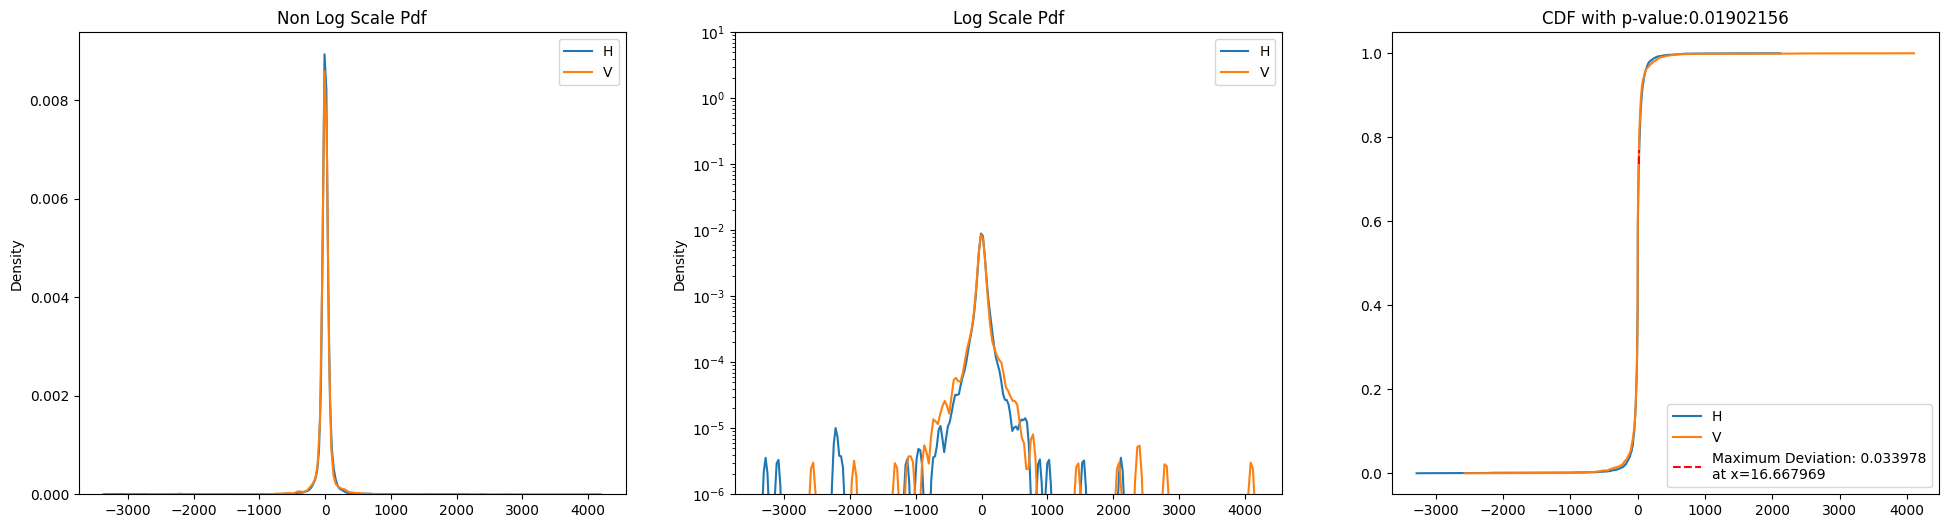

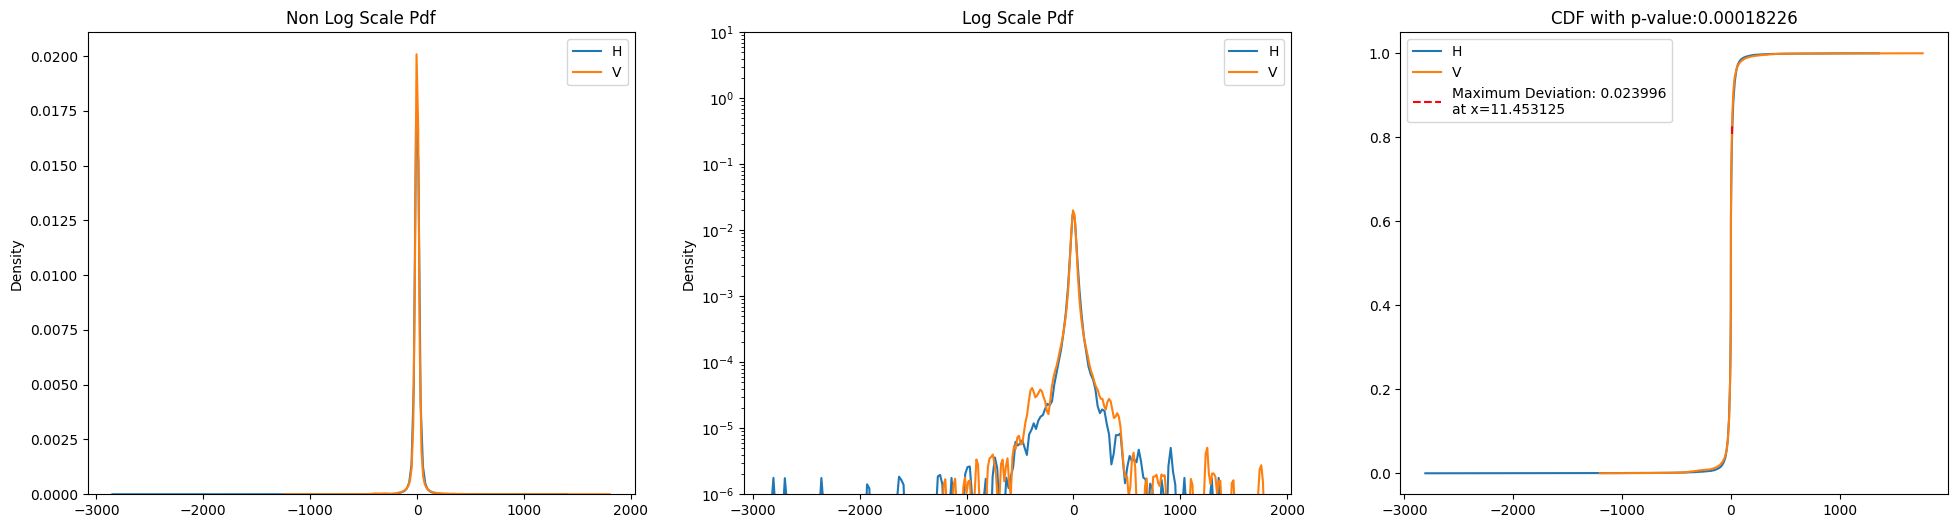

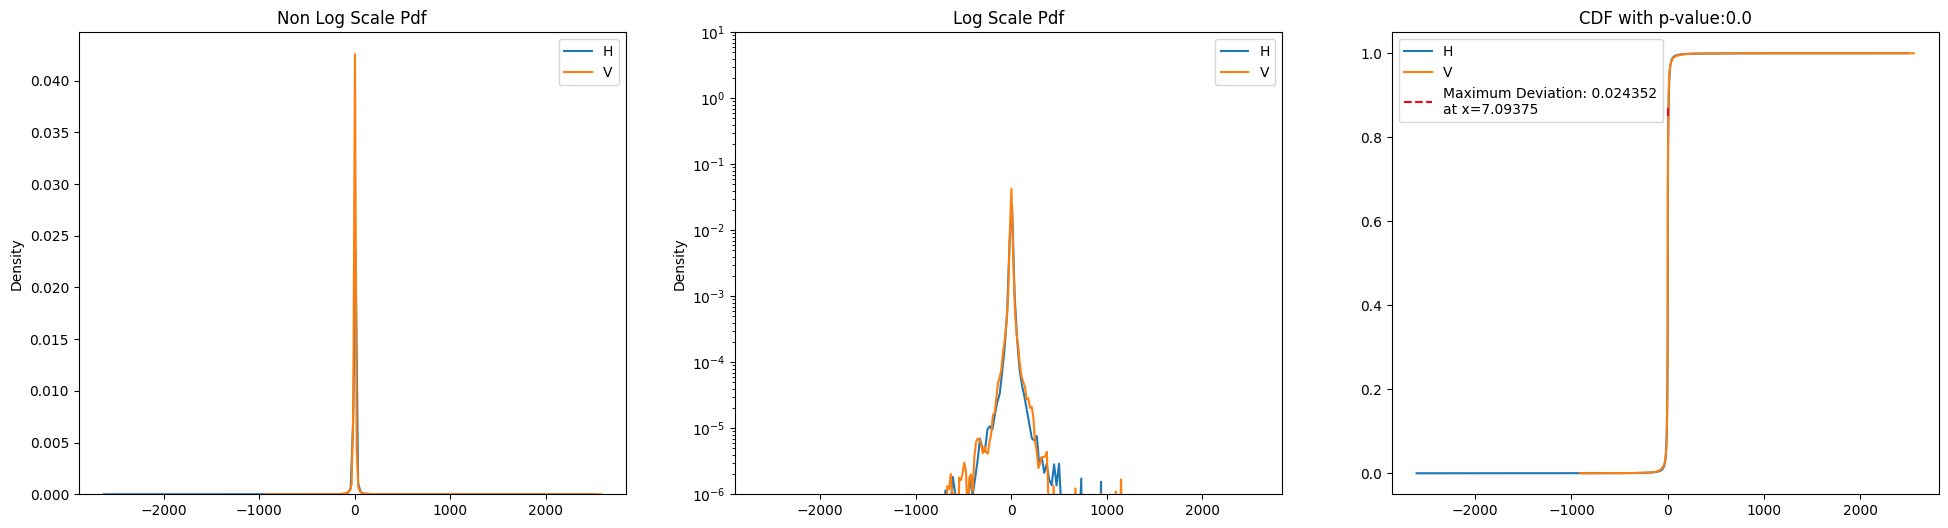

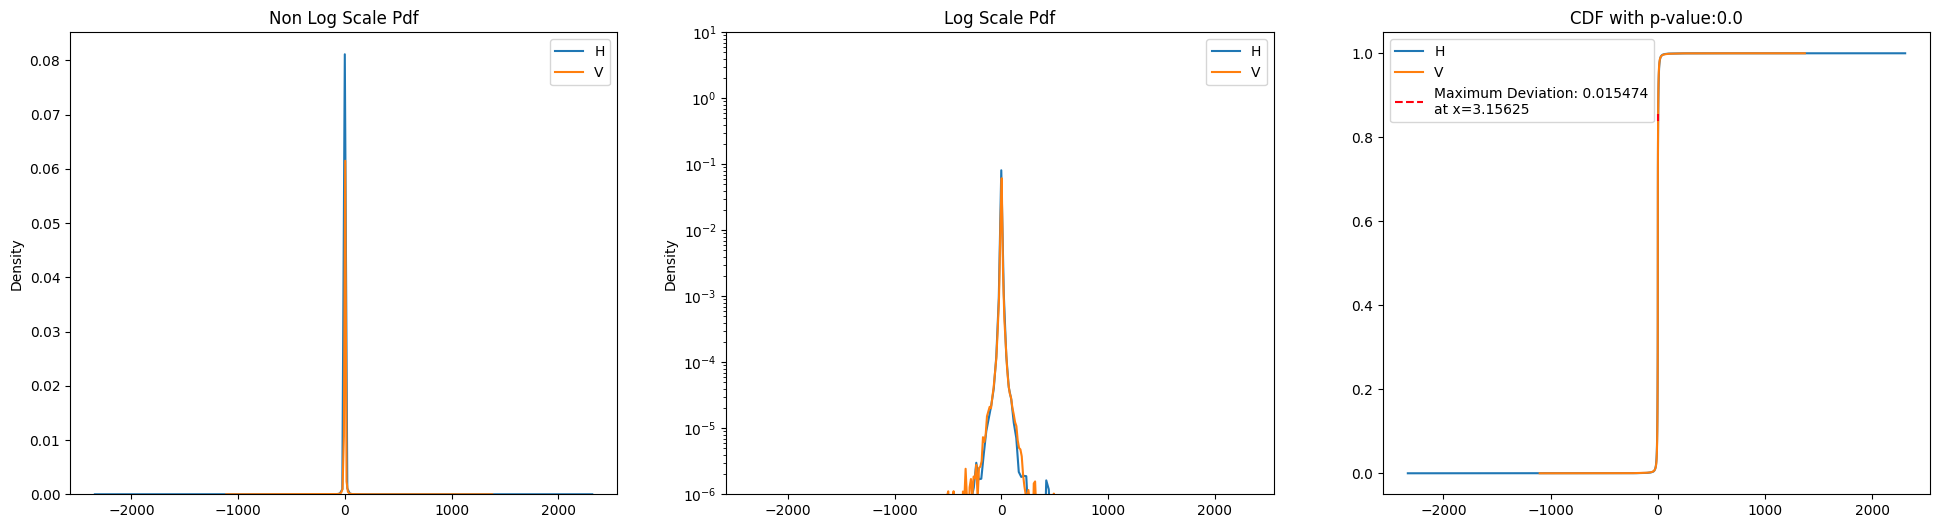

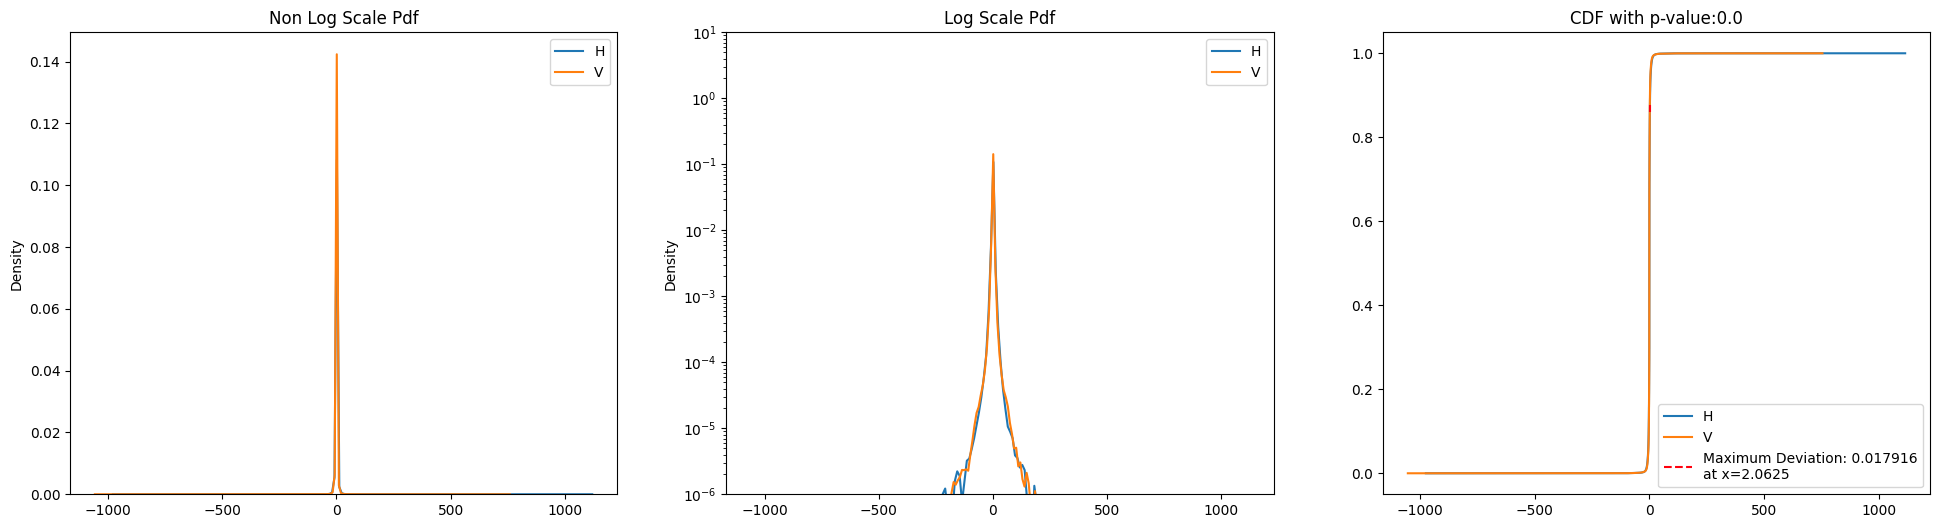

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


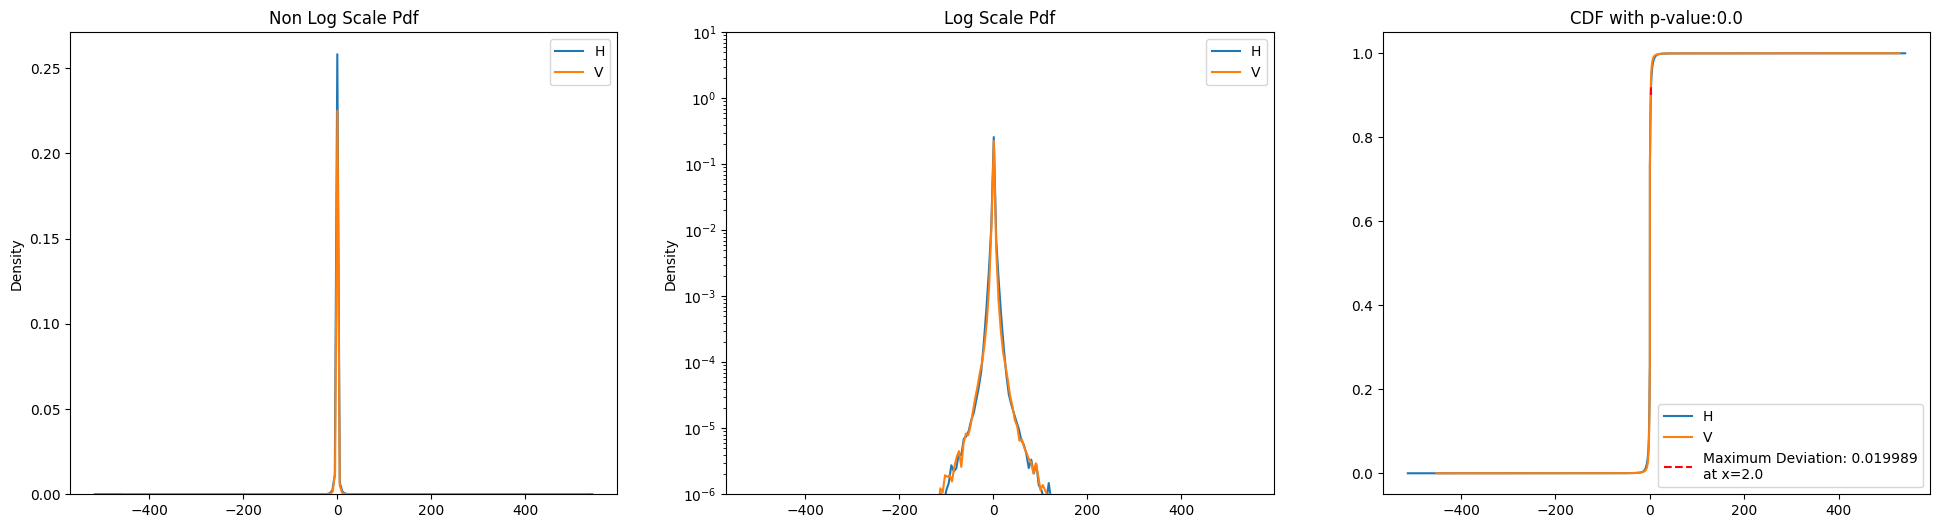

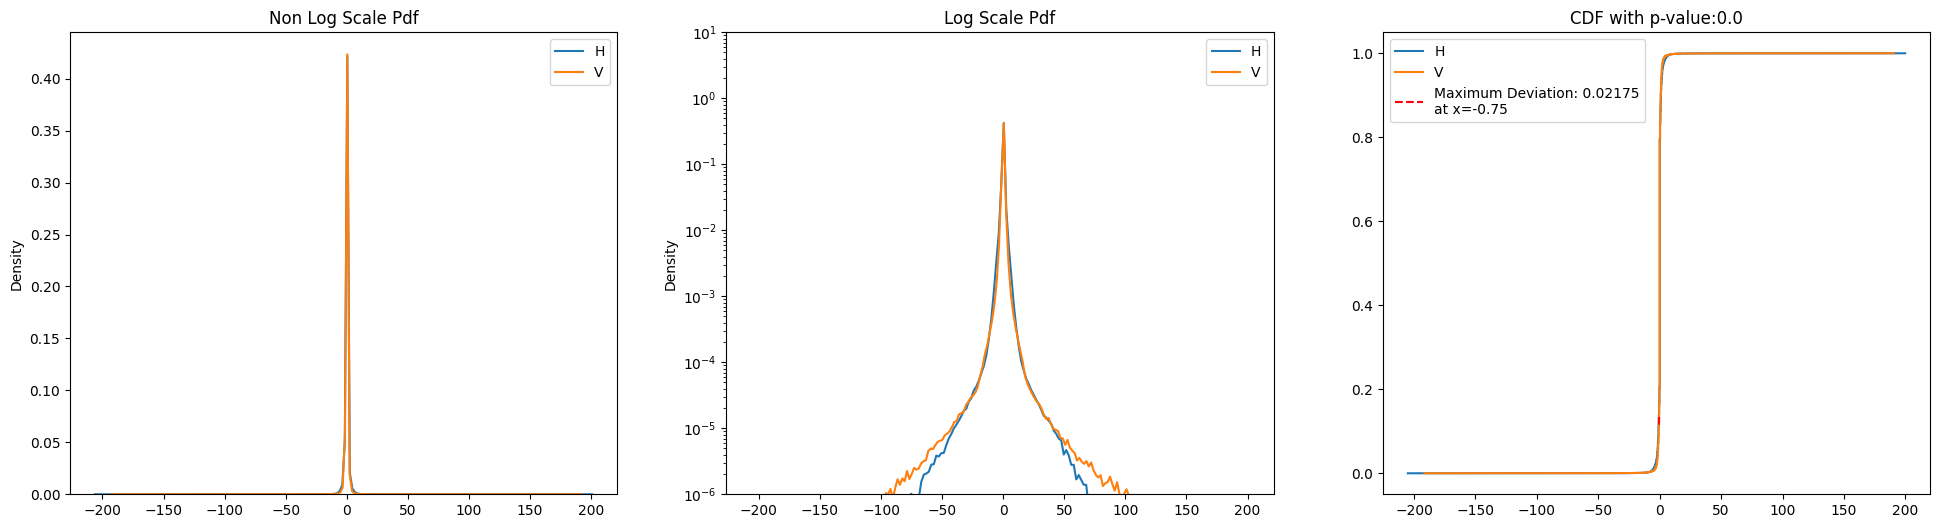

In [28]:
for i in range(2, 10):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Green

In [29]:
green_wv = convert_to_wavelet_basis(data_dir, "Green", debug=True)
green_wv.head()

10 layers being used


100%|██████████| 1008/1008 [00:10<00:00, 95.61it/s] 


channel  layer orientation  \
0   Green      1          L1   
1   Green      2           D   
2   Green      2           H   
3   Green      2           V   
4   Green      3           D   

                                                data  
0  [159.82617187500017, 913.0000000000011, 440.57...  
1  [-54.75976562500005, 60.69531250000014, 6.7988...  
2  [64.33007812500006, 52.39453125000004, 16.6933...  
3  [-90.84179687500009, 0.32421875, -6.4707031249...  
4  [9.51953125000001, 5.527343750000004, -2.41796...

In [30]:
green_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    green_df = pd.concat([green_df, ks_df], axis = 0)
green_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_79795/1157885314.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  green_df = pd.concat([green_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.063492   3.435302e-02
0     2     D      H  0.109127   1.202200e-05
1     2     D      V  0.123016   4.600609e-07
2     3     H      V  0.038690   4.779951e-03
1     3     D      V  0.087054   1.036699e-13
0     3     D      H  0.113095   7.221825e-23
2     4     H      V  0.027158   1.338101e-05
1     4     D      V  0.078311   1.845391e-43
0     4     D      H  0.093688   4.733783e-62
2     5     H      V  0.025871   3.455361e-19
1     5     D      V  0.059152   1.506086e-98
0     5     D      H  0.077474  7.752190e-169
2     6     H      V  0.018322   4.690870e-38
1     6     D      V  0.041578  3.036737e-194
0     6     D      H  0.056551   0.000000e+00
2     7     H      V  0.017922  1.993441e-144
1     7     D      V  0.035406   0.000000e+00
0     7     D      H  0.047602   0.000000e+00
2     8     H      V  0.021139   0.000000e+00
1     8     D      V  0.040549   0.000000e+00
0     8     D      H  0.057644   0.000000e+00
2     9     H      V  0.021735   0.000000e+00
1     9     D      V  0.046441   0.000000e+00
0     9     D      H  0.062089   0.000000e+00
2    10     H      V  0.026759   0.000000e+00
1    10     D      V  0.034932   0.000000e+00
0    10     D      H  0.046521   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


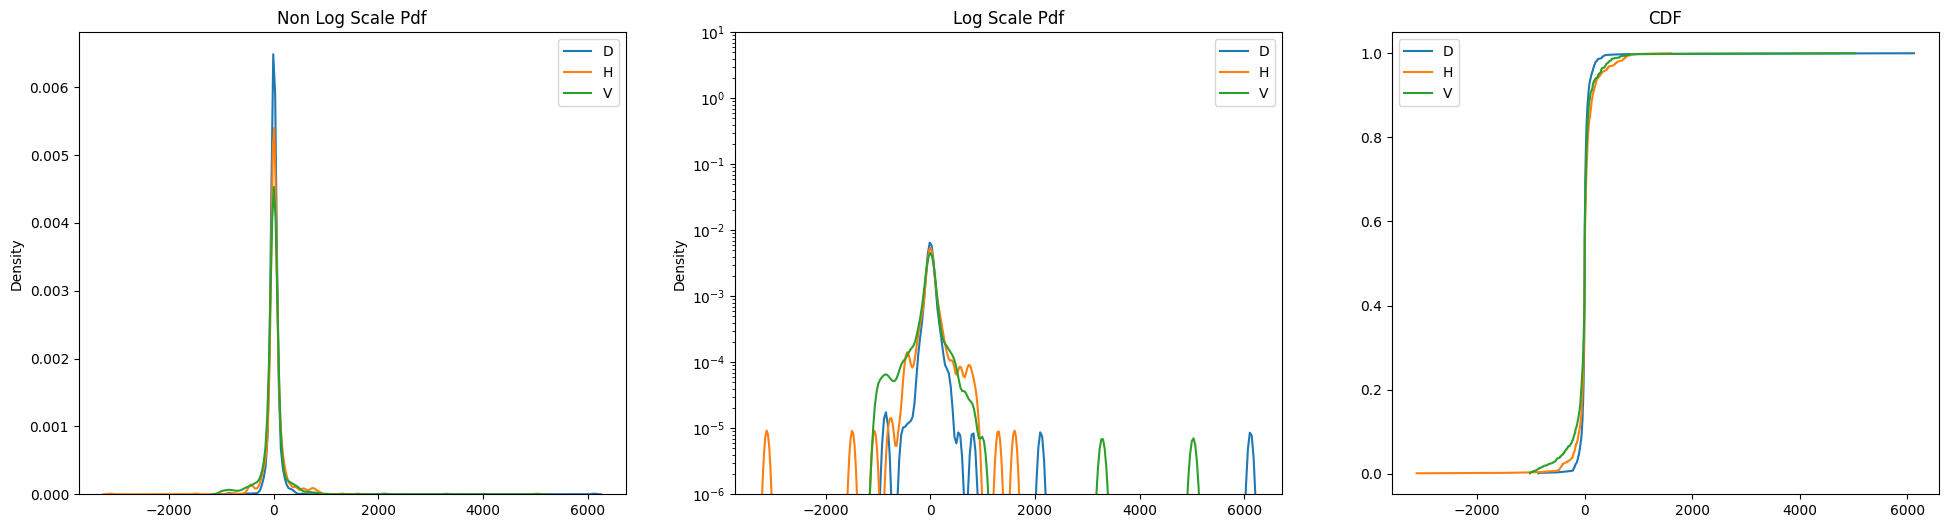

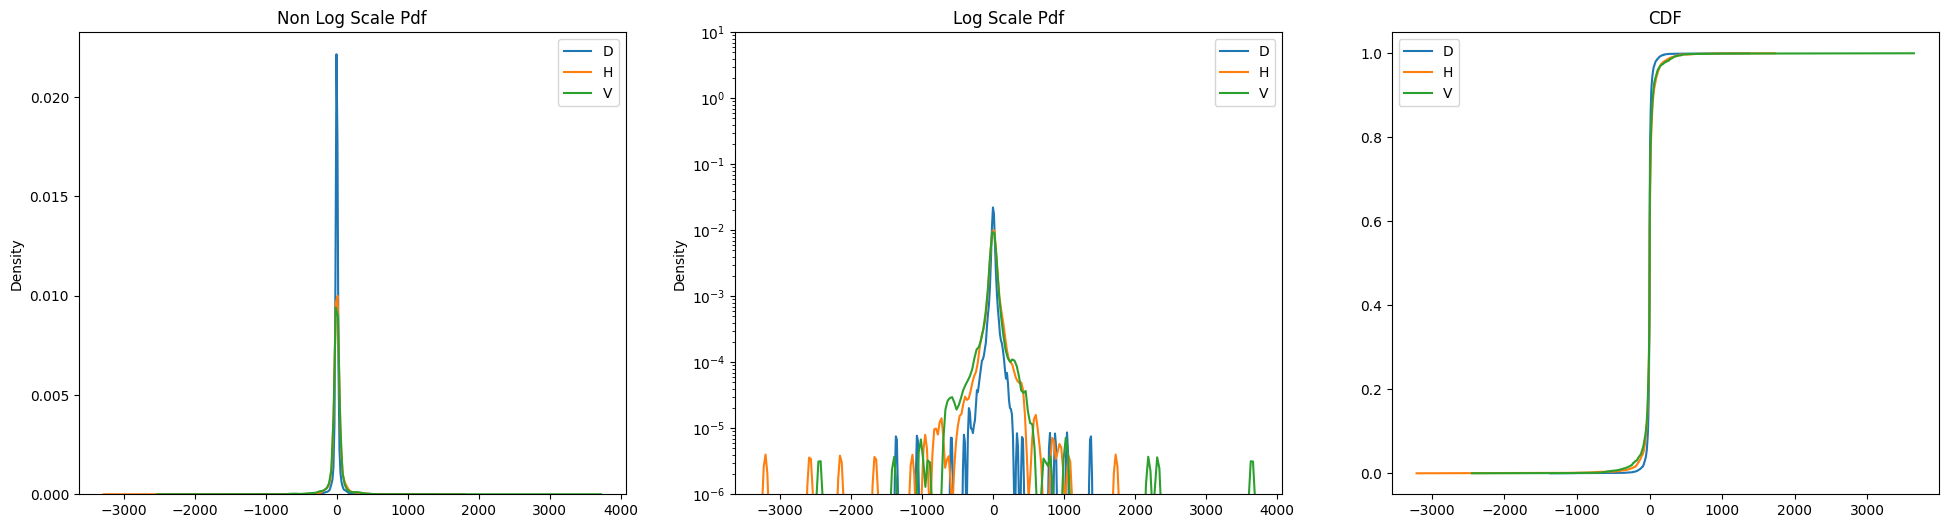

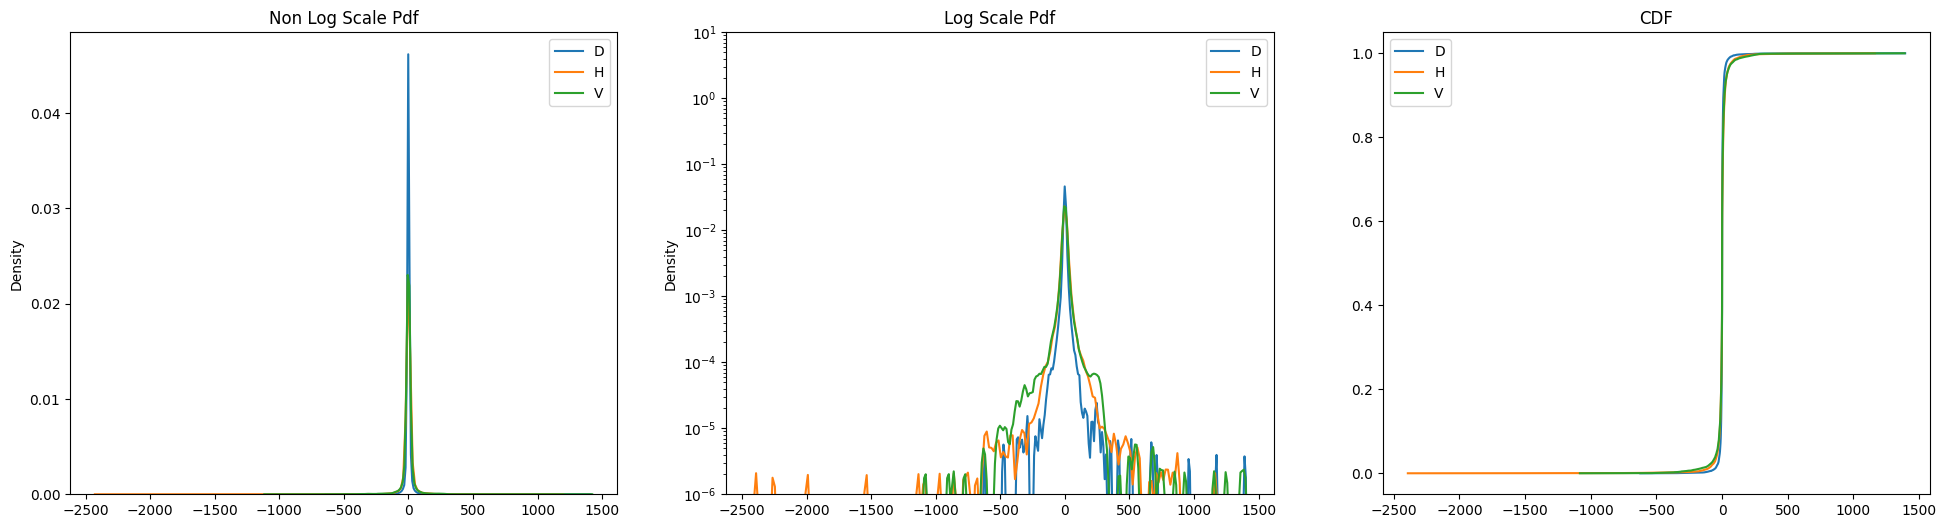

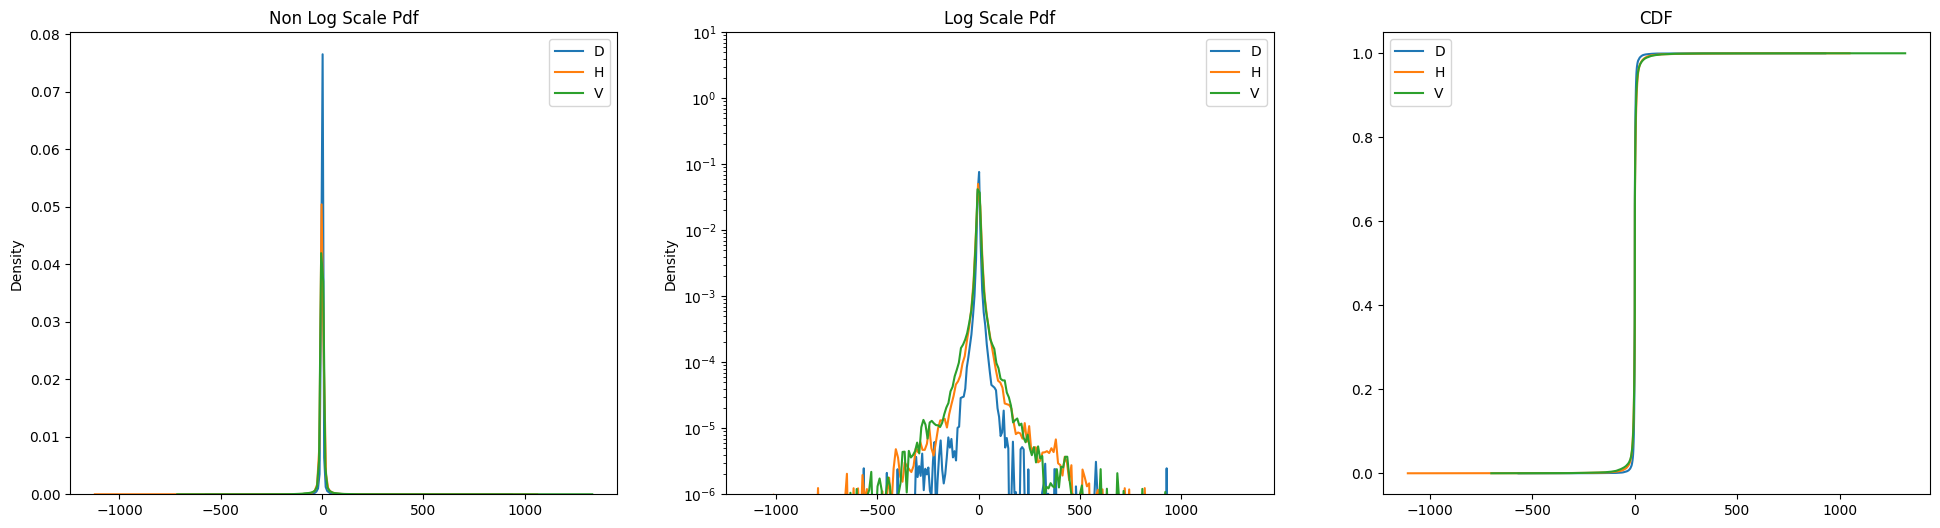

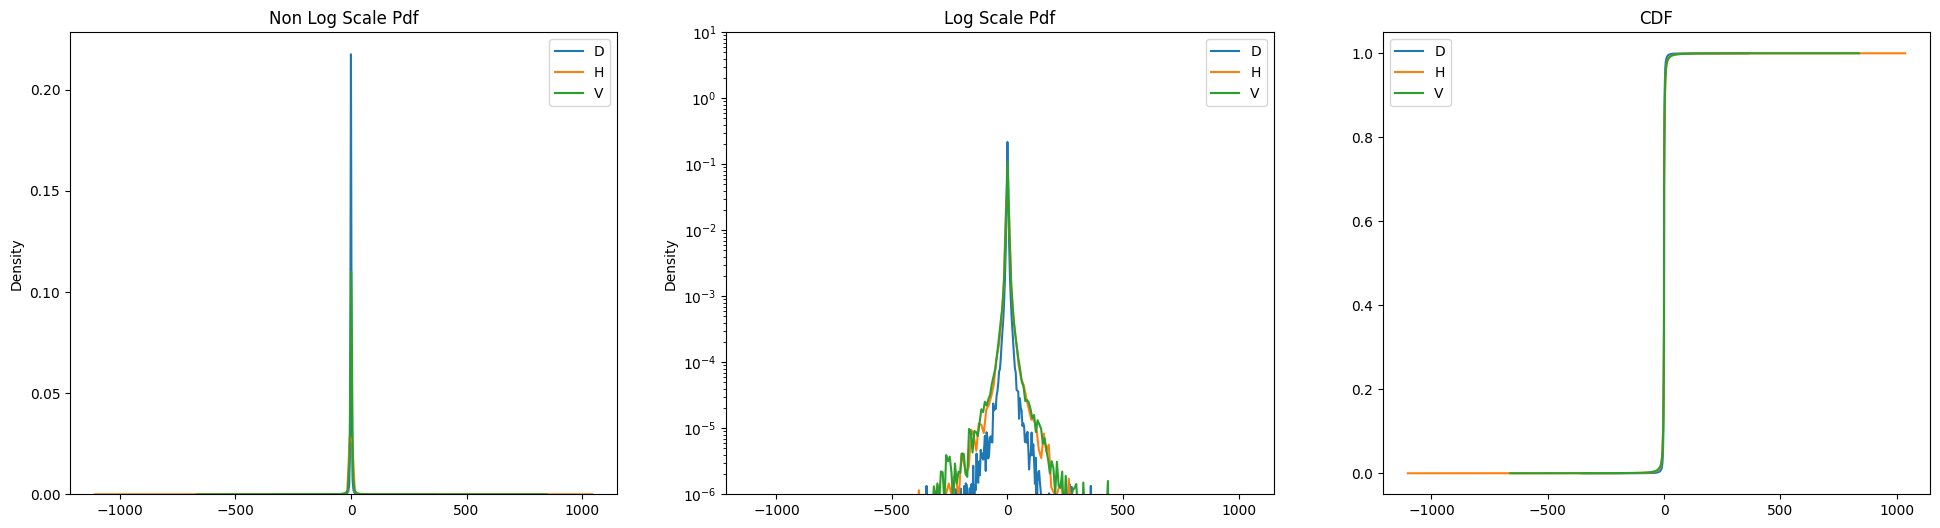

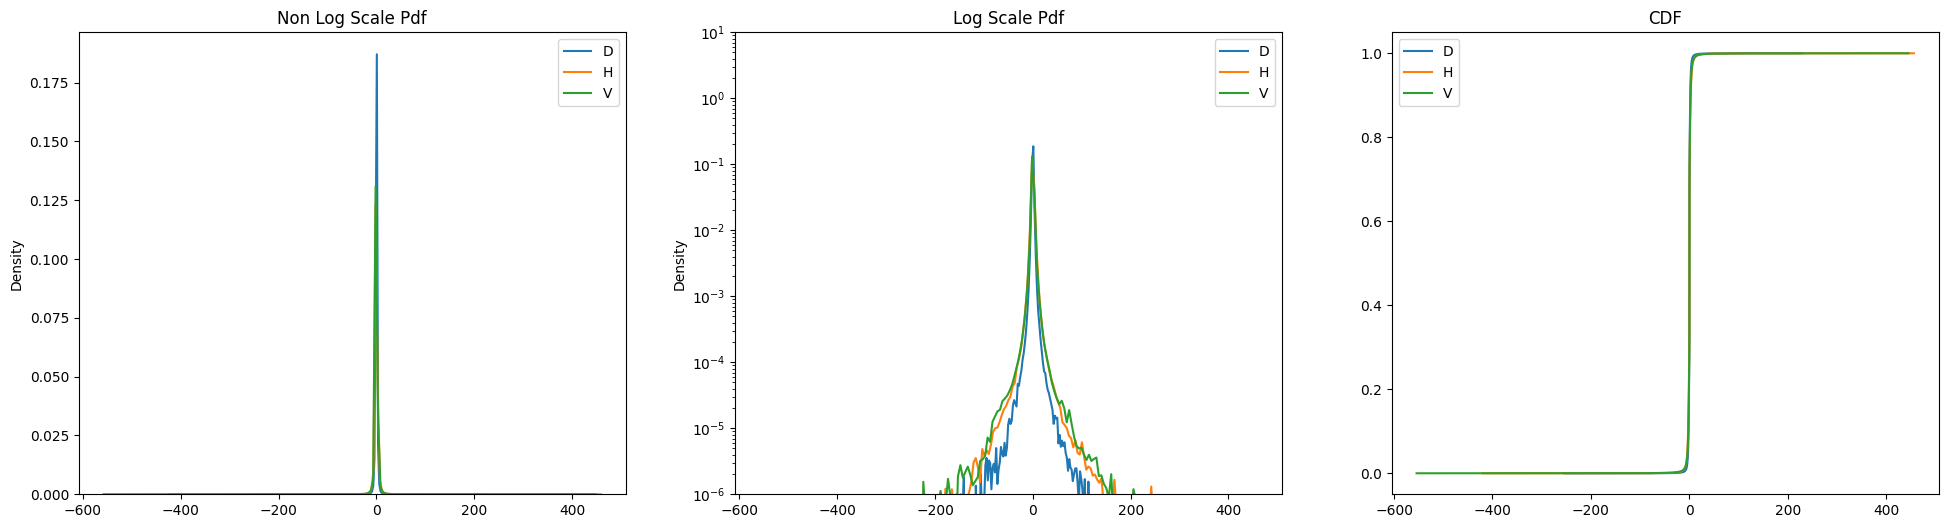

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


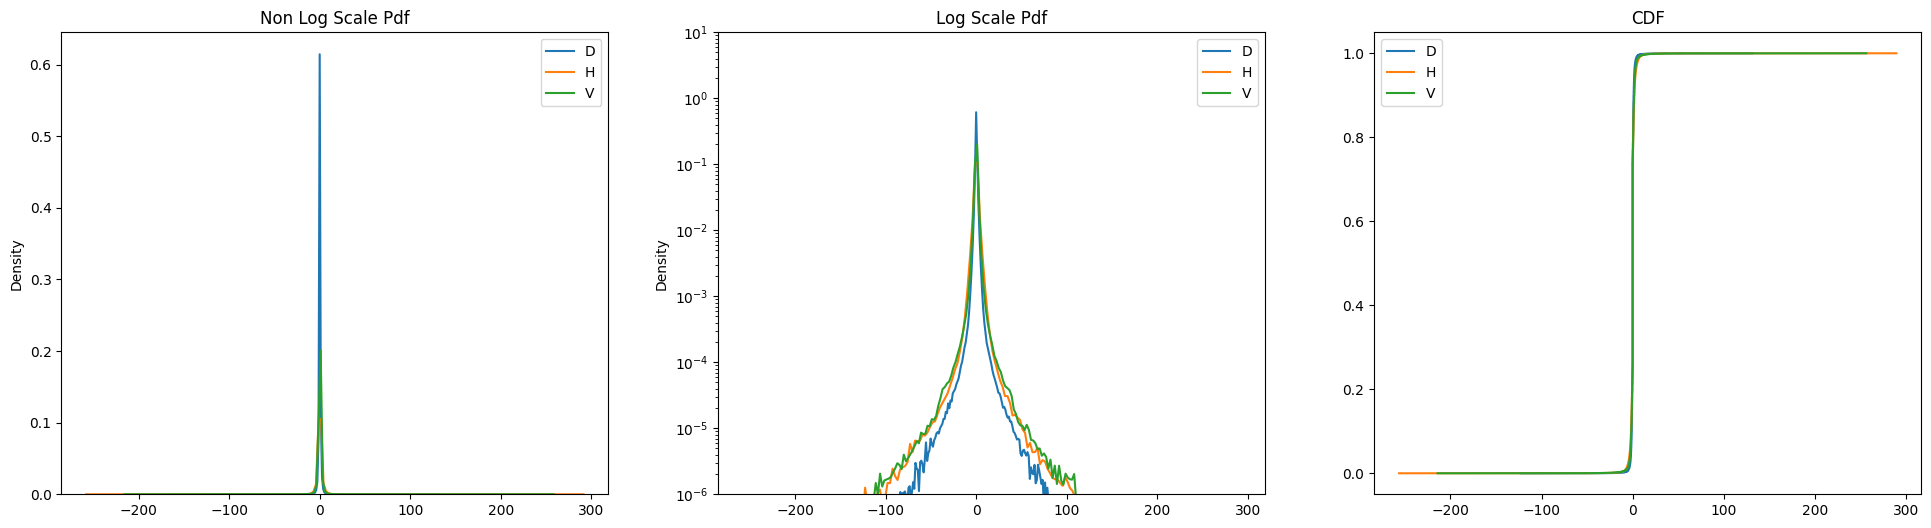

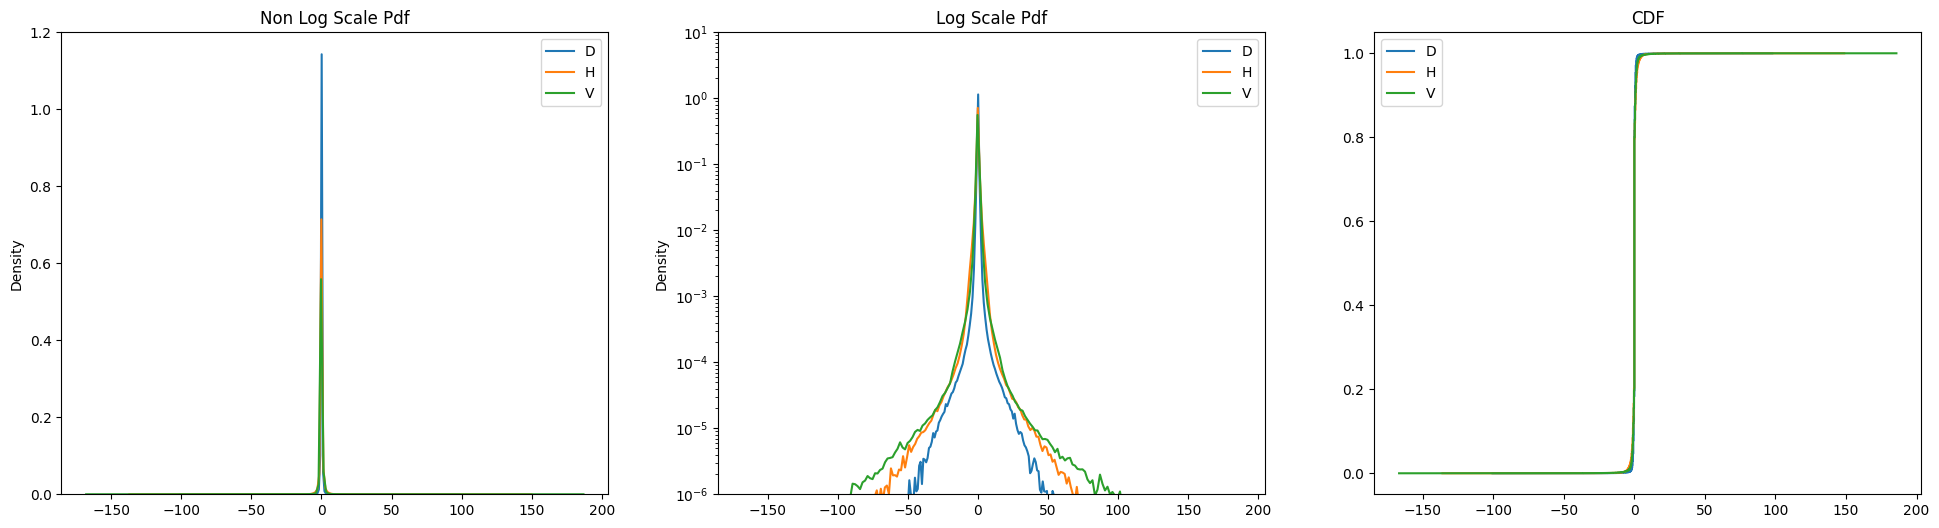

In [31]:
for i in range(2, 10):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


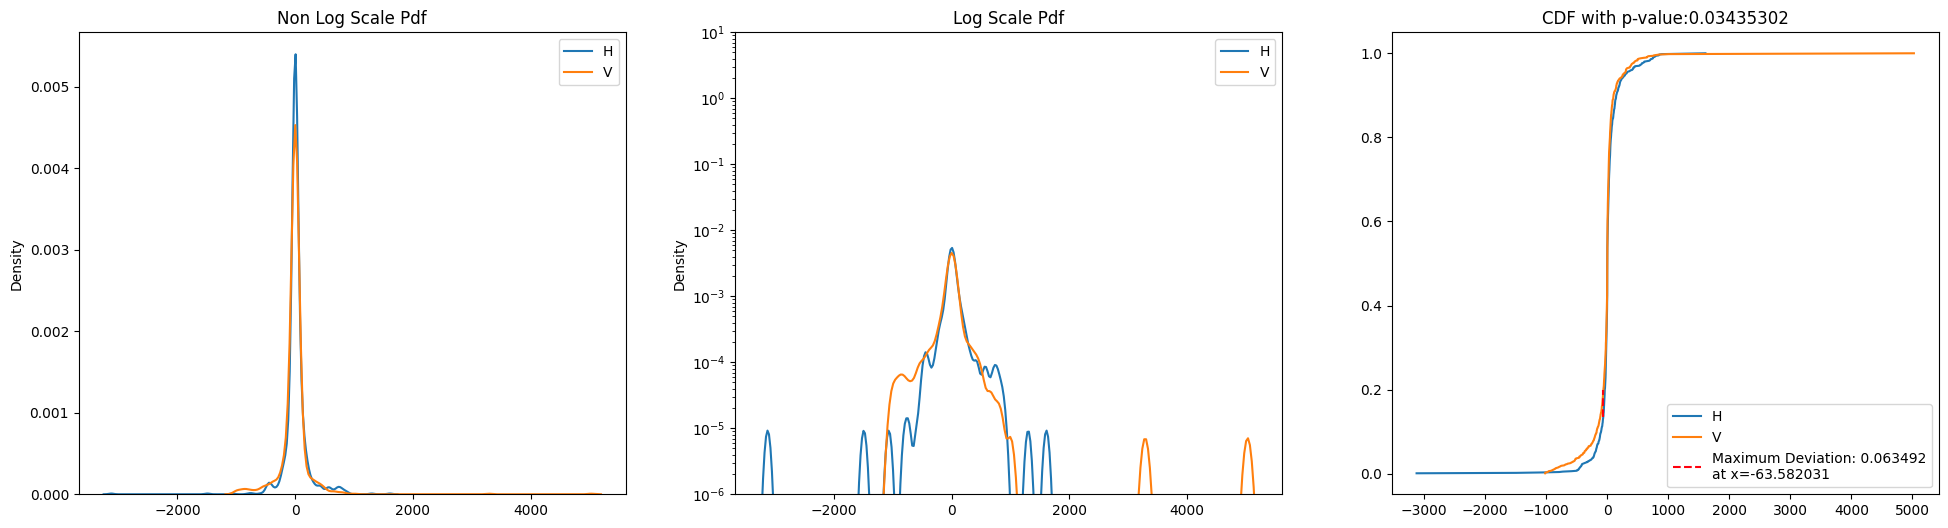

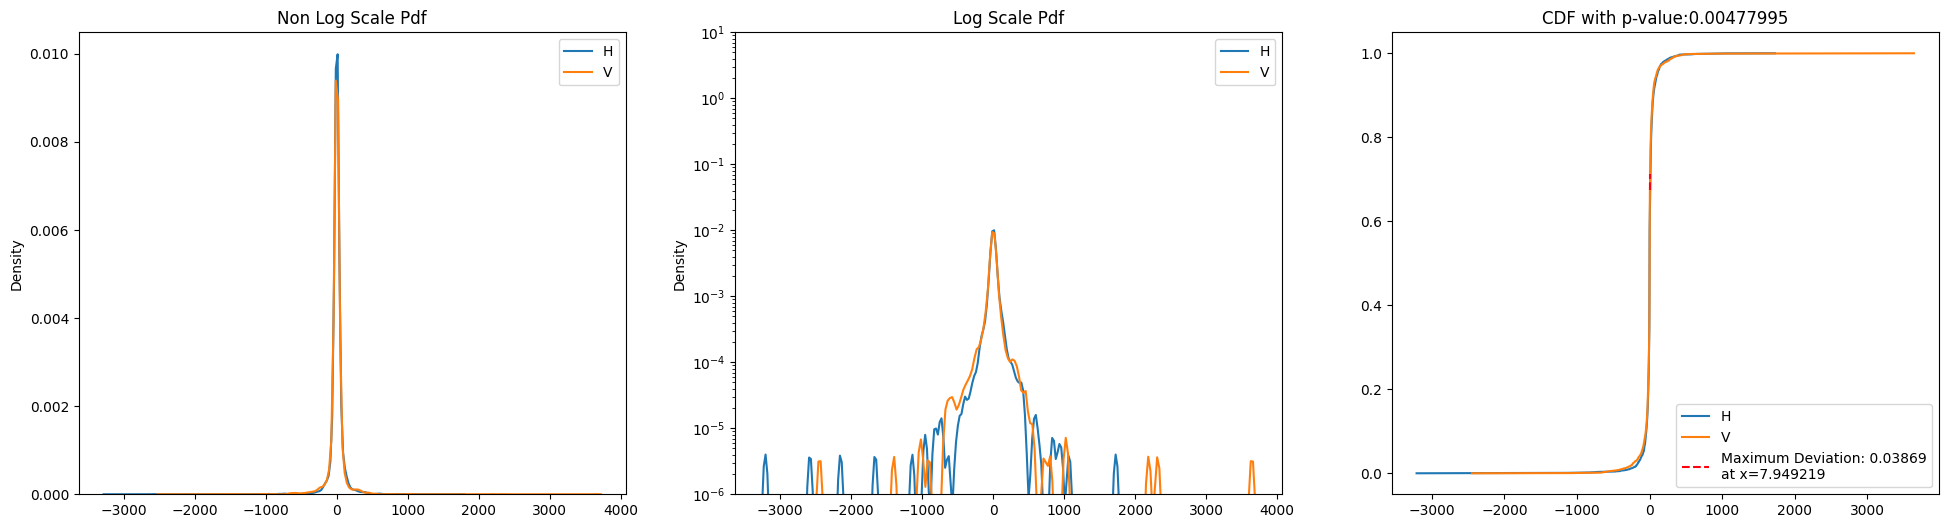

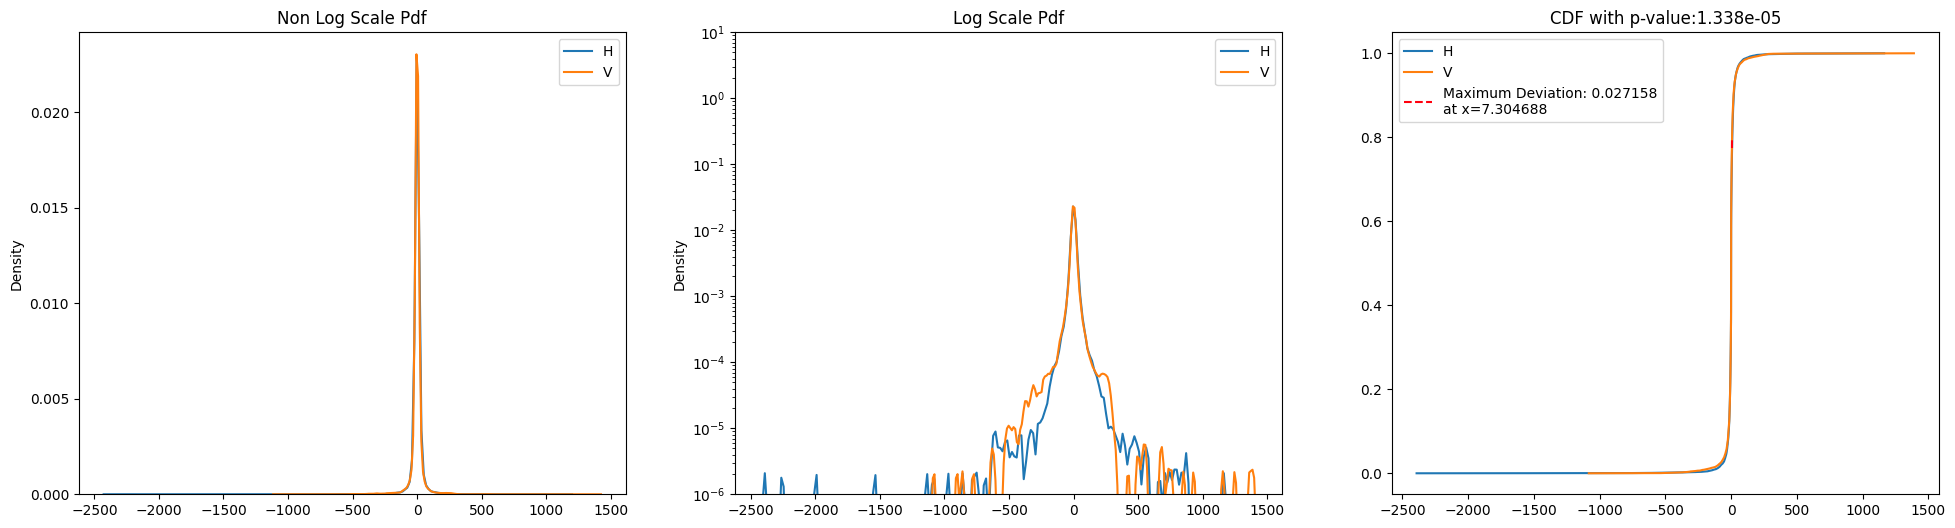

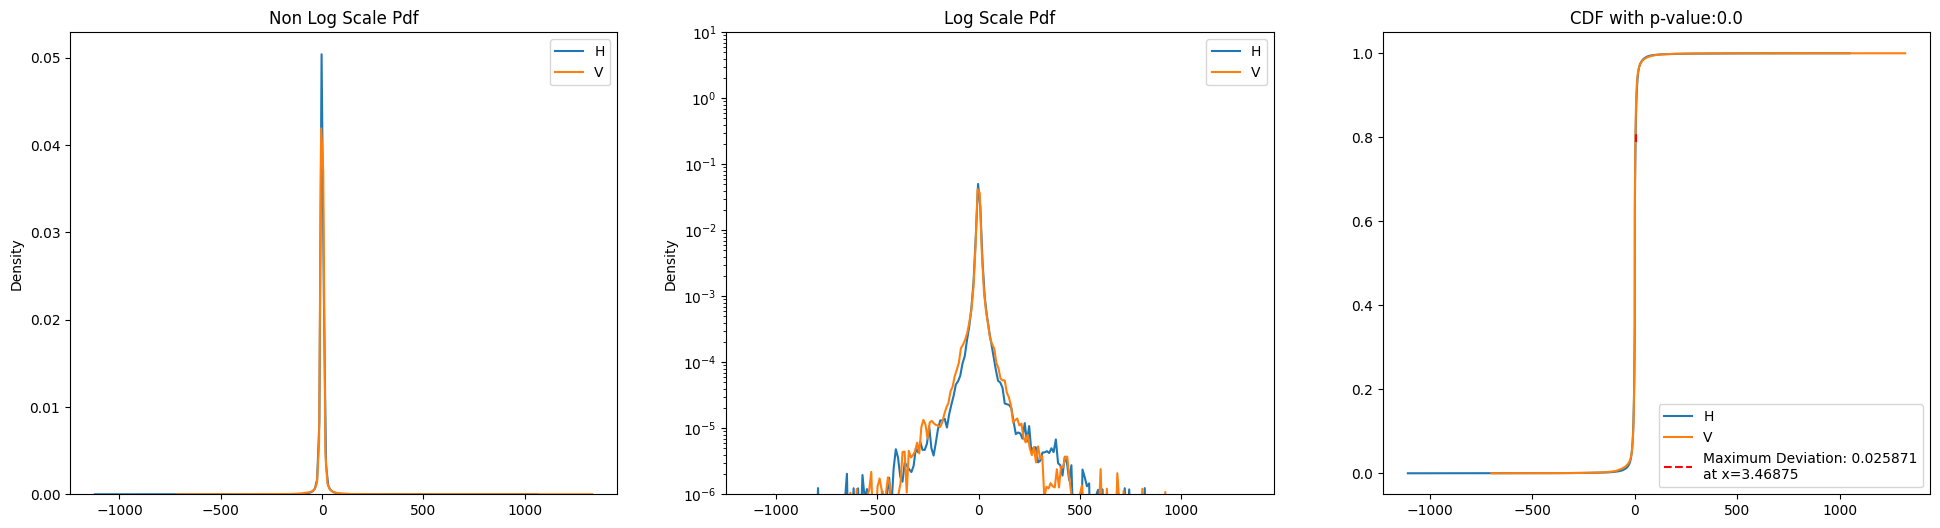

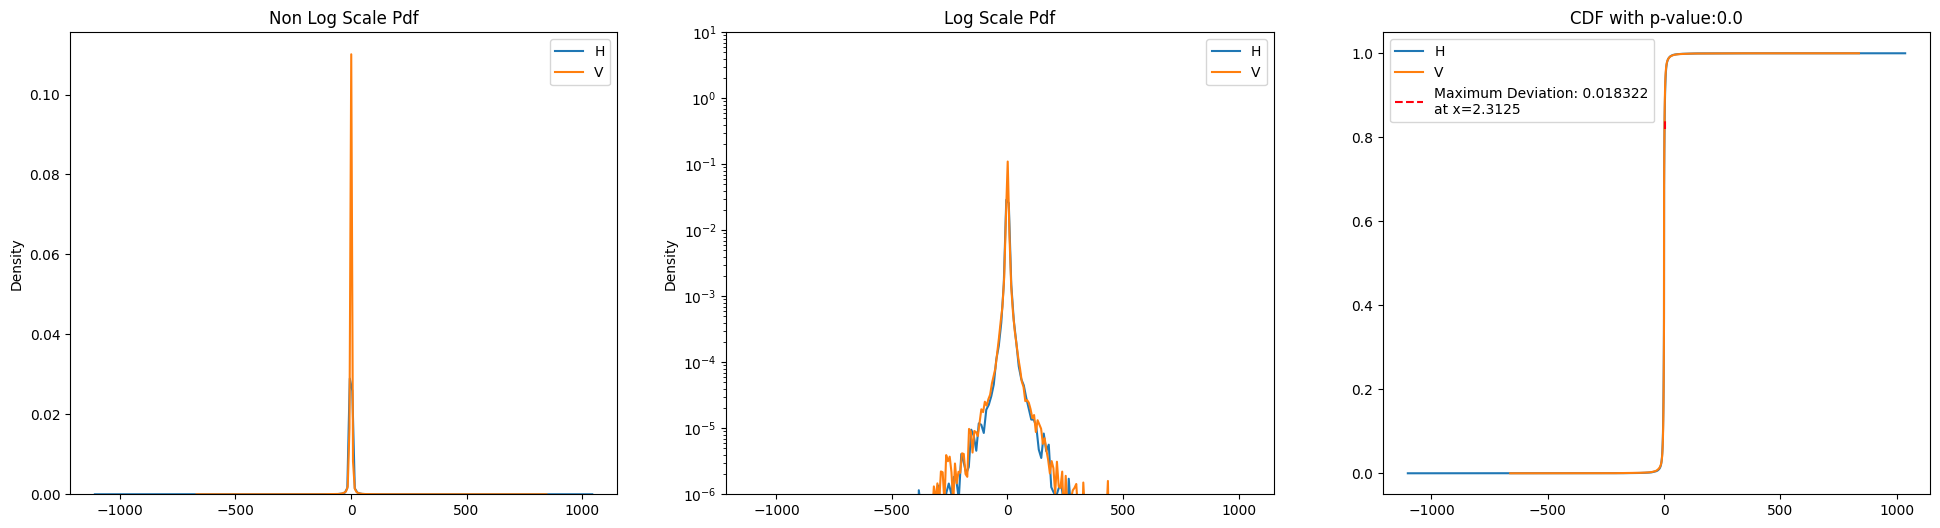

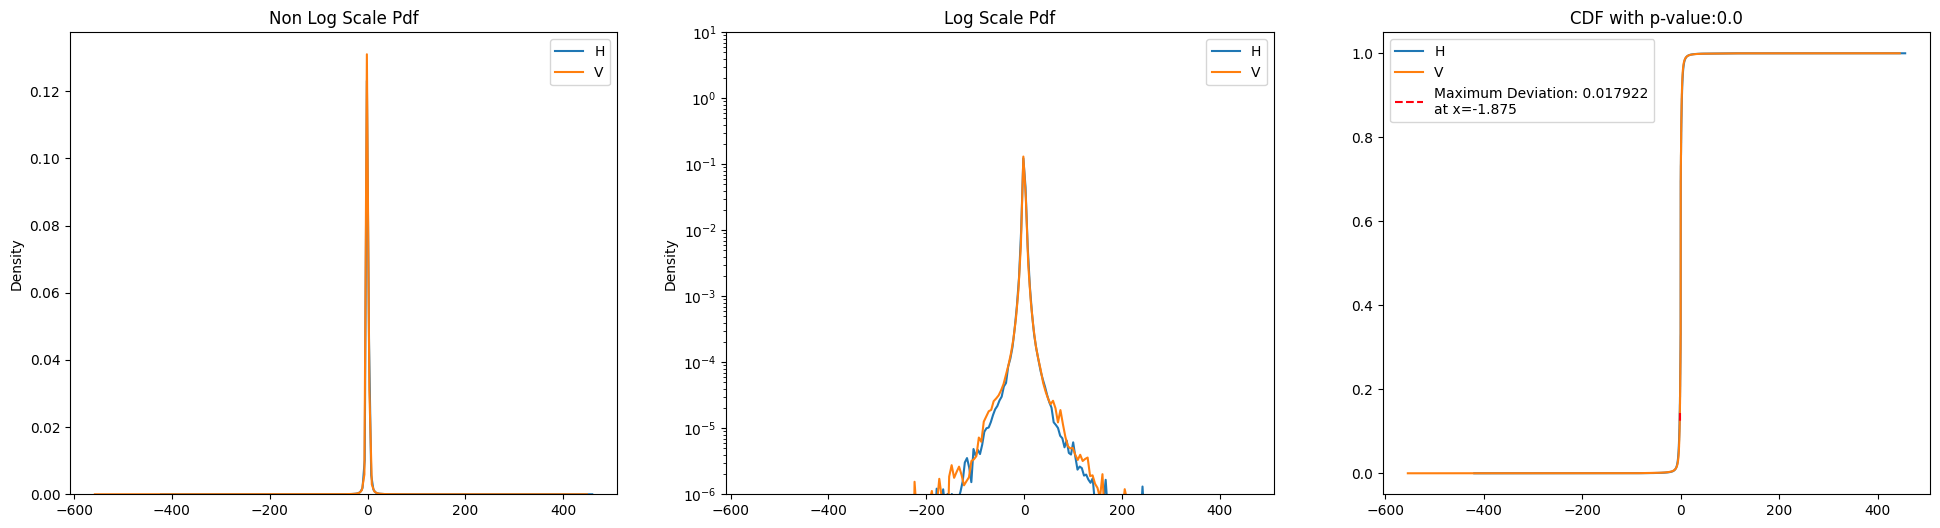

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


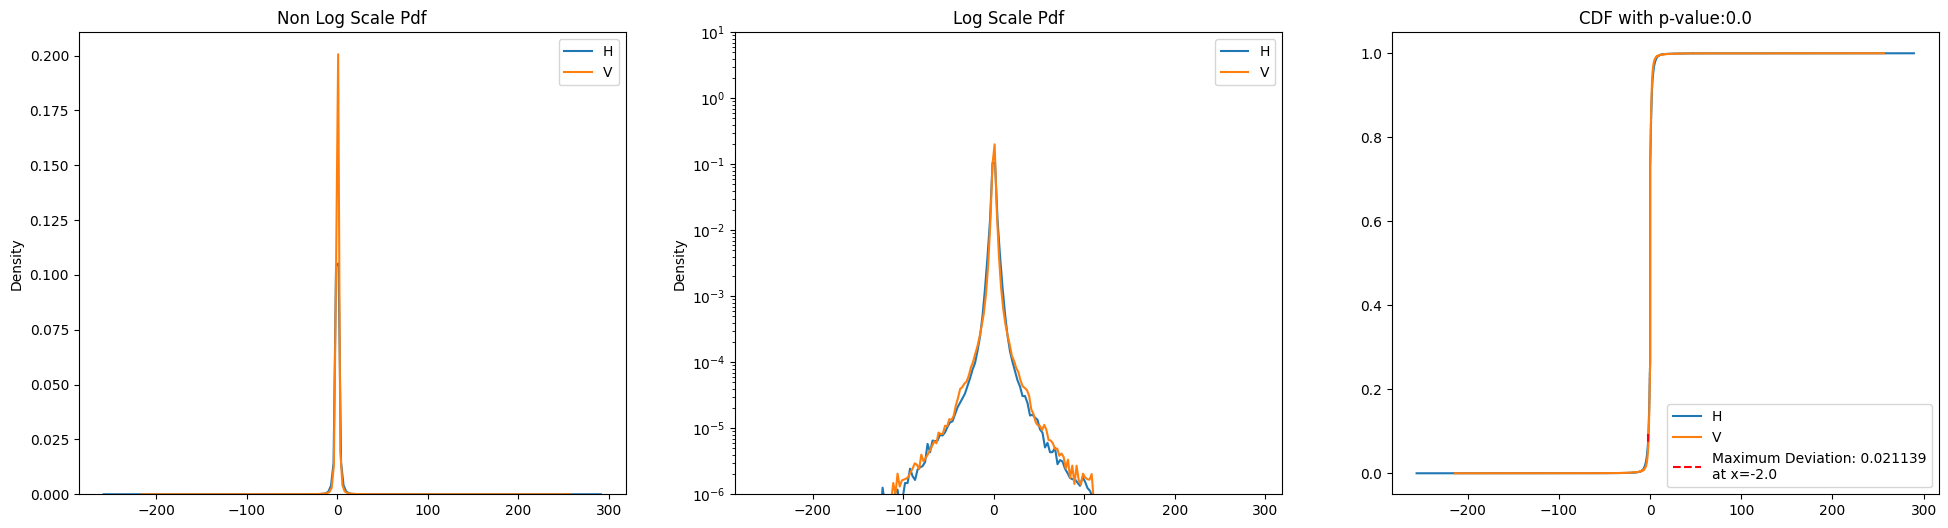

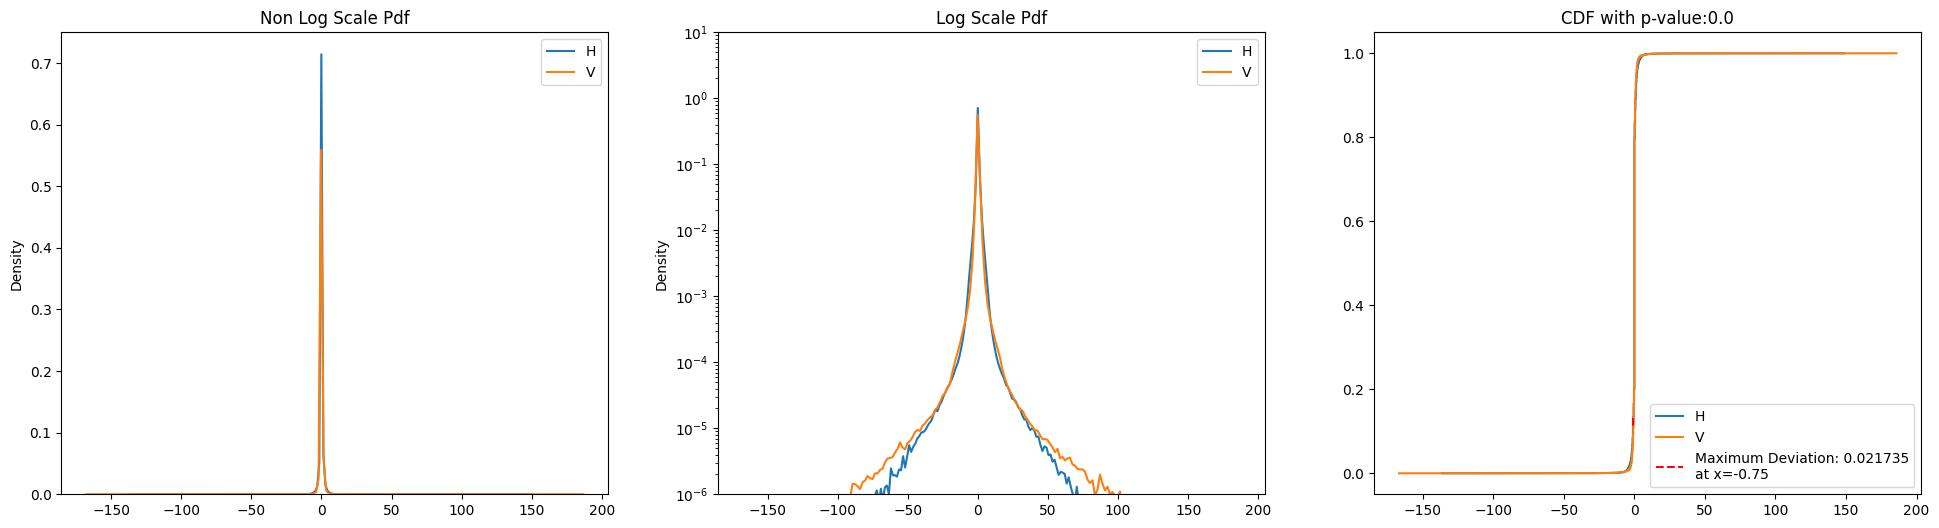

In [32]:
for i in range(2, 10):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Blue

In [33]:
blue_wv = convert_to_wavelet_basis(data_dir, "Blue", debug=True)
blue_wv.head()

10 layers being used


100%|██████████| 1008/1008 [00:08<00:00, 116.68it/s]


channel  layer orientation  \
0    Blue      1          L1   
1    Blue      2           D   
2    Blue      2           H   
3    Blue      2           V   
4    Blue      3           D   

                                                data  
0  [190.24218750000023, 903.1074218750011, 472.92...  
1  [-79.0195312500001, 59.92382812500009, -0.7851...  
2  [90.67968750000013, 49.060546875000036, -14.42...  
3  [-121.06640625000016, -5.505859374999943, -8.4...  
4  [8.660156250000005, 37.86328125000004, -2.8437...

In [34]:
blue_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    blue_df = pd.concat([blue_df, ks_df], axis = 0)
blue_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_79795/2515409215.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  blue_df = pd.concat([blue_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.071429   1.166065e-02
0     2     D      H  0.111111   7.726758e-06
1     2     D      V  0.137897   8.999206e-09
2     3     H      V  0.037946   6.016015e-03
1     3     D      V  0.087302   8.704586e-14
0     3     D      H  0.098958   1.340365e-17
2     4     H      V  0.026972   1.574303e-05
1     4     D      V  0.074405   2.860113e-39
0     4     D      H  0.086558   5.151790e-53
2     5     H      V  0.022786   5.567807e-15
1     5     D      V  0.047945   7.112266e-65
0     5     D      H  0.064329  1.716068e-116
2     6     H      V  0.012881   5.026121e-19
1     6     D      V  0.030409  4.362691e-104
0     6     D      H  0.041132  4.135248e-190
2     7     H      V  0.018436  8.195362e-153
1     7     D      V  0.038693   0.000000e+00
0     7     D      H  0.044905   0.000000e+00
2     8     H      V  0.020579   0.000000e+00
1     8     D      V  0.046381   0.000000e+00
0     8     D      H  0.061419   0.000000e+00
2     9     H      V  0.019238   0.000000e+00
1     9     D      V  0.042566   0.000000e+00
0     9     D      H  0.057699   0.000000e+00
2    10     H      V  0.026527   0.000000e+00
1    10     D      V  0.032257   0.000000e+00
0    10     D      H  0.043352   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


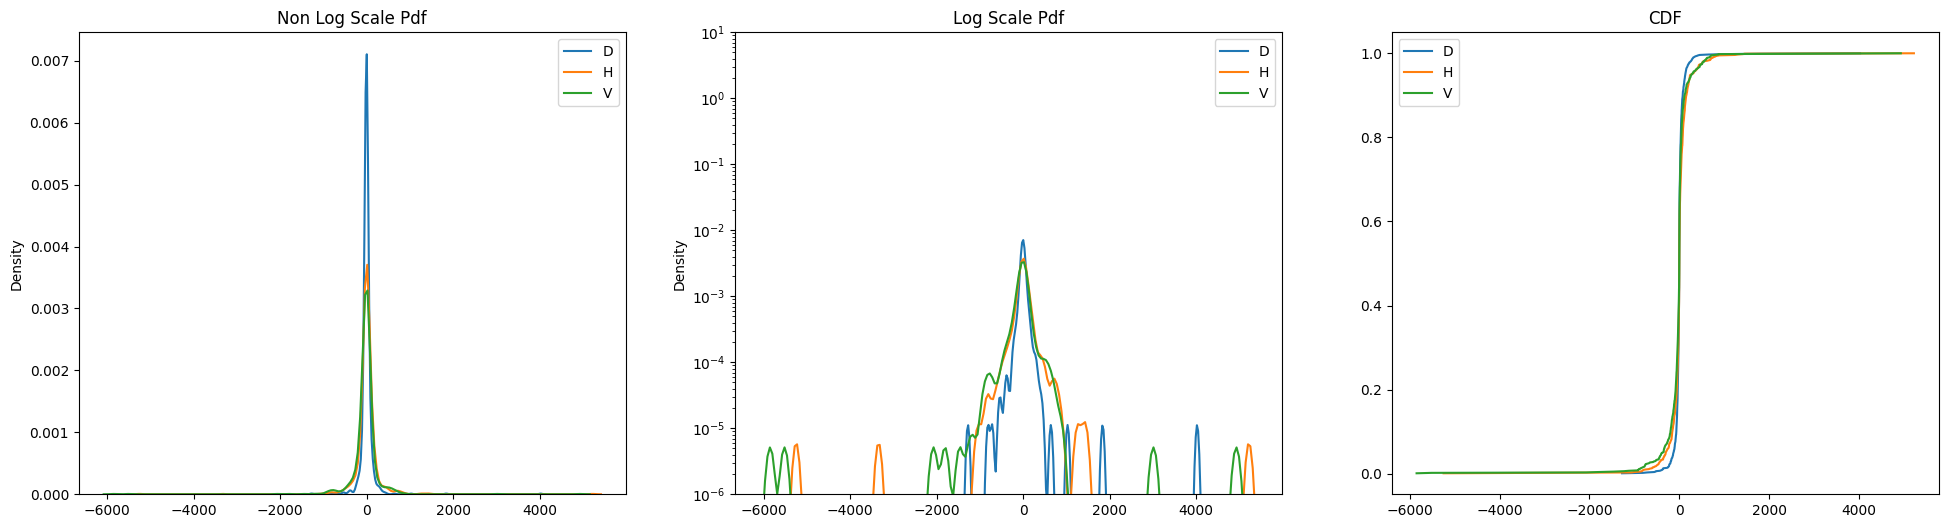

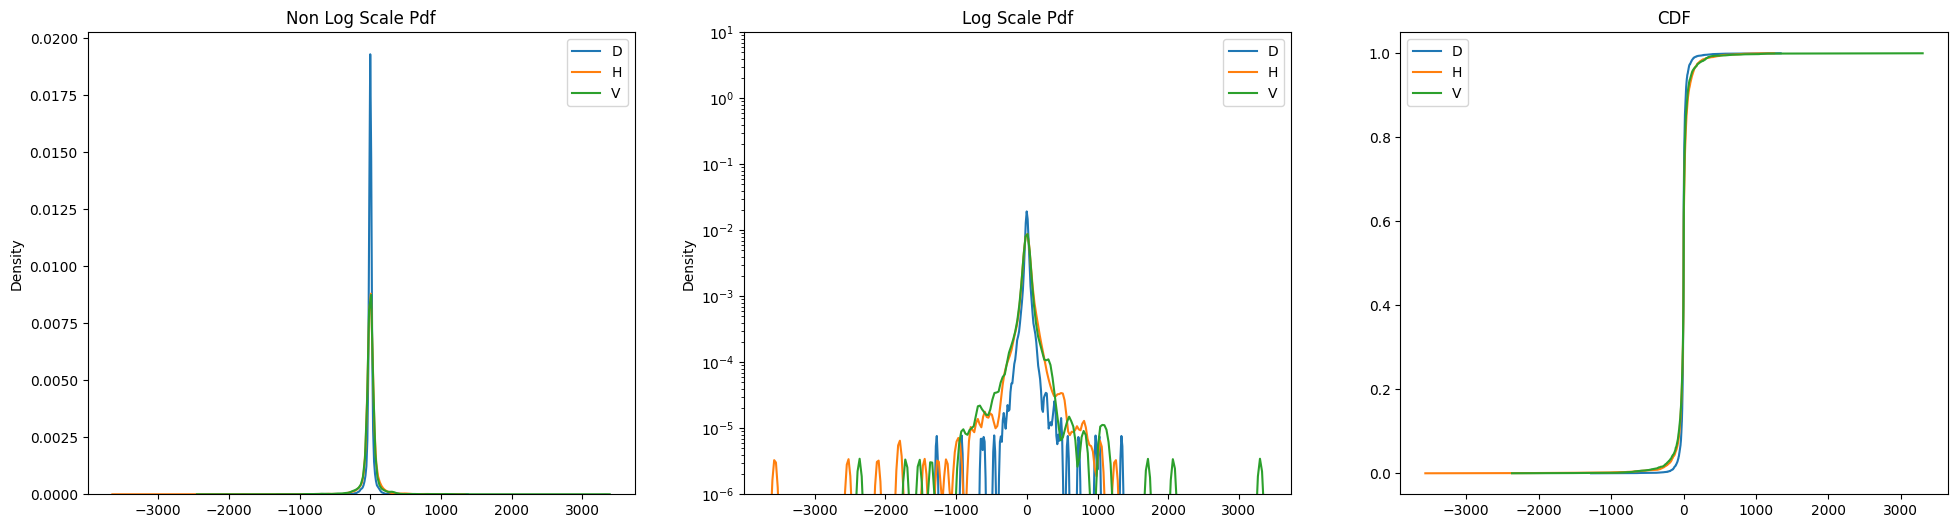

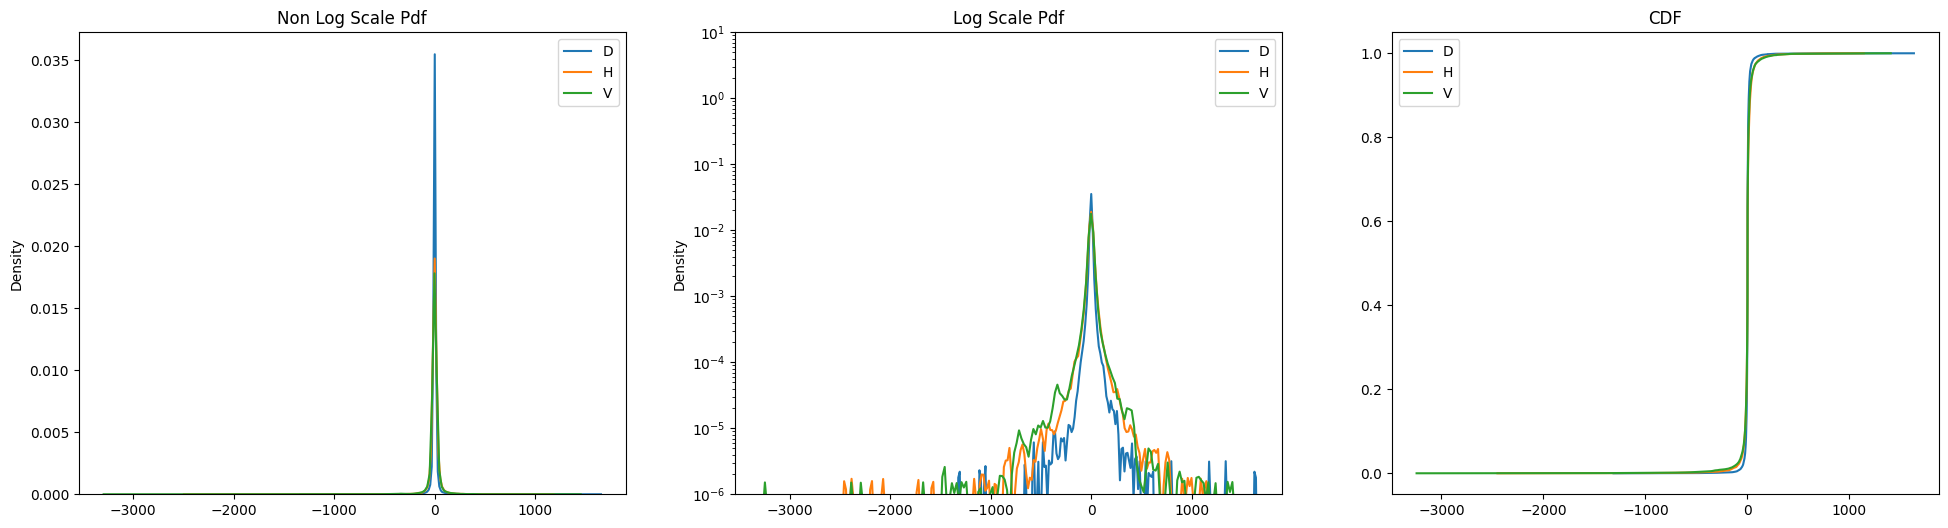

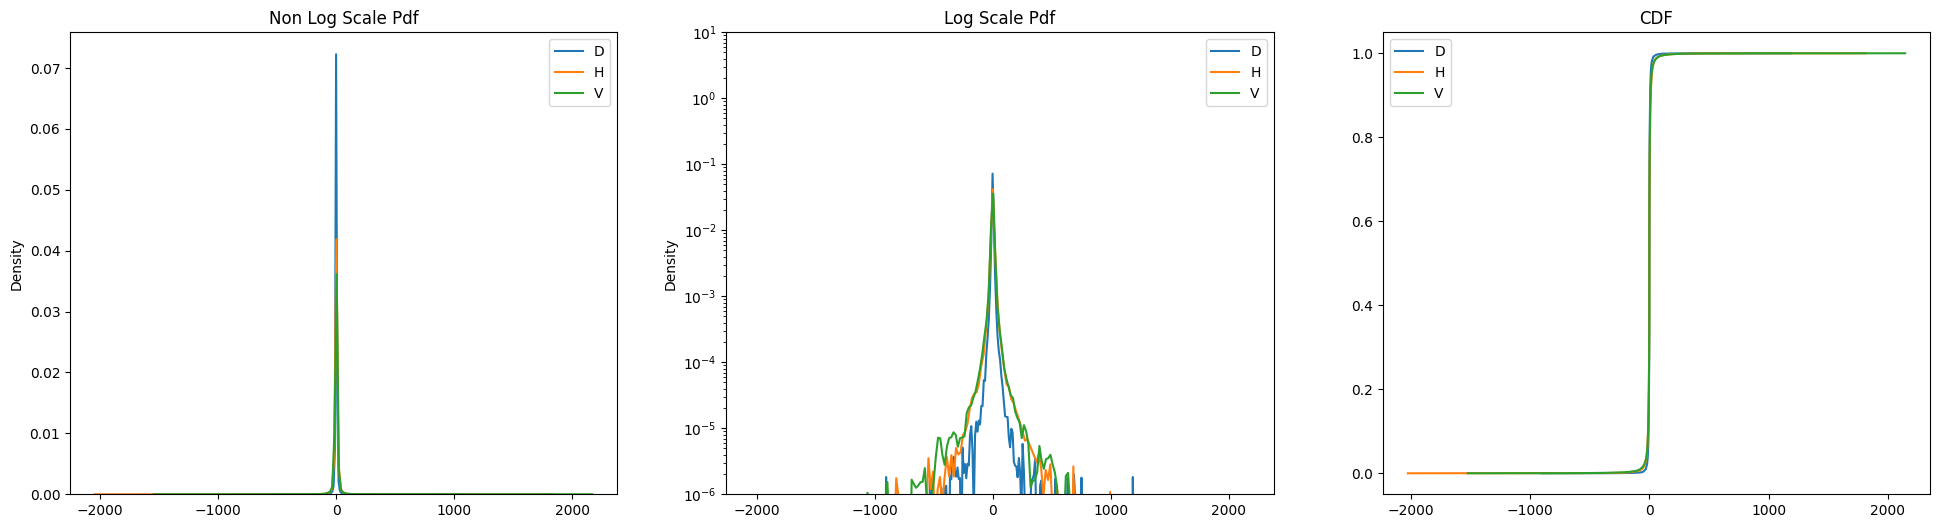

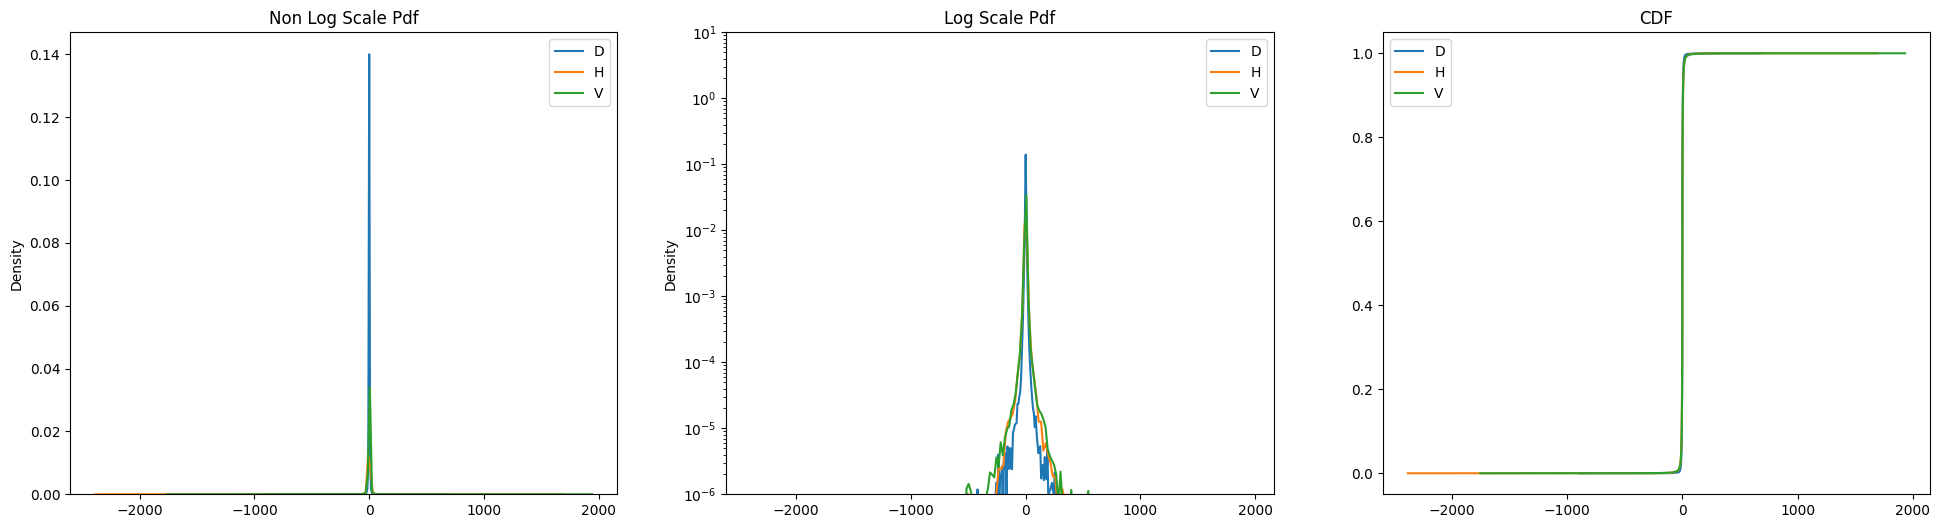

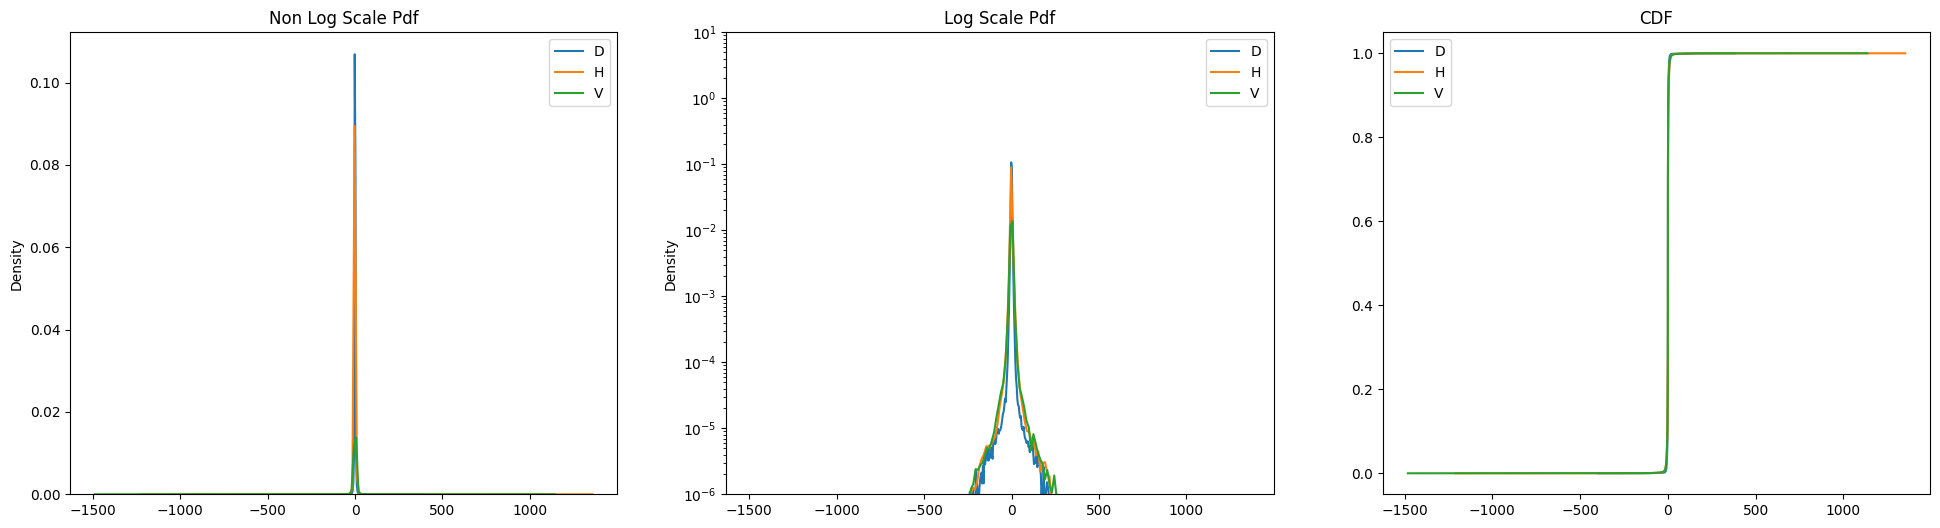

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


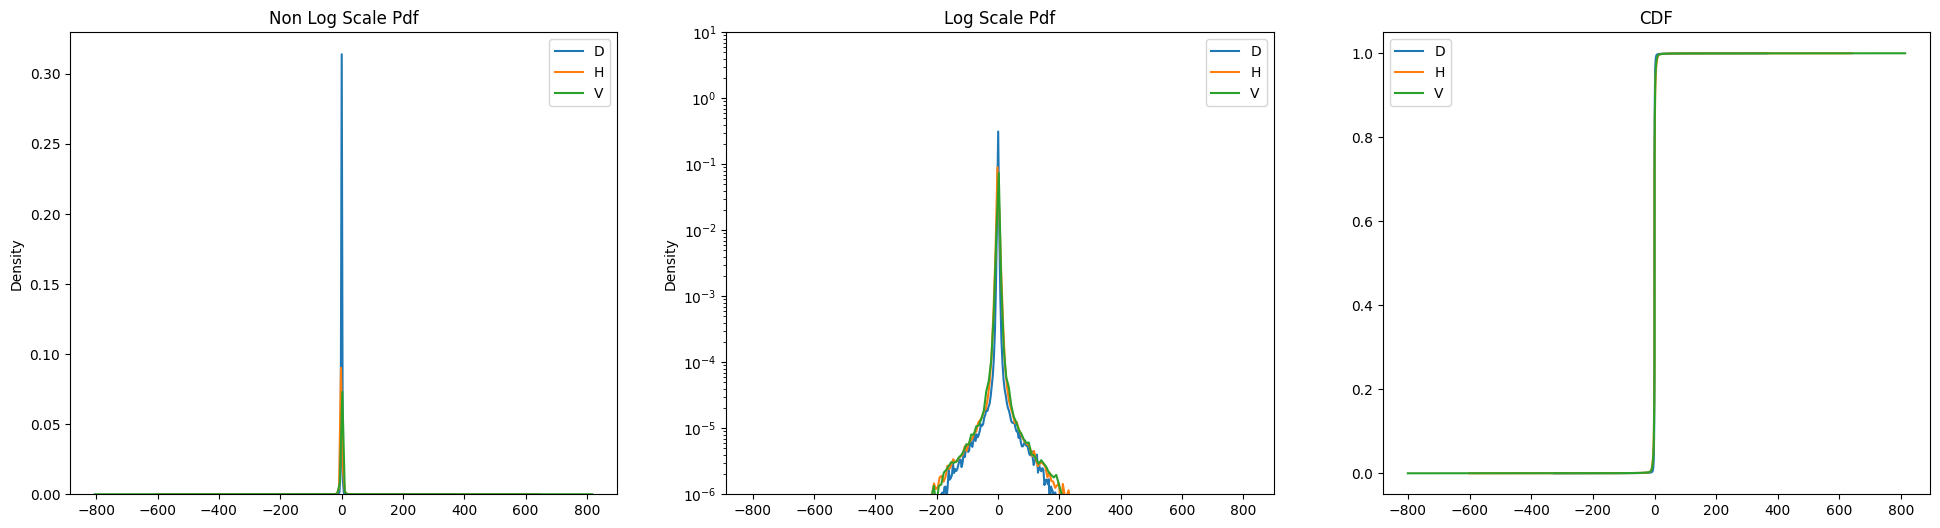

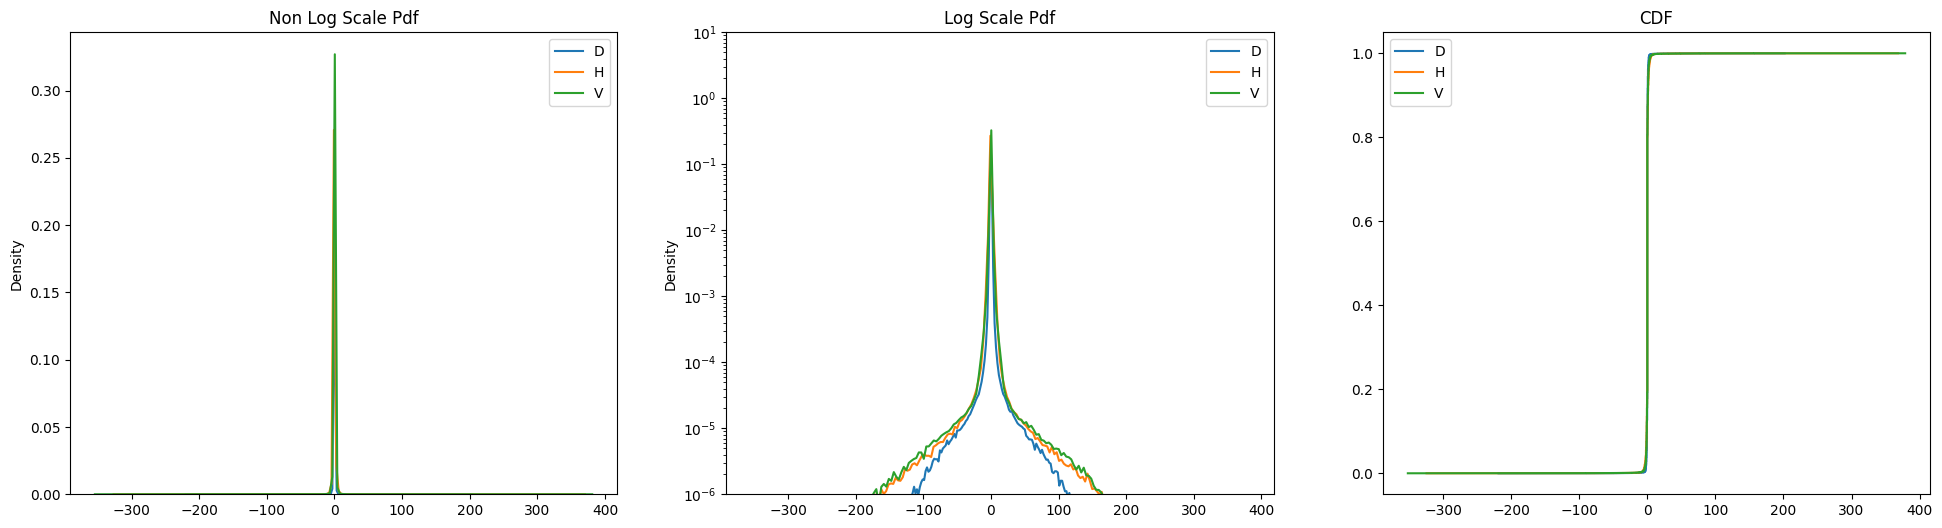

In [35]:
for i in range(2, 10):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


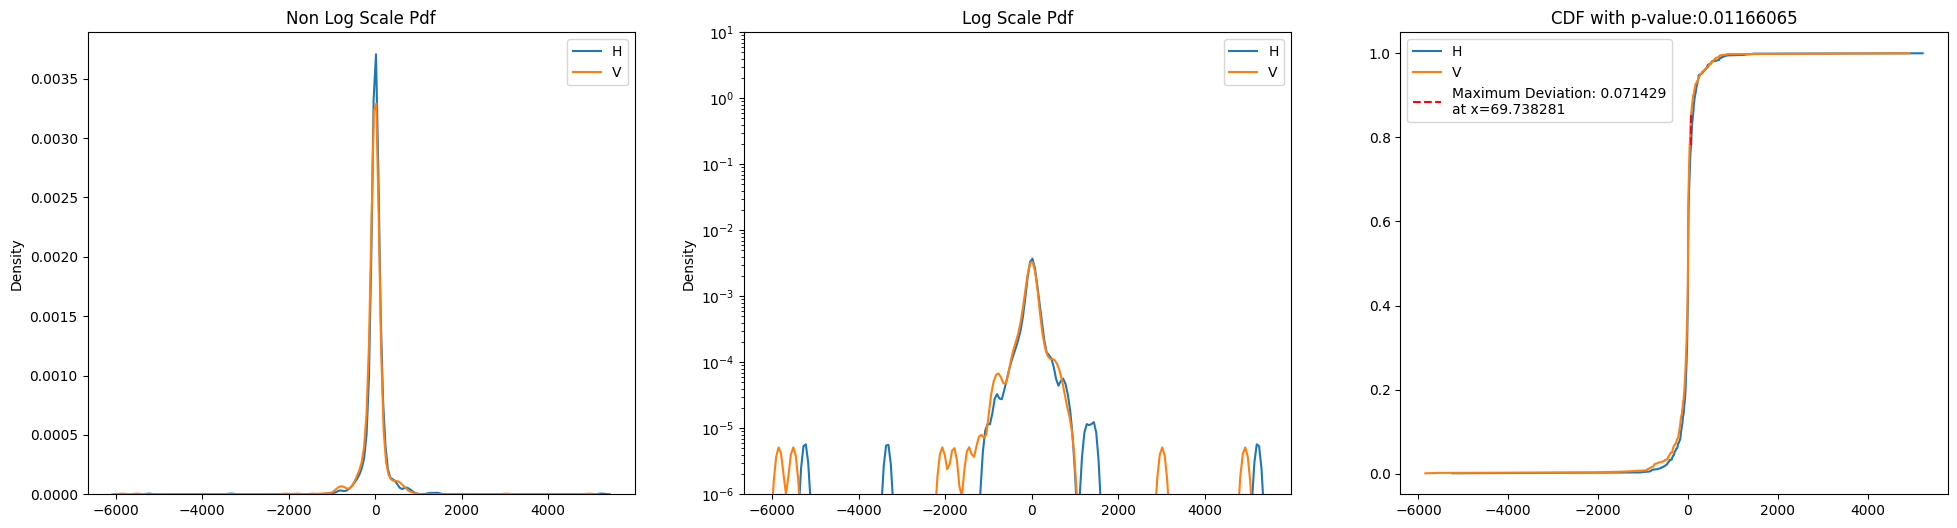

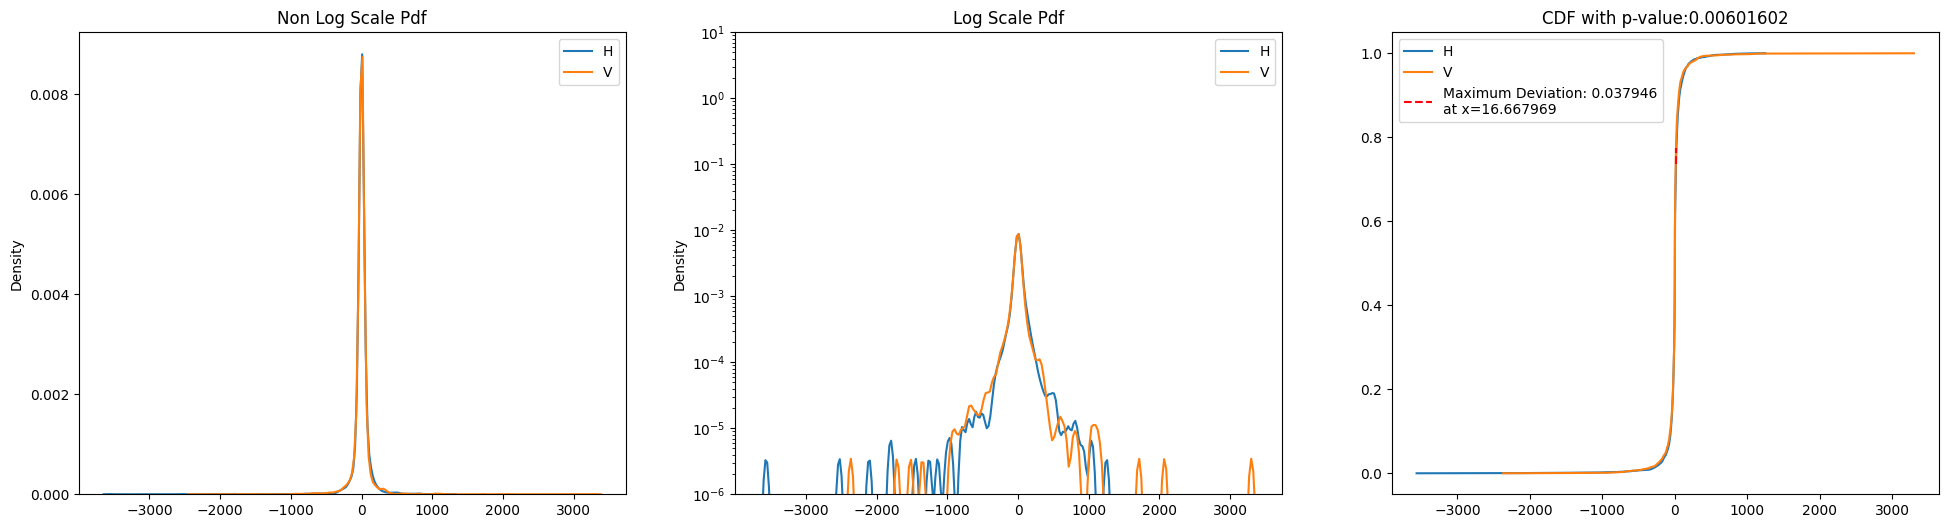

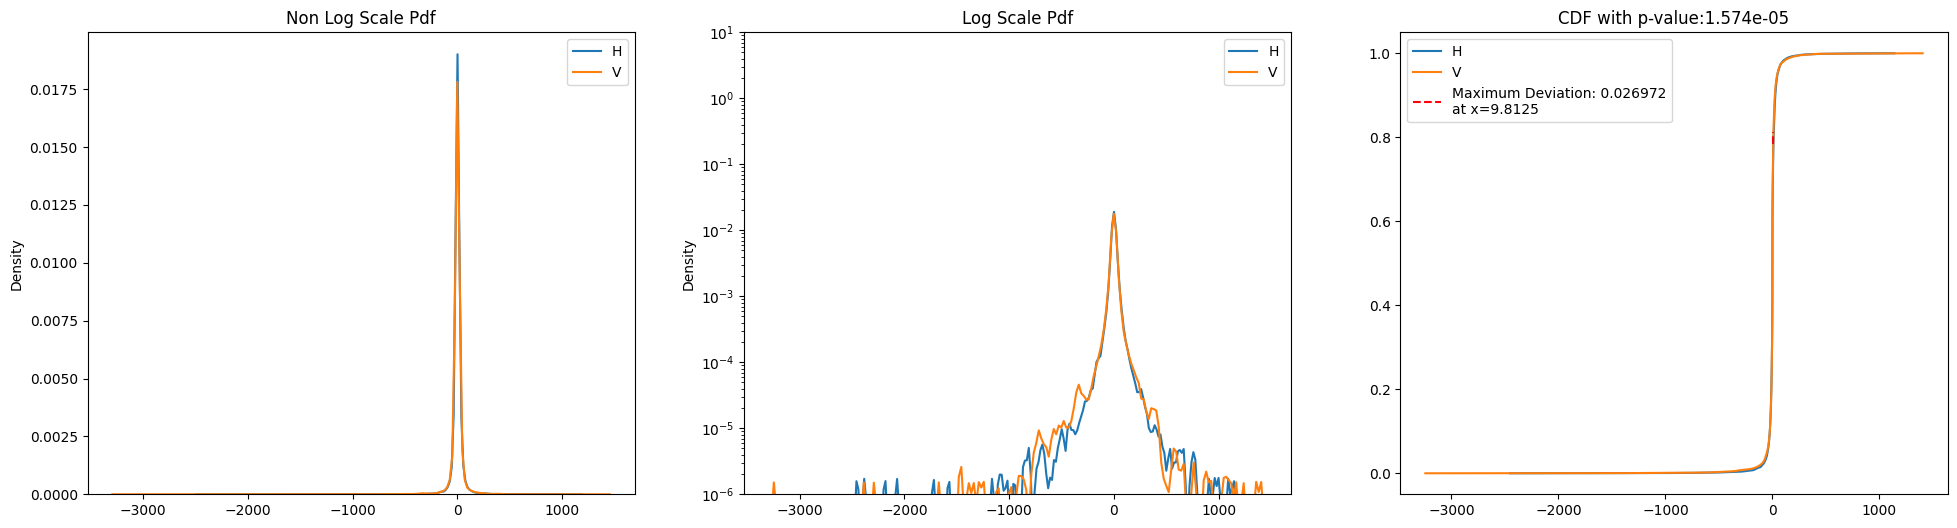

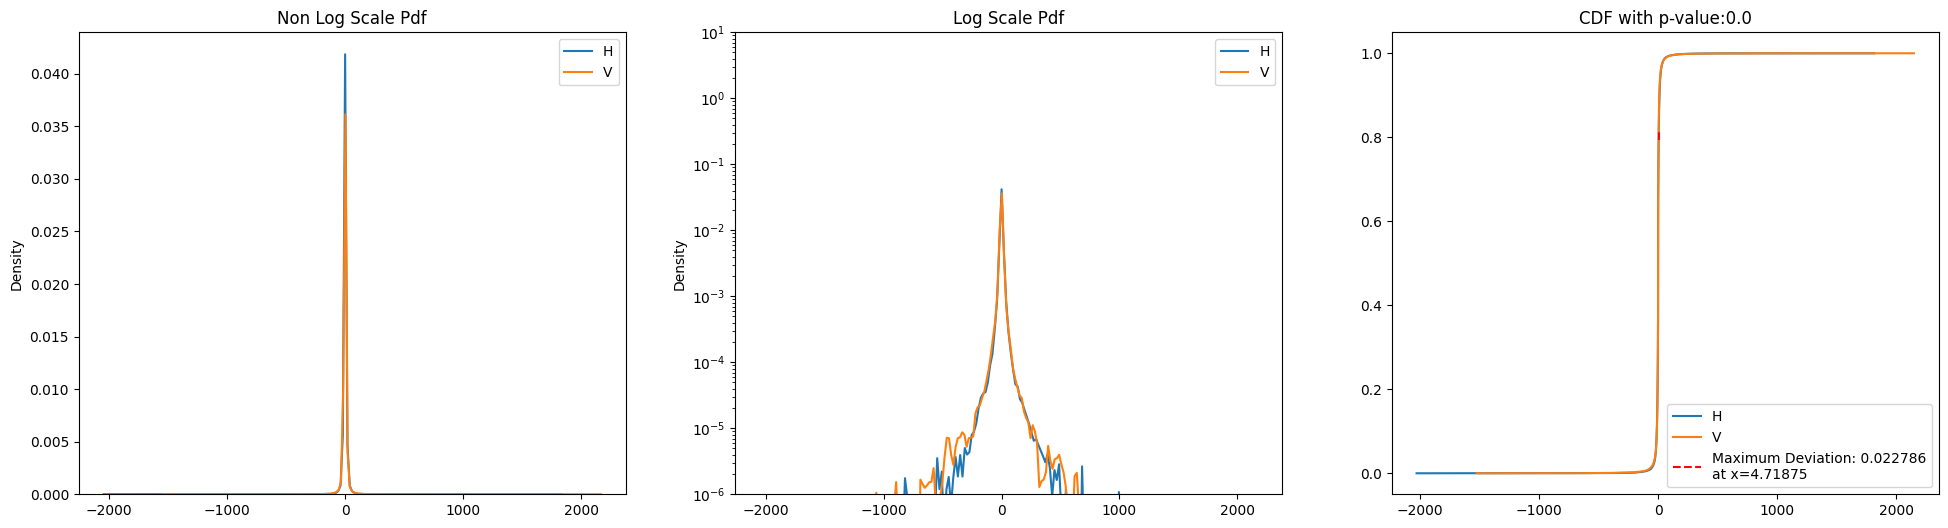

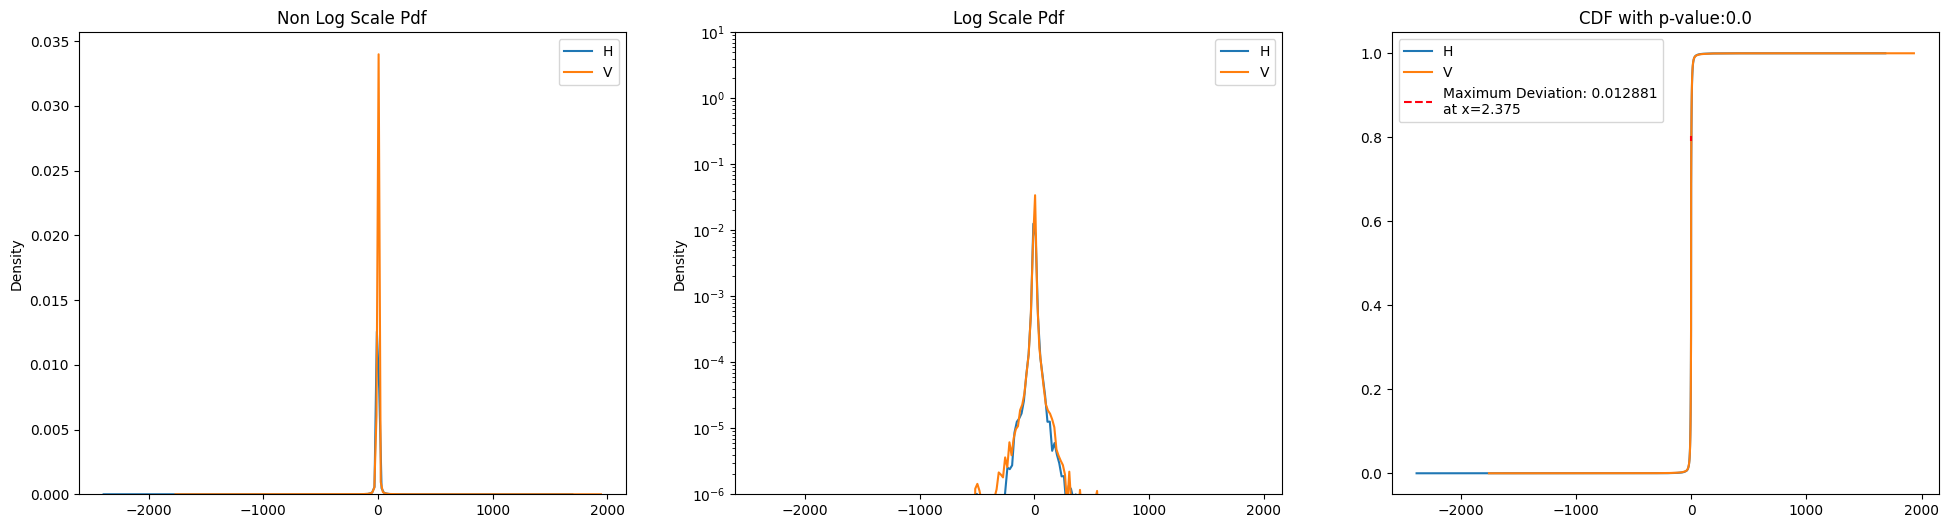

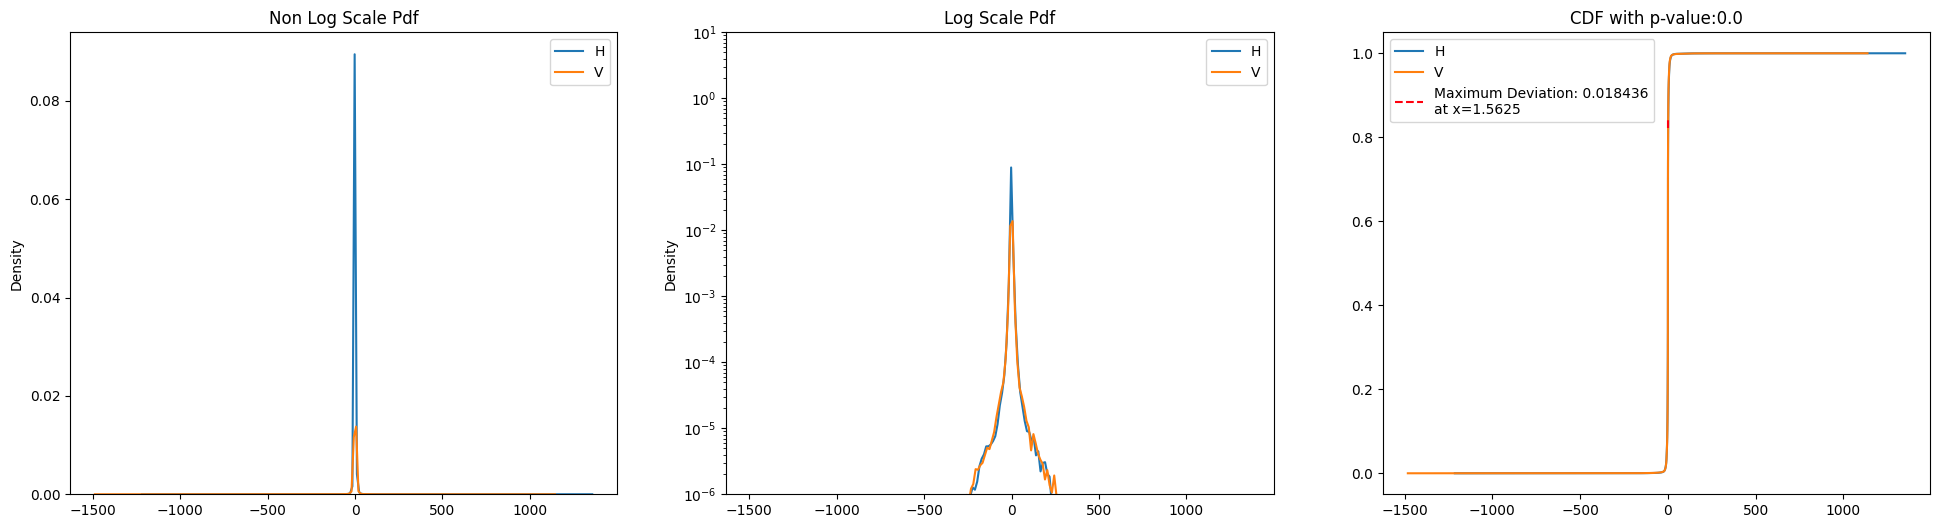

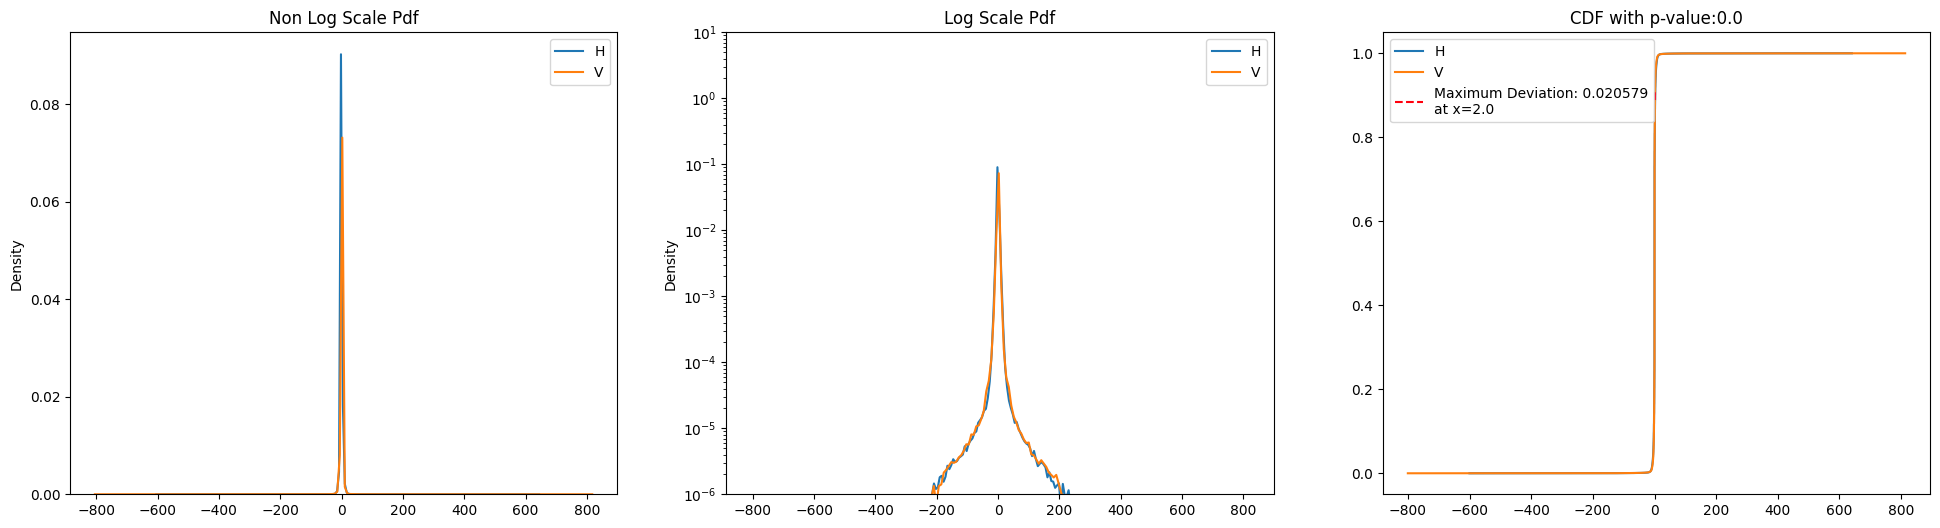

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


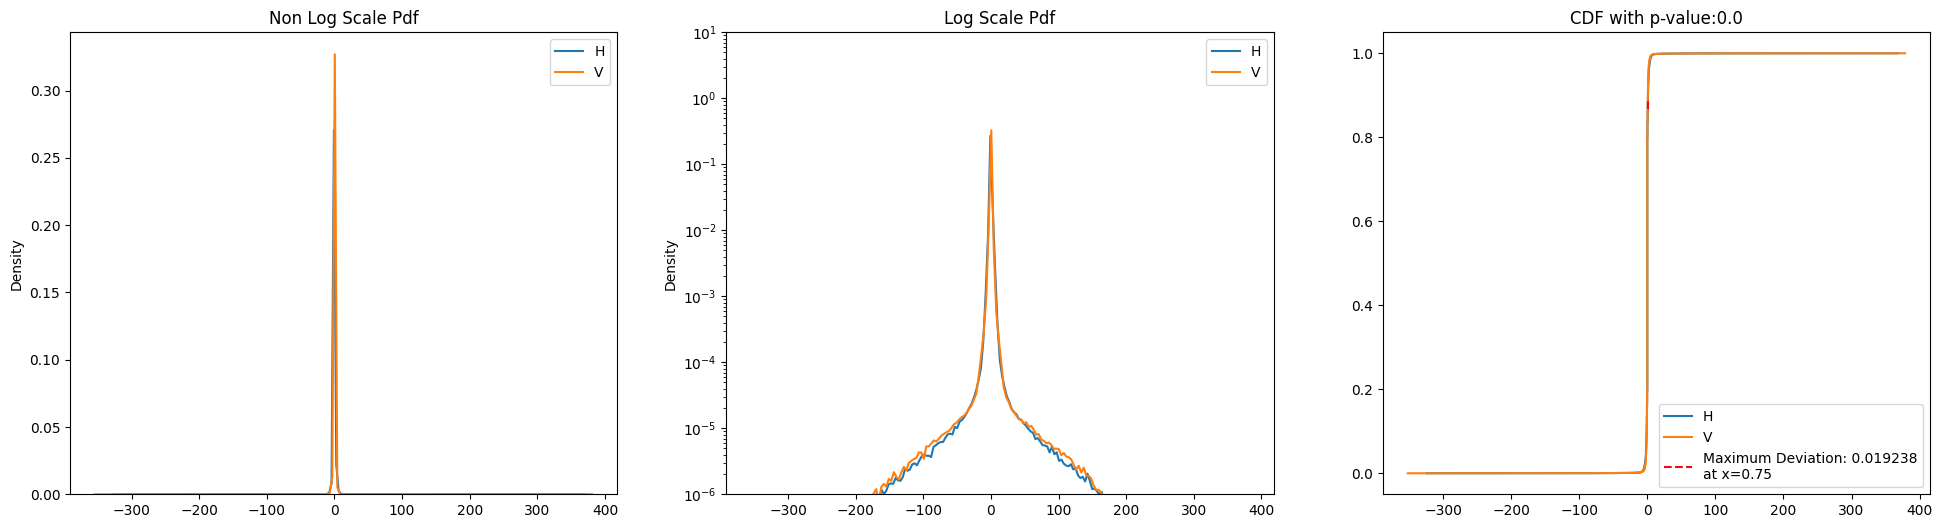

In [36]:
for i in range(2, 10):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Gray

In [37]:
gray_wv = convert_to_wavelet_basis(data_dir, "Gray", debug=True)
gray_wv.head()

10 layers being used


100%|██████████| 1008/1008 [00:08<00:00, 114.67it/s]


channel  layer orientation  \
0    Gray      1          L1   
1    Gray      2           D   
2    Gray      2           H   
3    Gray      2           V   
4    Gray      3           D   

                                                data  
0  [156.98046875000017, 906.2929687500011, 517.75...  
1  [-54.37109375000004, 60.48046875000009, 4.5468...  
2  [63.76953125000006, 51.62109375000001, 8.68749...  
3  [-89.59765625000009, -4.46484375, -10.94140625...  
4  [8.632812500000007, 6.179687499999998, -2.5156...

In [38]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_79795/3441235349.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gray_df = pd.concat([gray_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.072421   1.009655e-02
0     2     D      H  0.125000   2.795023e-07
1     2     D      V  0.133929   2.686059e-08
2     3     H      V  0.039683   3.493194e-03
1     3     D      V  0.089038   2.525440e-14
0     3     D      H  0.119048   2.681317e-25
2     4     H      V  0.026600   2.171858e-05
1     4     D      V  0.082093   1.008004e-47
0     4     D      H  0.096540   7.224272e-66
2     5     H      V  0.026414   5.538019e-20
1     5     D      V  0.061306  7.831046e-106
0     5     D      H  0.079691  1.262859e-178
2     6     H      V  0.018210   1.353495e-37
1     6     D      V  0.044879  2.912146e-226
0     6     D      H  0.059016   0.000000e+00
2     7     H      V  0.015810  1.739889e-112
1     7     D      V  0.034595   0.000000e+00
0     7     D      H  0.049519   0.000000e+00
2     8     H      V  0.021517   0.000000e+00
1     8     D      V  0.040886   0.000000e+00
0     8     D      H  0.058739   0.000000e+00
2     9     H      V  0.022656   0.000000e+00
1     9     D      V  0.047973   0.000000e+00
0     9     D      H  0.064606   0.000000e+00
2    10     H      V  0.028995   0.000000e+00
1    10     D      V  0.036201   0.000000e+00
0    10     D      H  0.048569   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


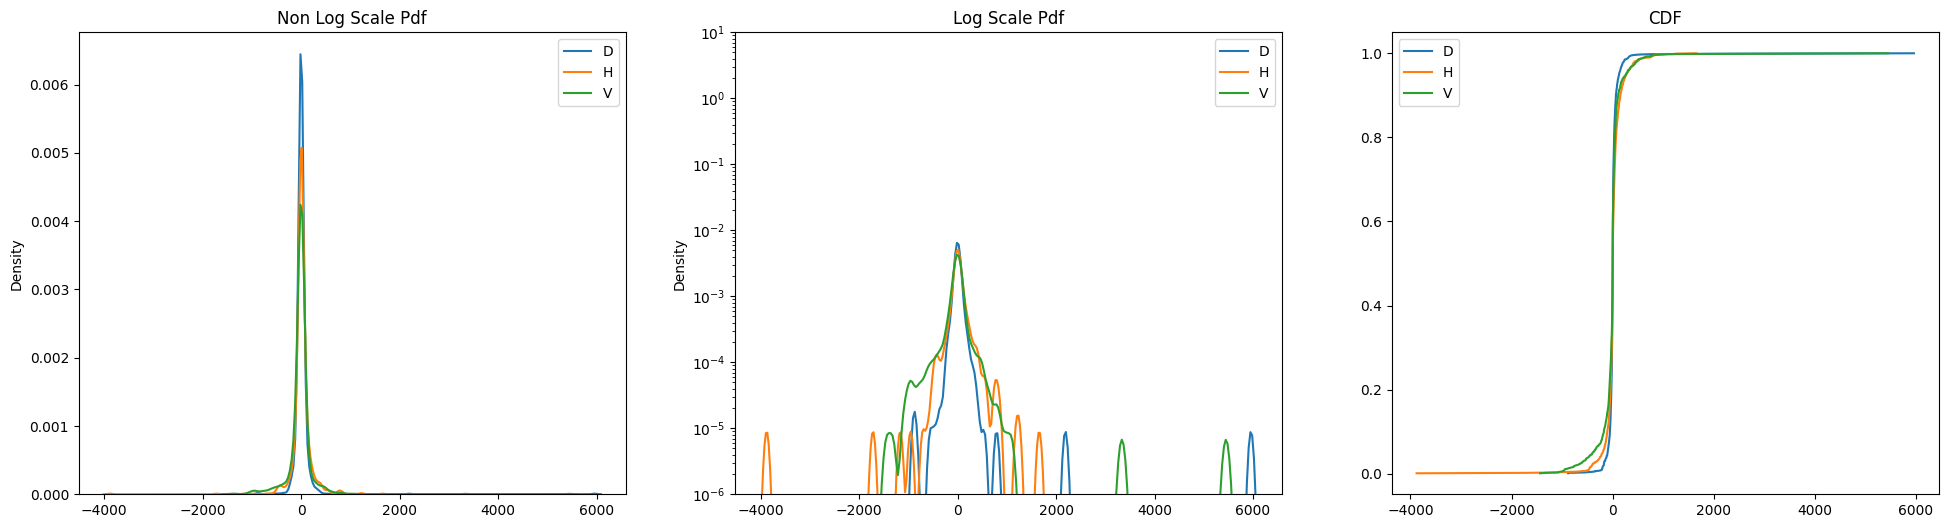

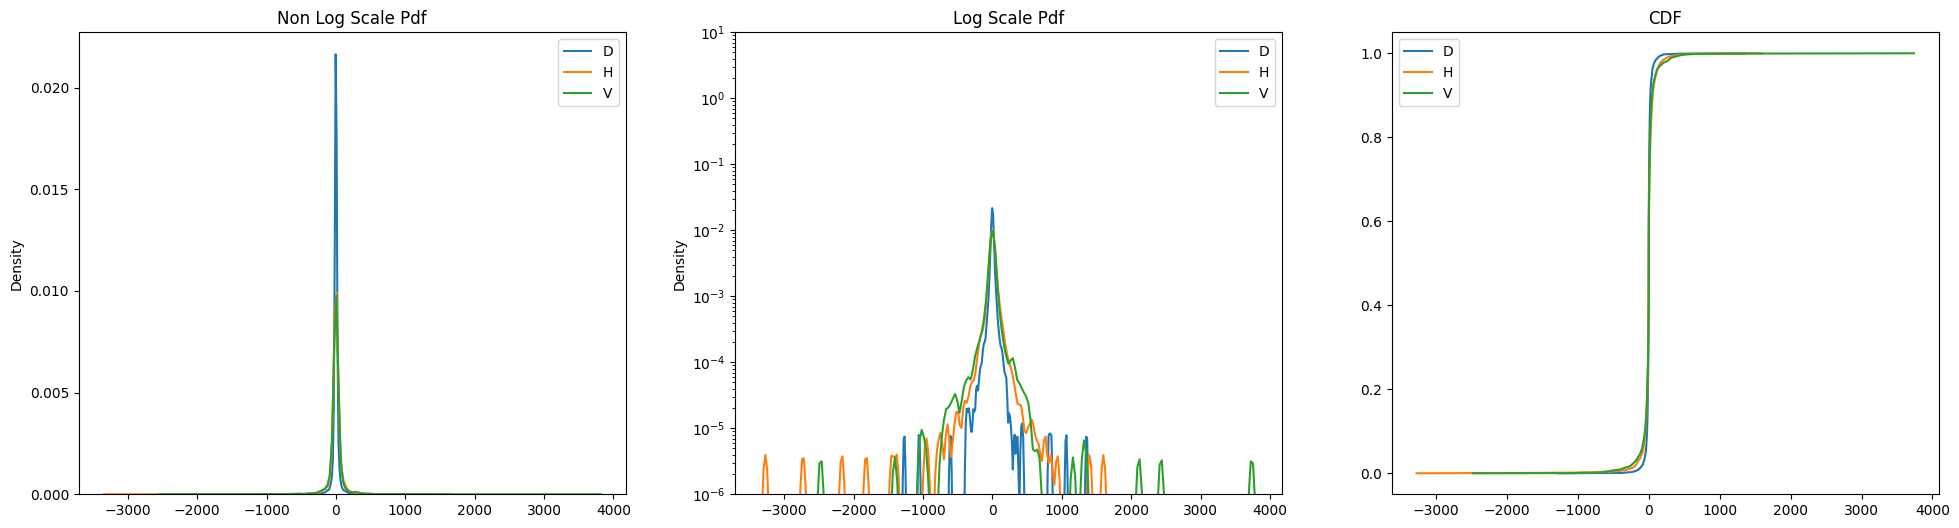

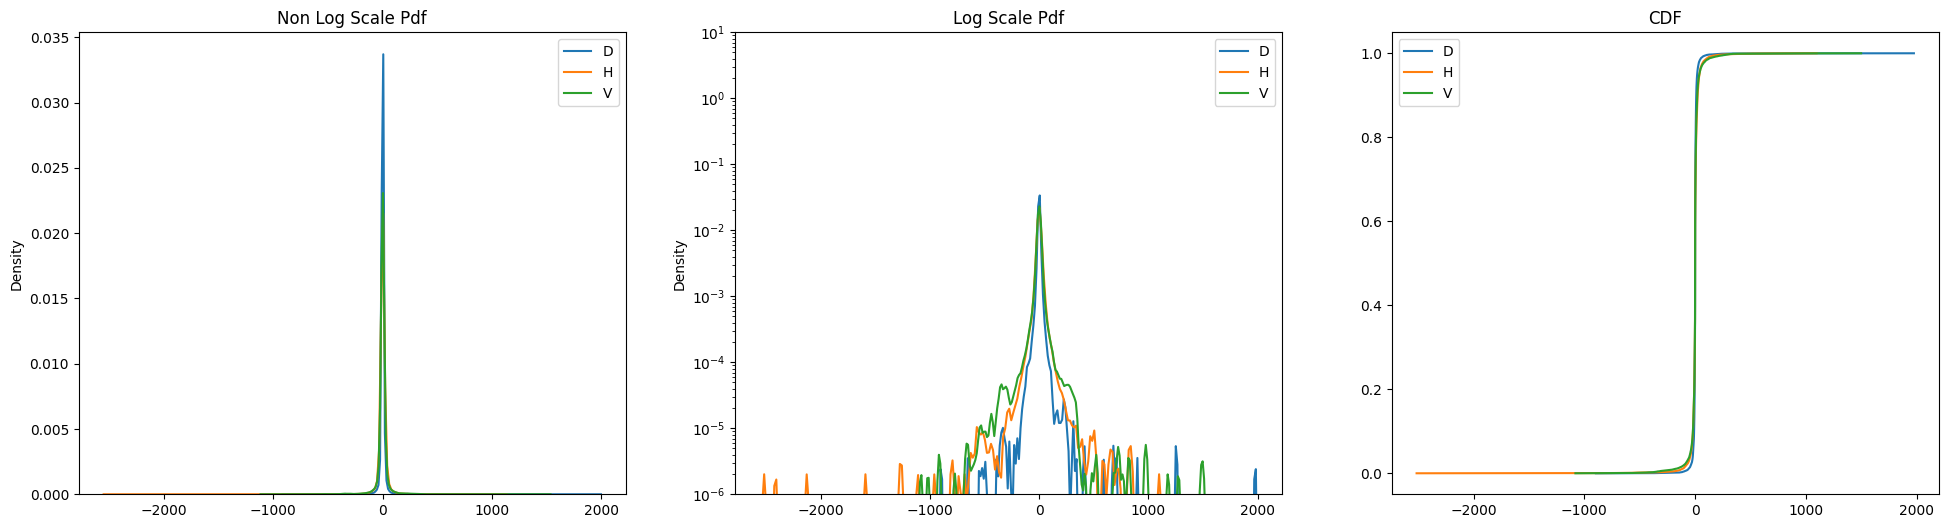

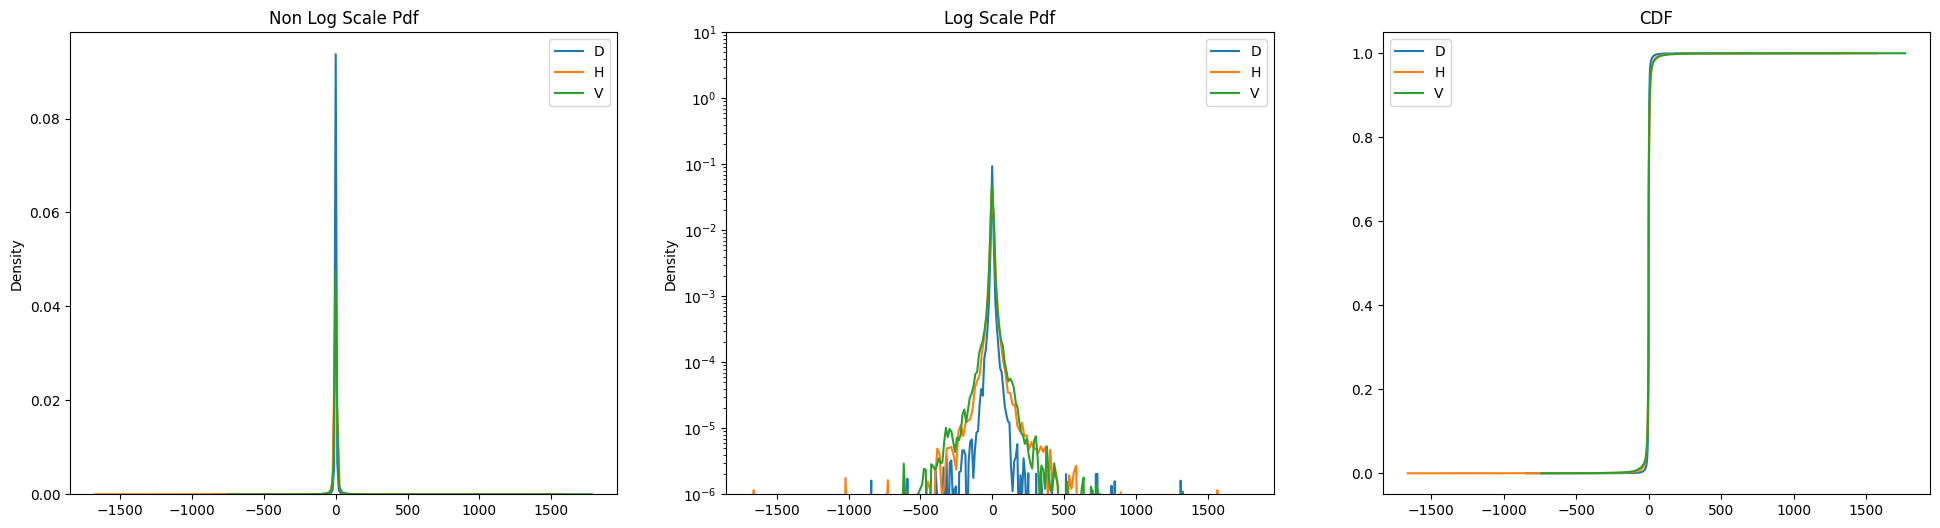

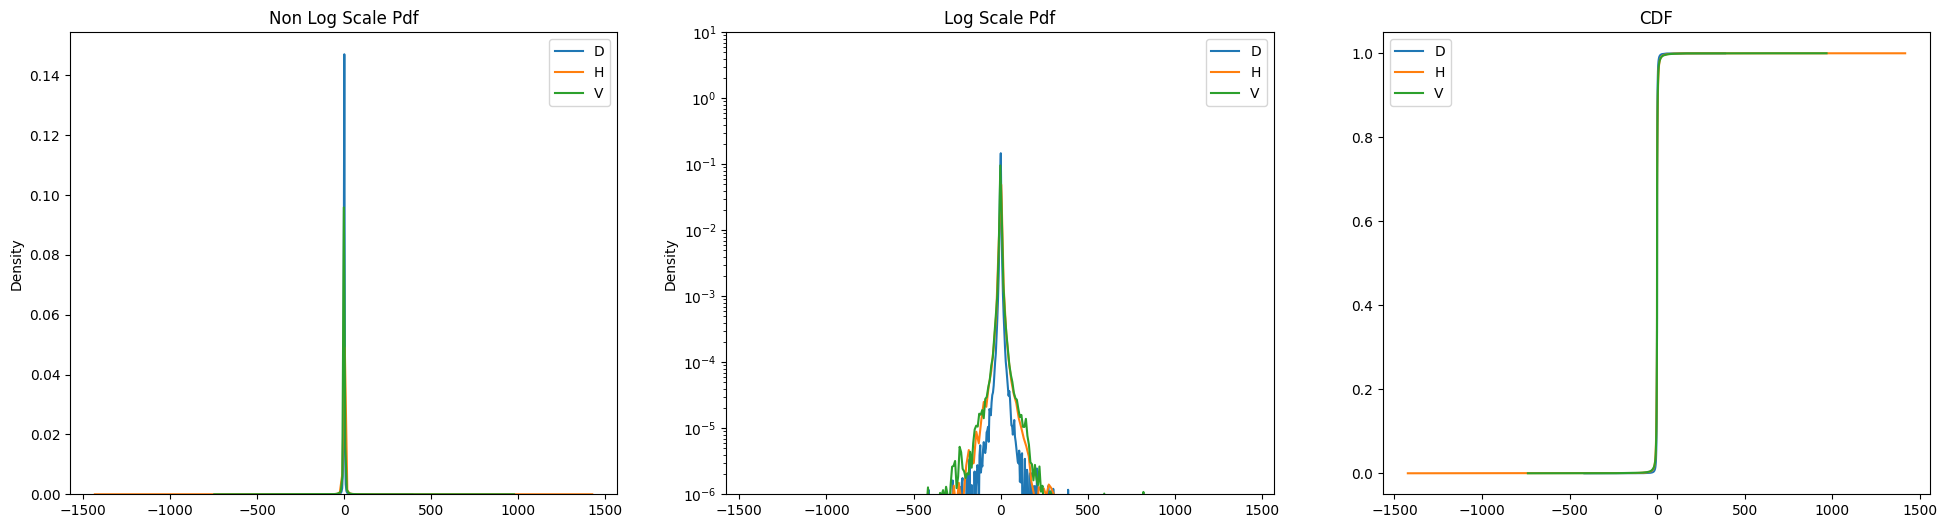

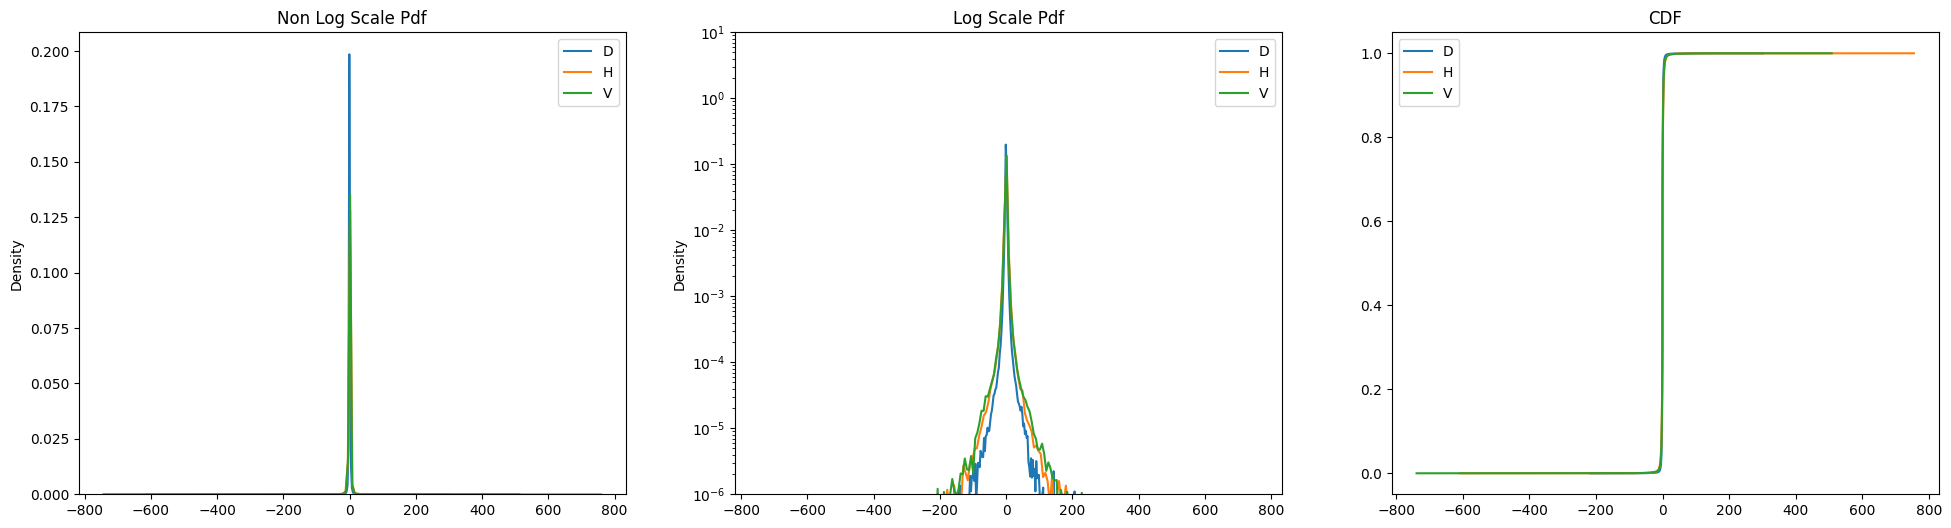

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


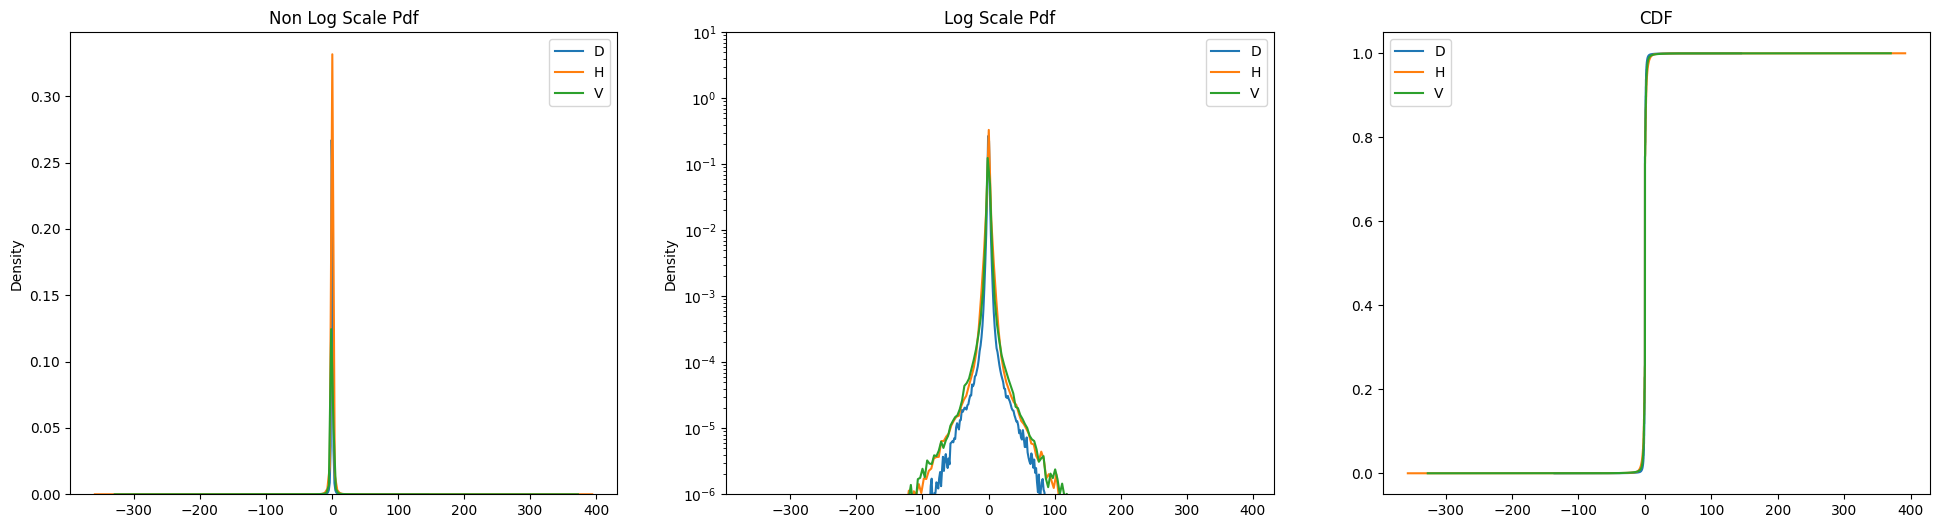

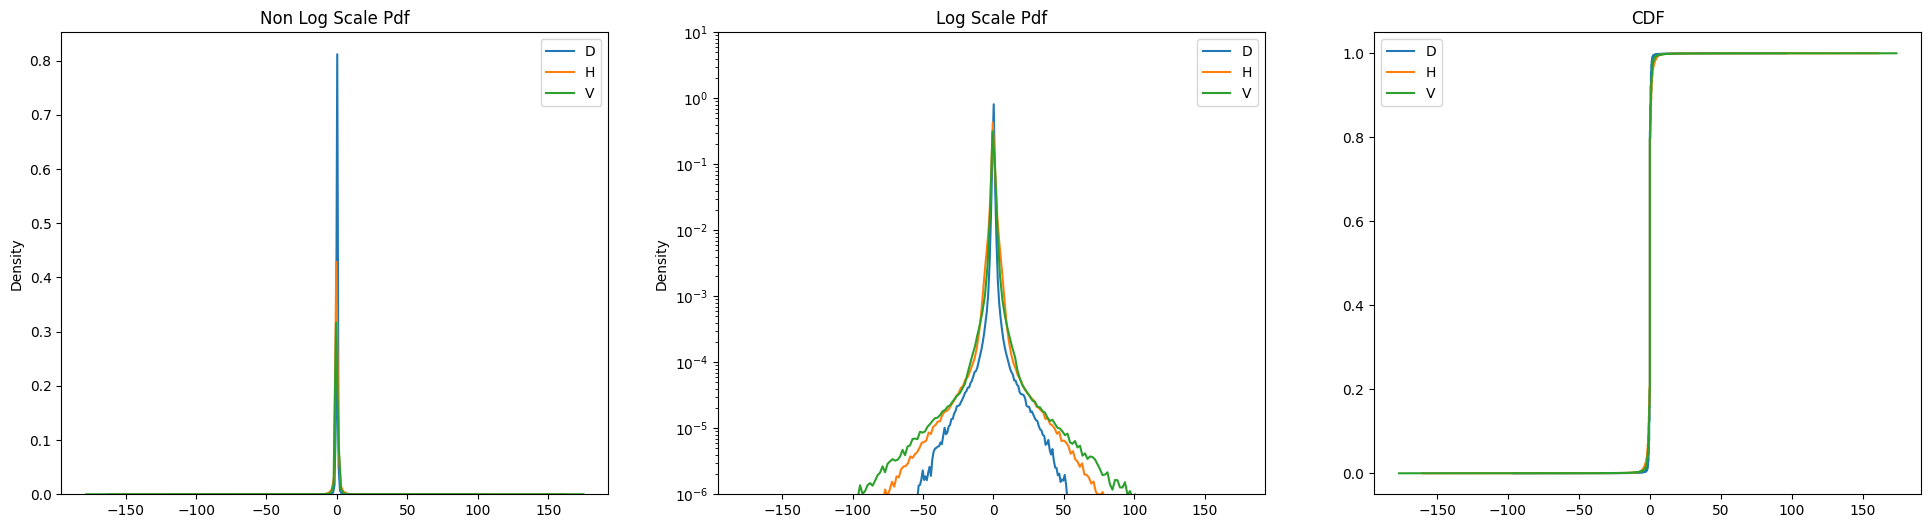

In [39]:
for i in range(2, 10):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


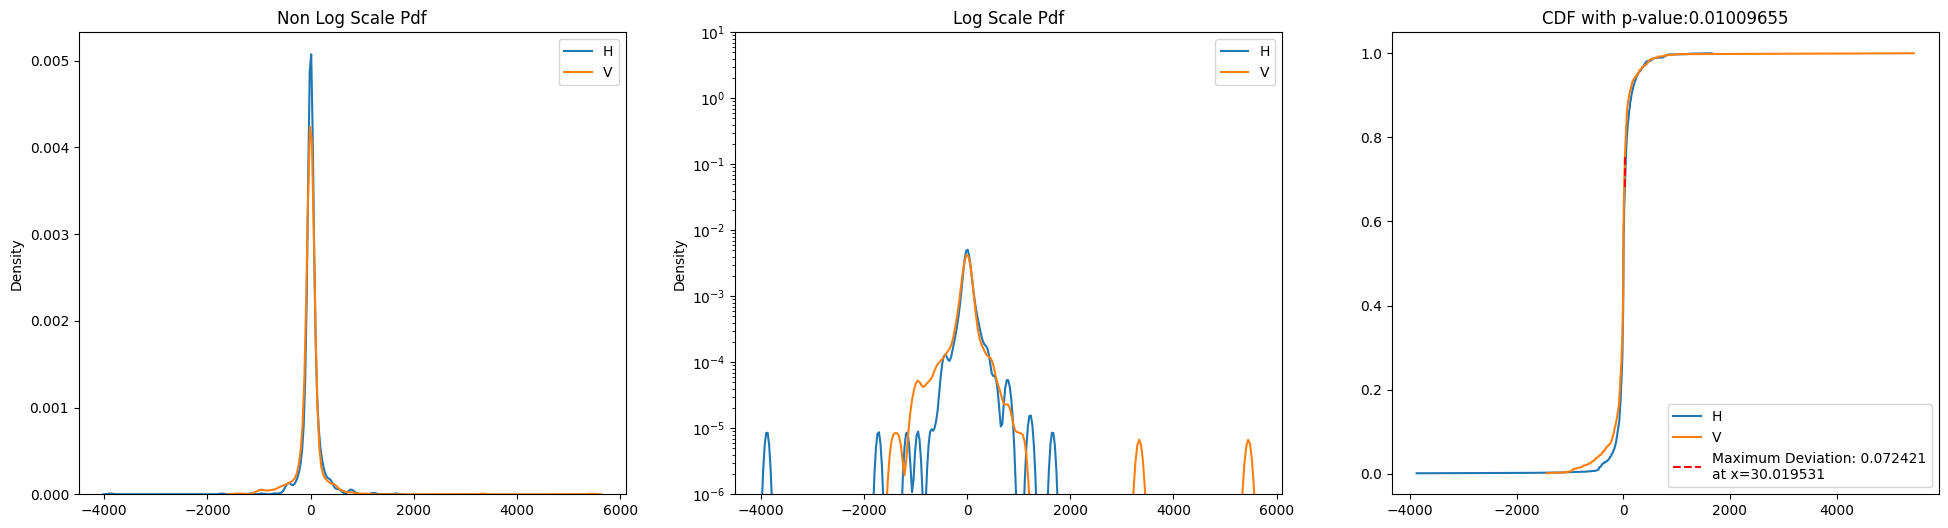

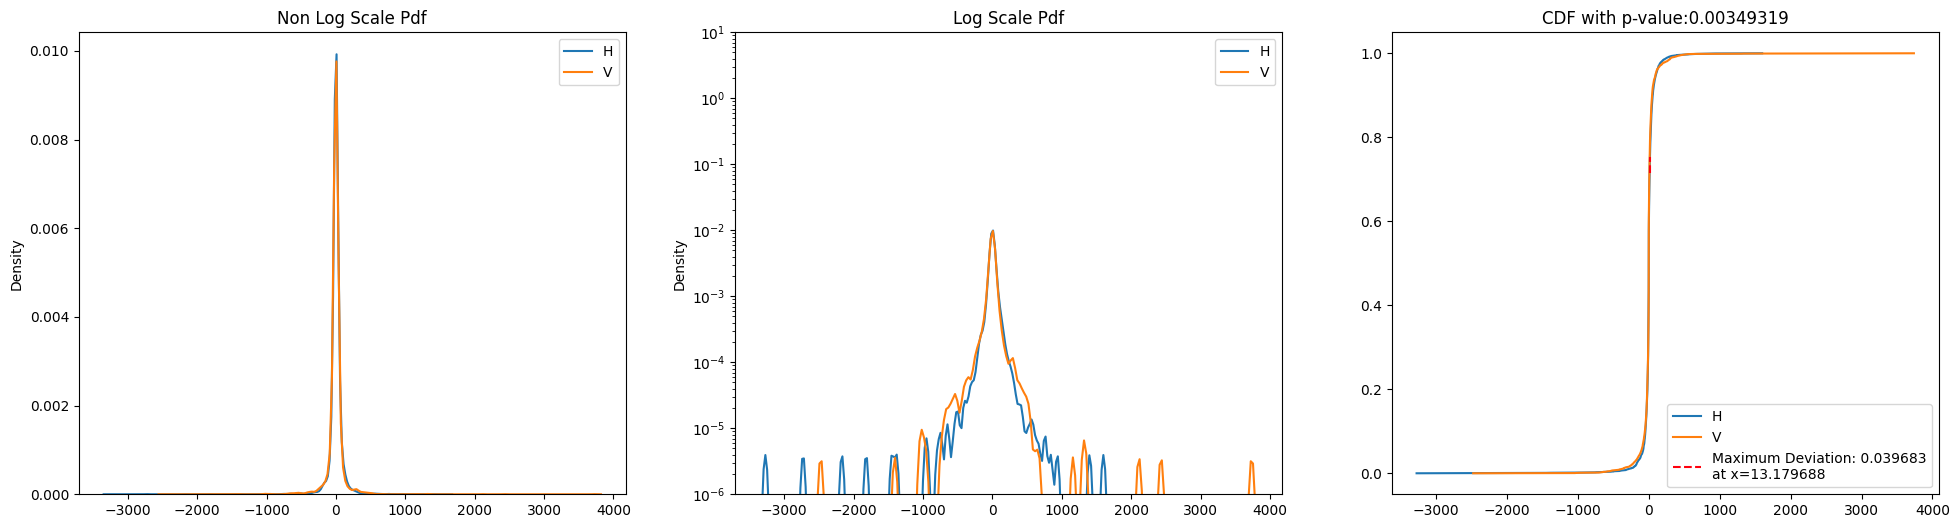

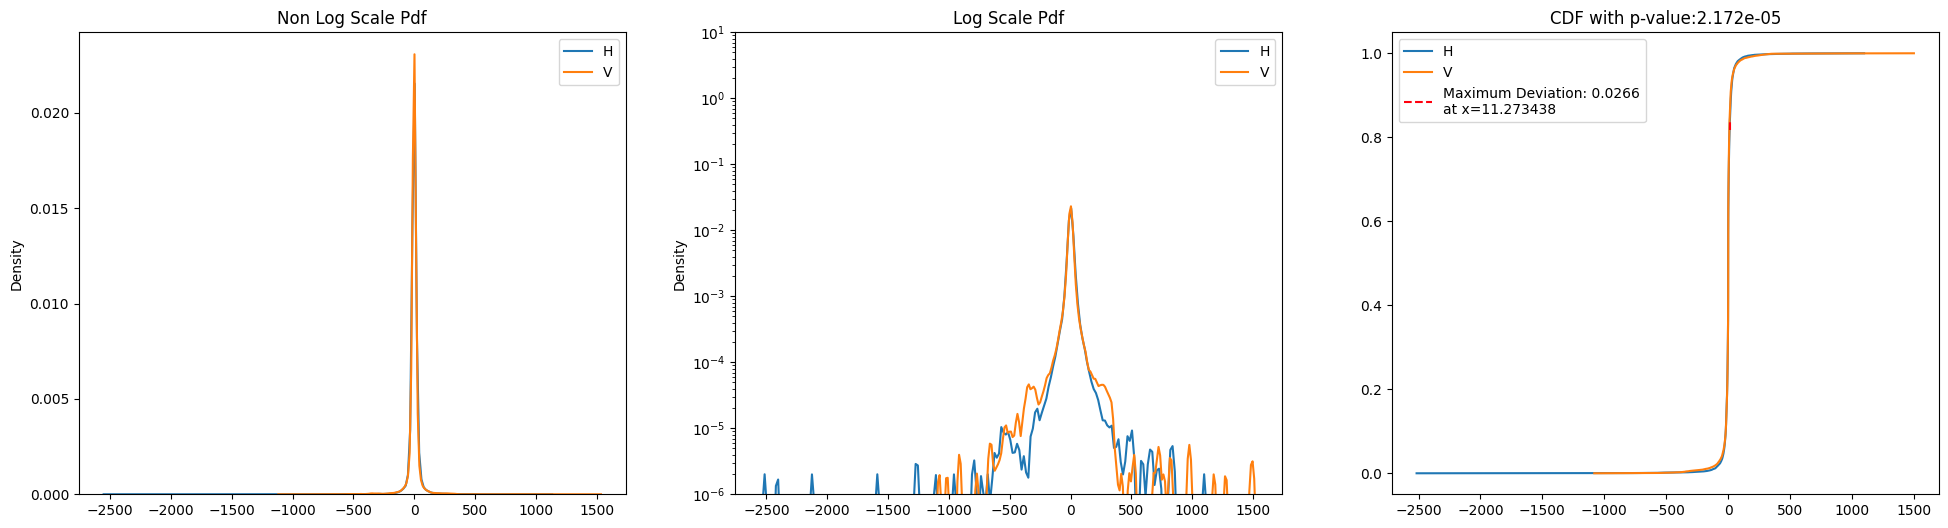

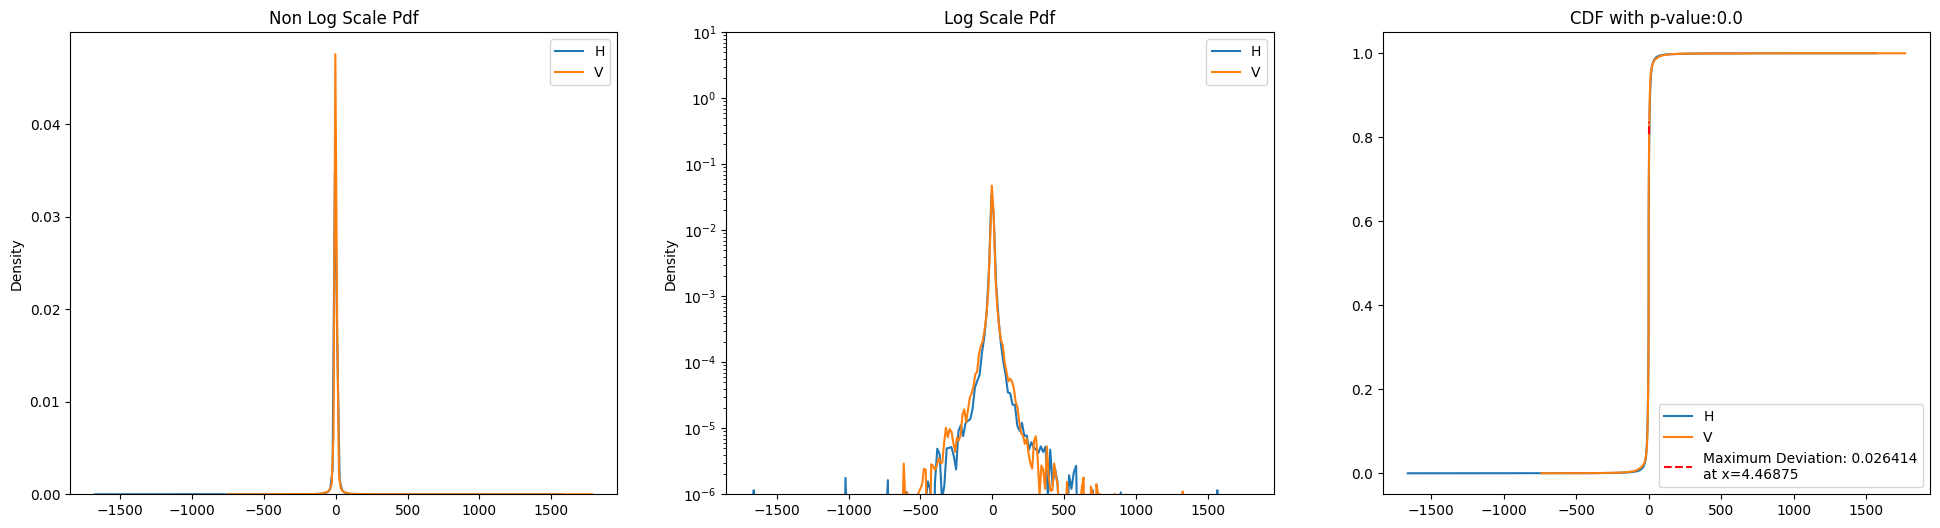

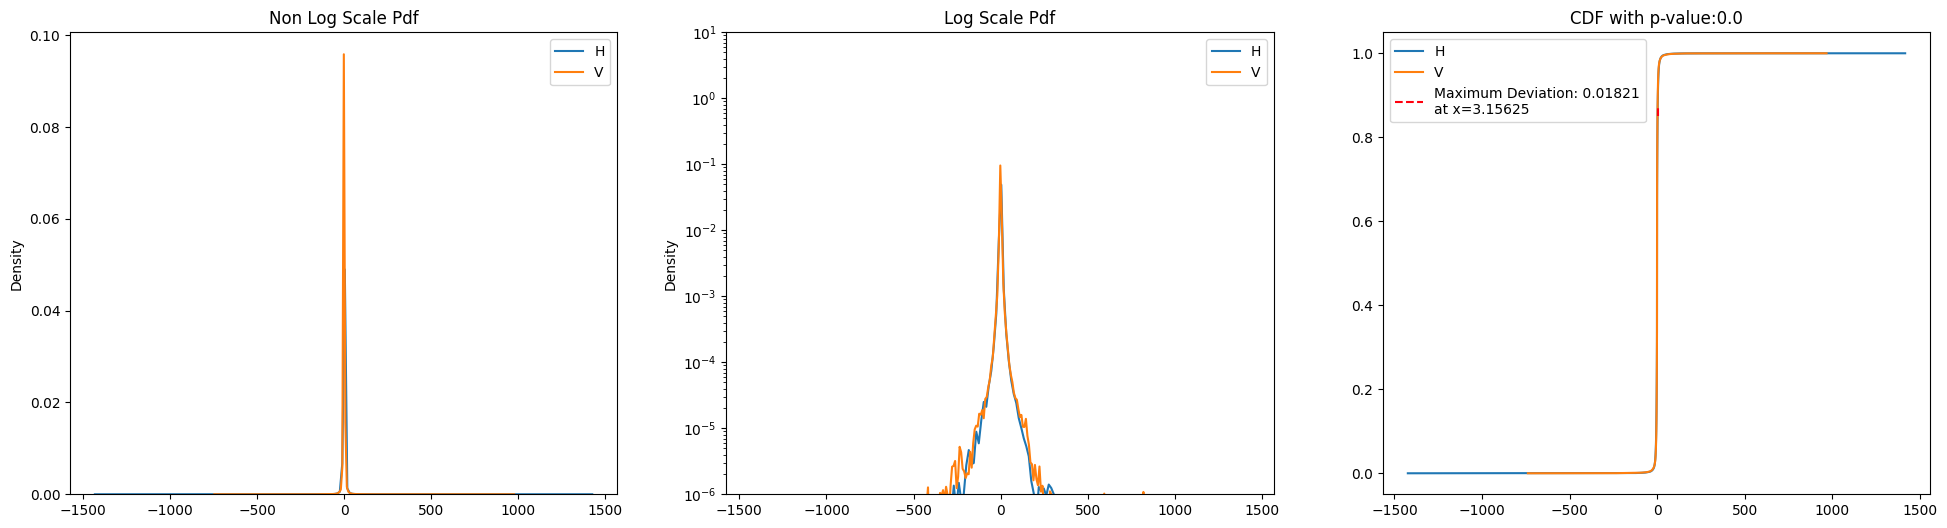

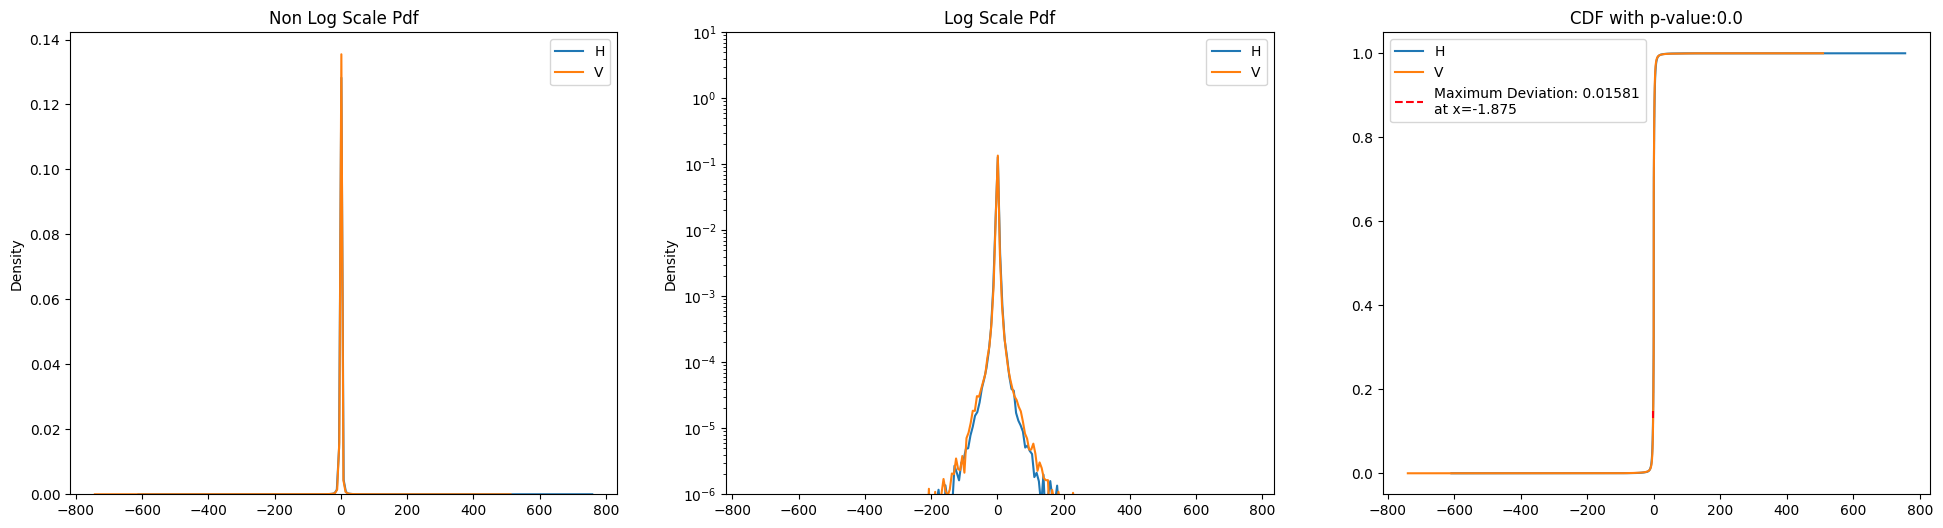

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


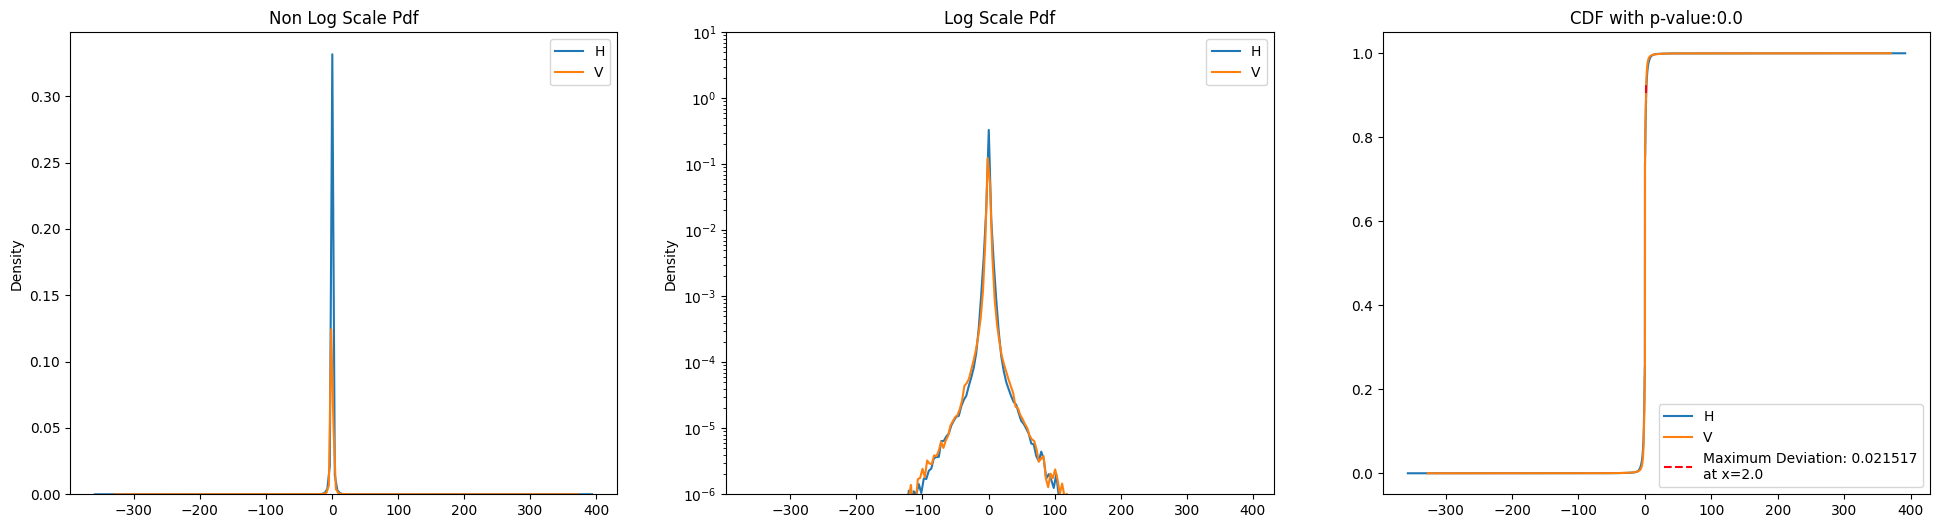

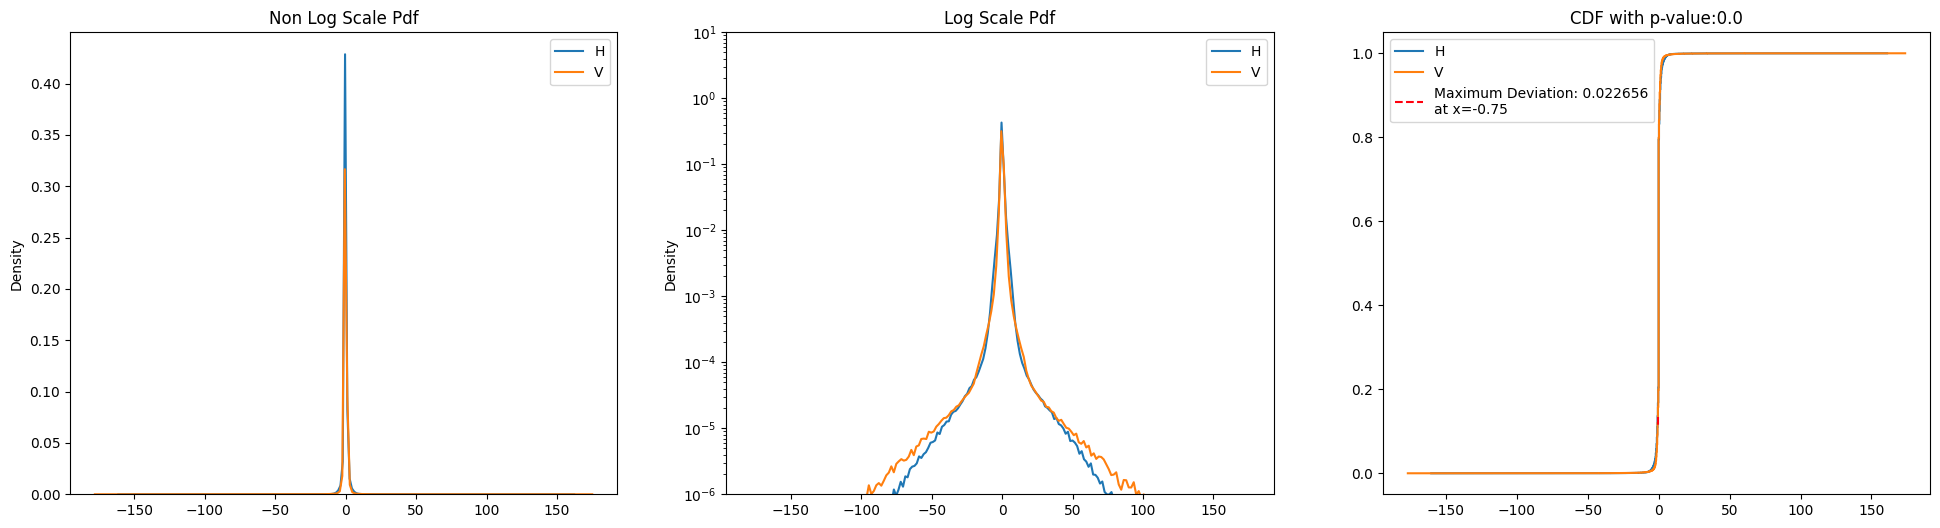

In [40]:
for i in range(2, 10):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Infrared

In [41]:
infra_dir = ROOT_DIR + 'raw-data/agriVision/toy-agriVision-nearIR'
infra_wv = convert_to_wavelet_basis(data_dir, "Infrared", debug=True)
infra_wv.head()

10 layers being used


100%|██████████| 1008/1008 [00:08<00:00, 117.71it/s]


channel  layer orientation  \
0  Infrared      1          L1   
1  Infrared      2           D   
2  Infrared      2           H   
3  Infrared      2           V   
4  Infrared      3           D   

                                                data  
0  [156.98046875000017, 906.2929687500011, 517.75...  
1  [-54.37109375000004, 60.48046875000009, 4.5468...  
2  [63.76953125000006, 51.62109375000001, 8.68749...  
3  [-89.59765625000009, -4.46484375, -10.94140625...  
4  [8.632812500000007, 6.179687499999998, -2.5156...

In [42]:
infra_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = infra_wv[infra_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    infra_df = pd.concat([infra_df, ks_df], axis = 0)
infra_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_79795/1142268191.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  infra_df = pd.concat([infra_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.072421   1.009655e-02
0     2     D      H  0.125000   2.795023e-07
1     2     D      V  0.133929   2.686059e-08
2     3     H      V  0.039683   3.493194e-03
1     3     D      V  0.089038   2.525440e-14
0     3     D      H  0.119048   2.681317e-25
2     4     H      V  0.026600   2.171858e-05
1     4     D      V  0.082093   1.008004e-47
0     4     D      H  0.096540   7.224272e-66
2     5     H      V  0.026414   5.538019e-20
1     5     D      V  0.061306  7.831046e-106
0     5     D      H  0.079691  1.262859e-178
2     6     H      V  0.018210   1.353495e-37
1     6     D      V  0.044879  2.912146e-226
0     6     D      H  0.059016   0.000000e+00
2     7     H      V  0.015810  1.739889e-112
1     7     D      V  0.034595   0.000000e+00
0     7     D      H  0.049519   0.000000e+00
2     8     H      V  0.021517   0.000000e+00
1     8     D      V  0.040886   0.000000e+00
0     8     D      H  0.058739   0.000000e+00
2     9     H      V  0.022656   0.000000e+00
1     9     D      V  0.047973   0.000000e+00
0     9     D      H  0.064606   0.000000e+00
2    10     H      V  0.028995   0.000000e+00
1    10     D      V  0.036201   0.000000e+00
0    10     D      H  0.048569   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


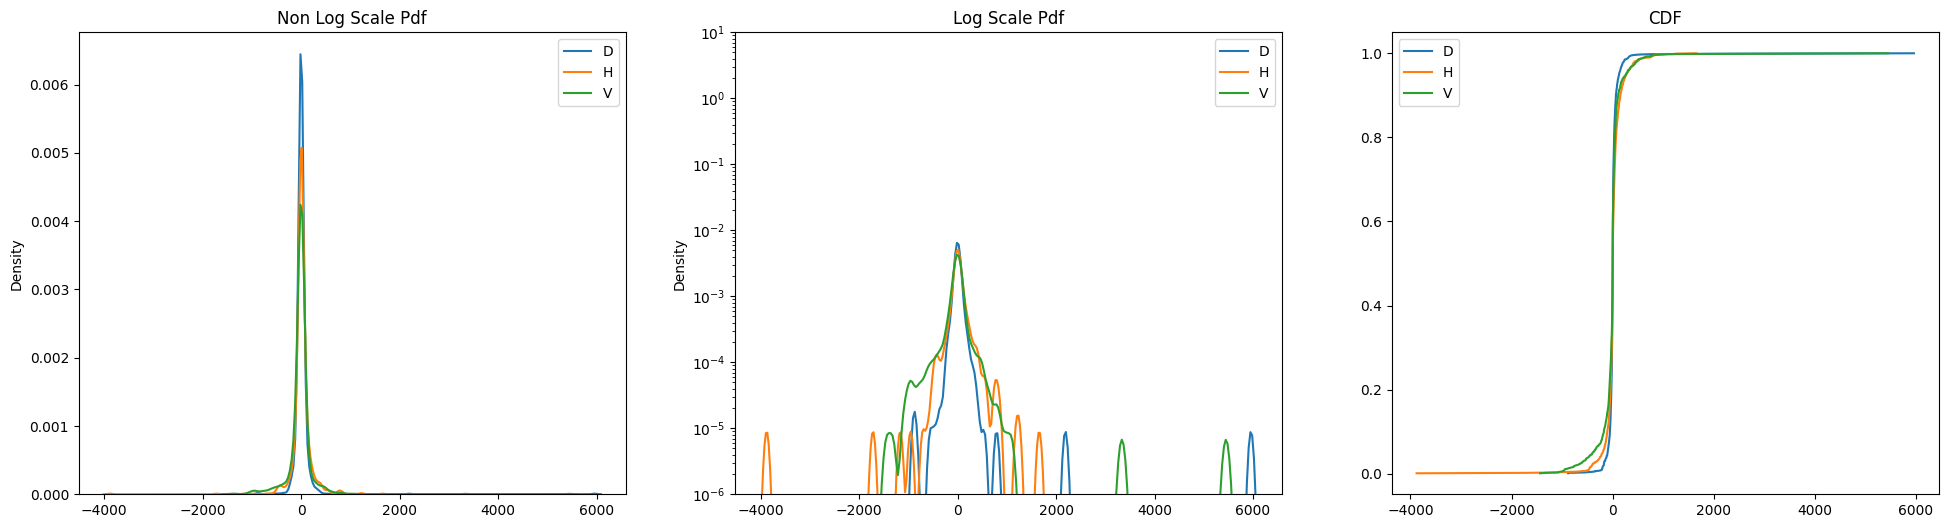

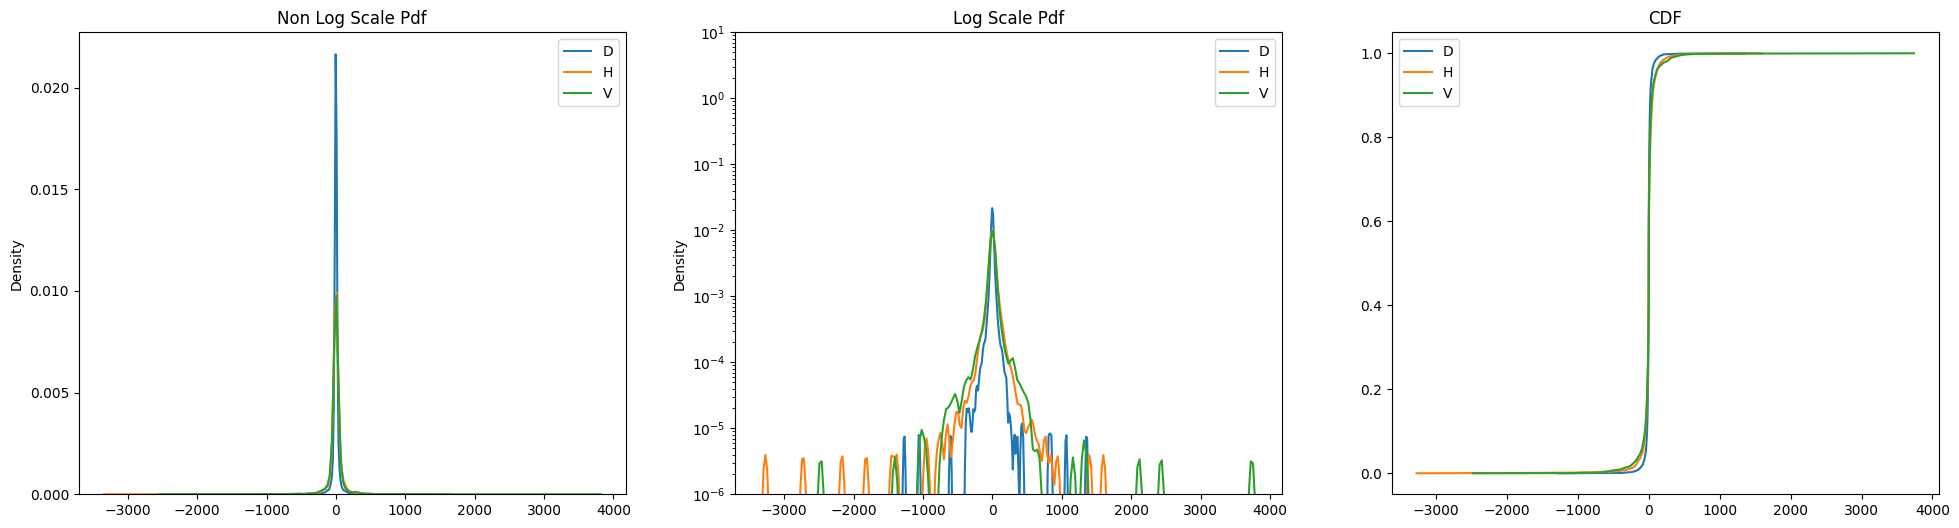

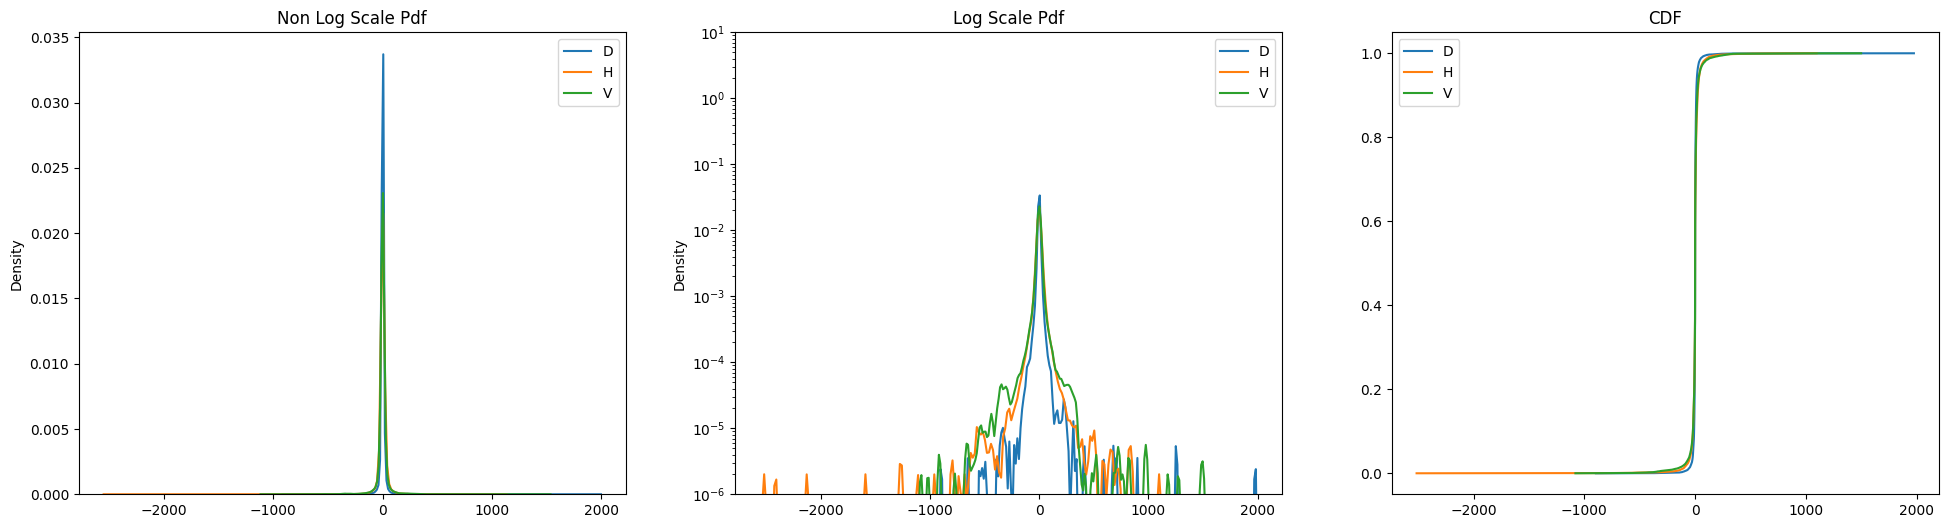

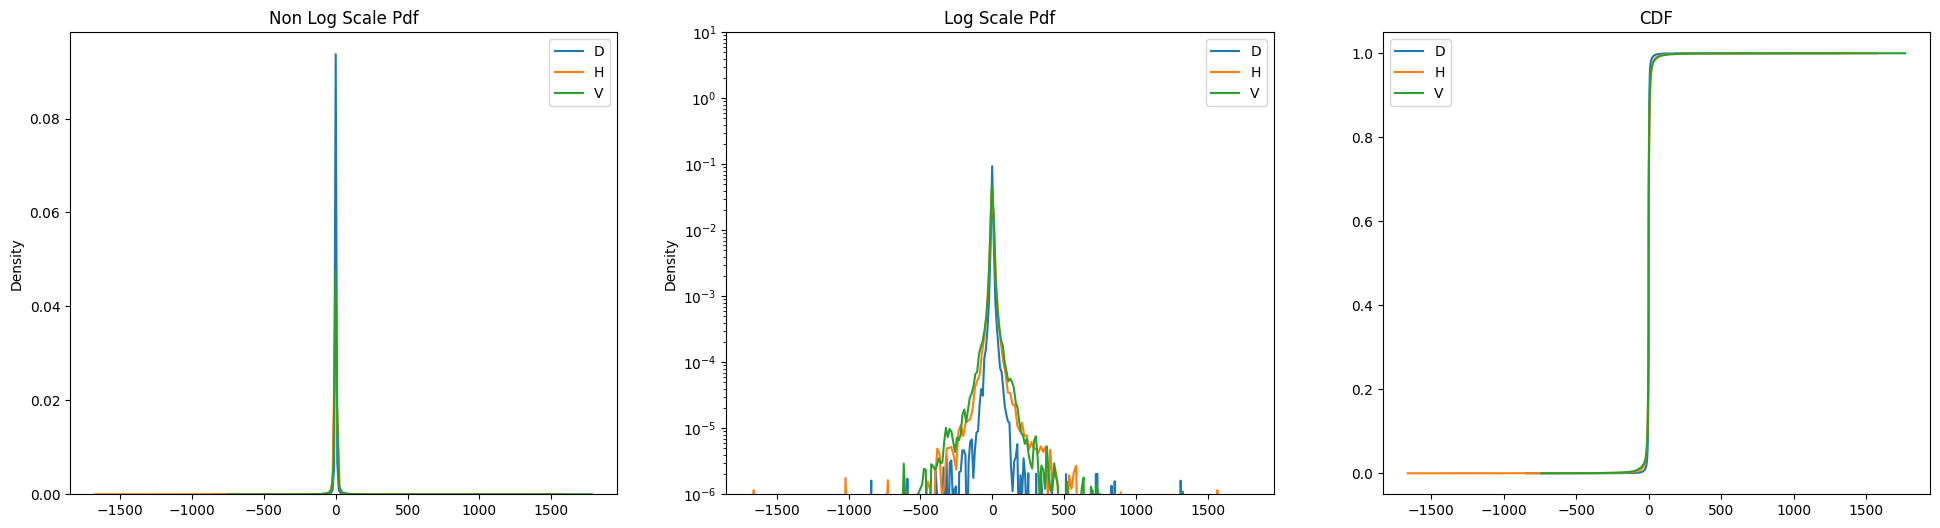

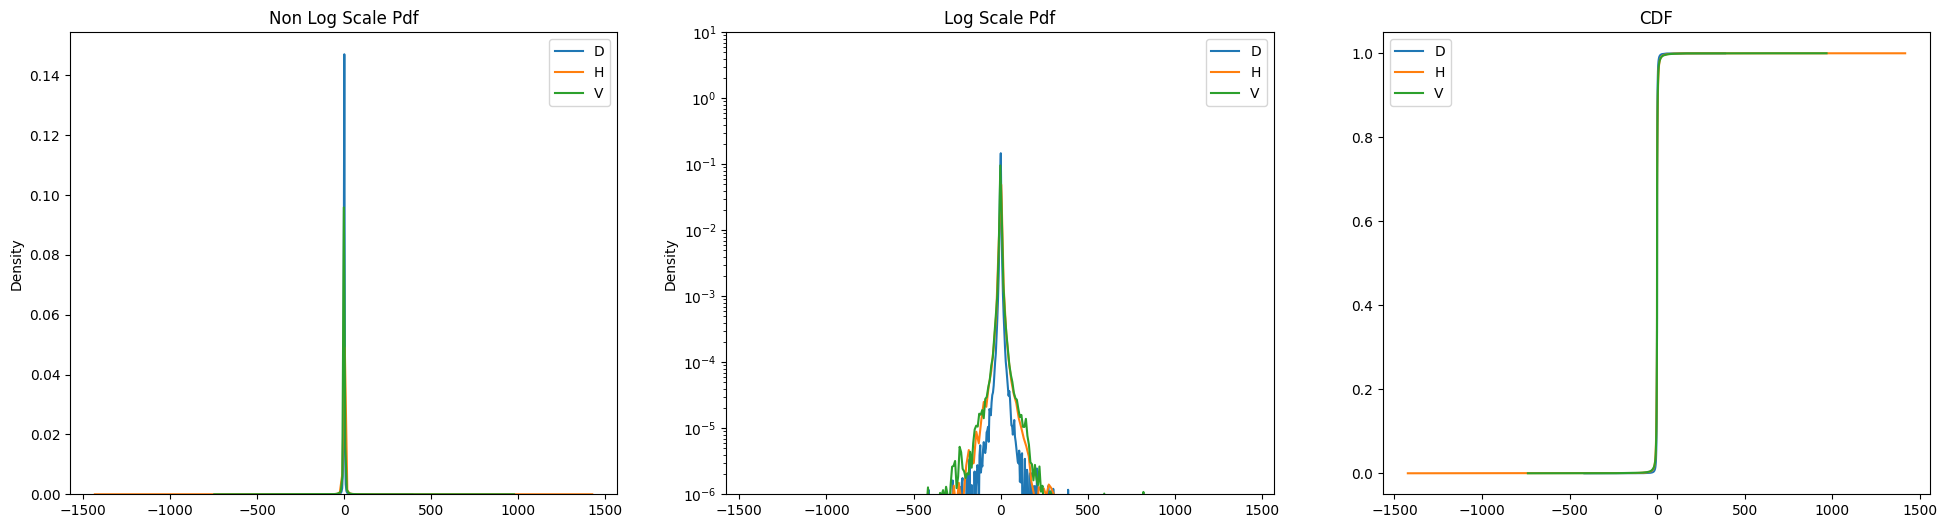

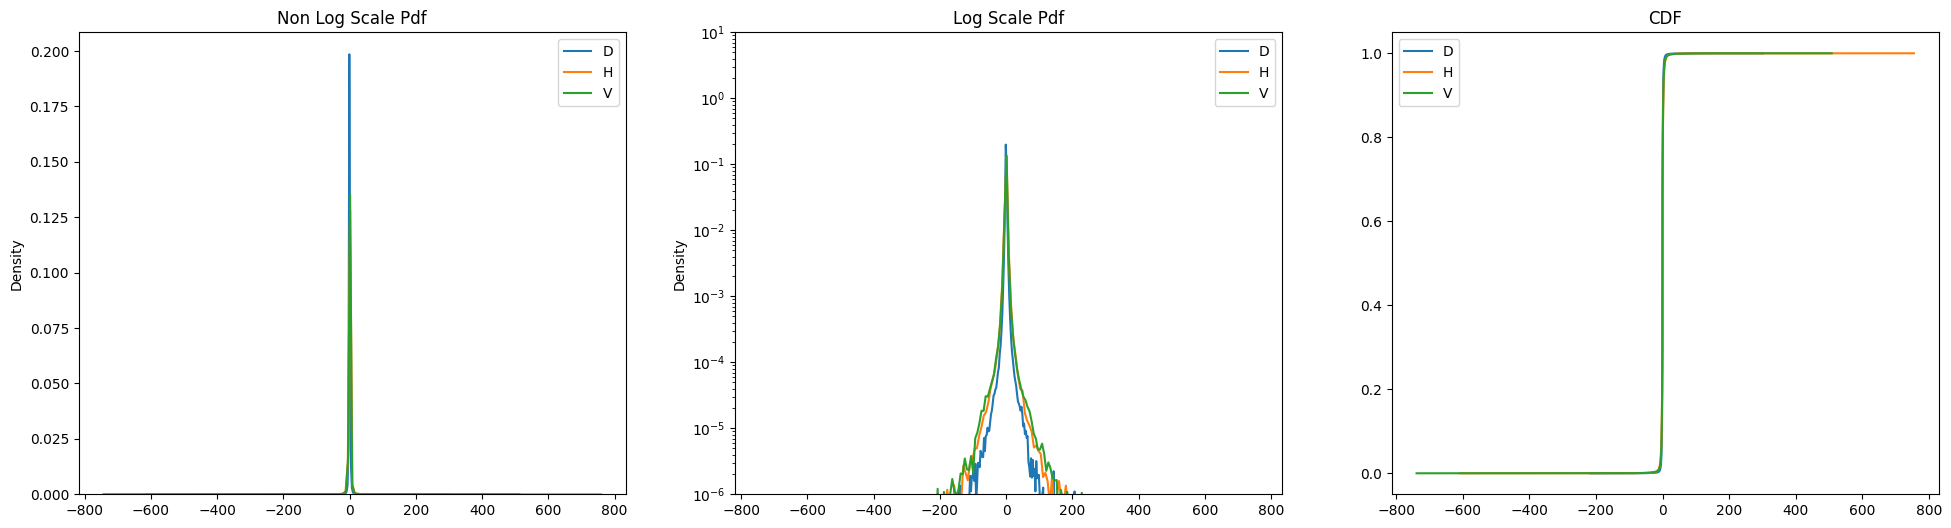

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


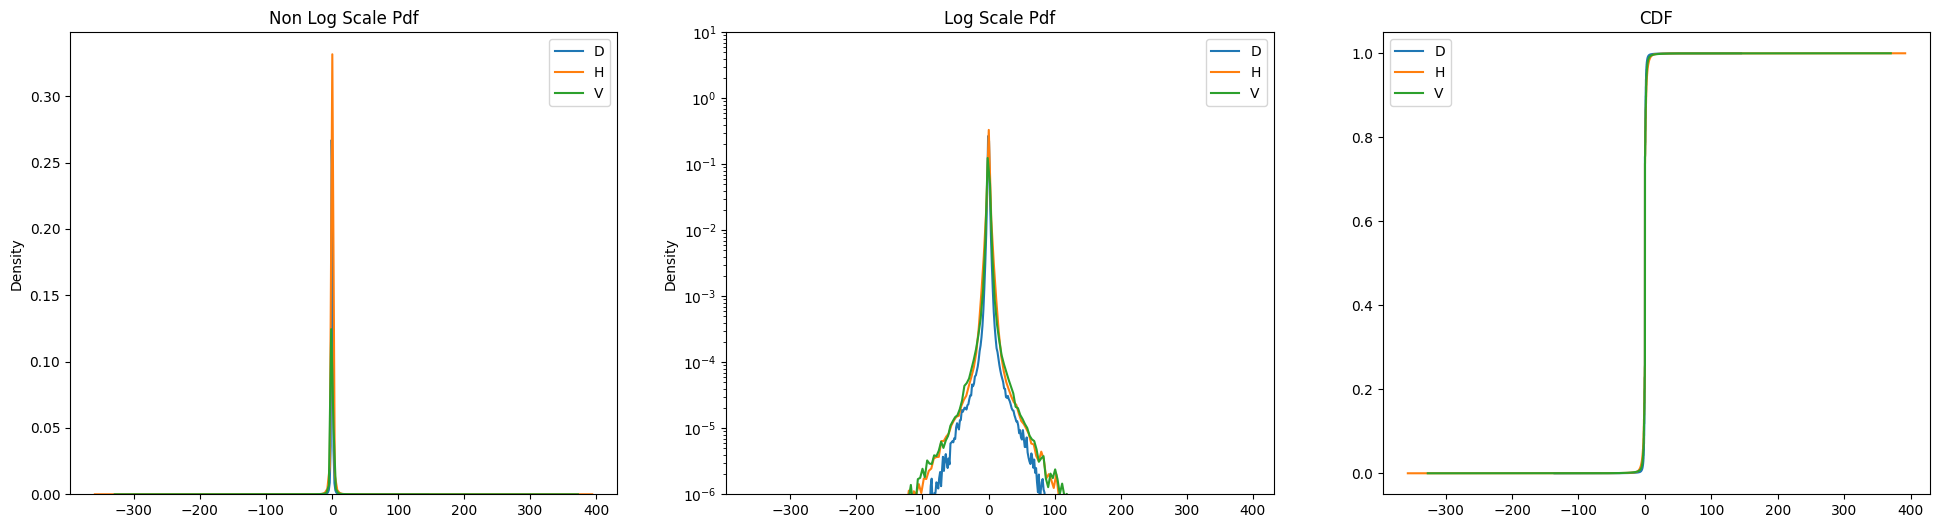

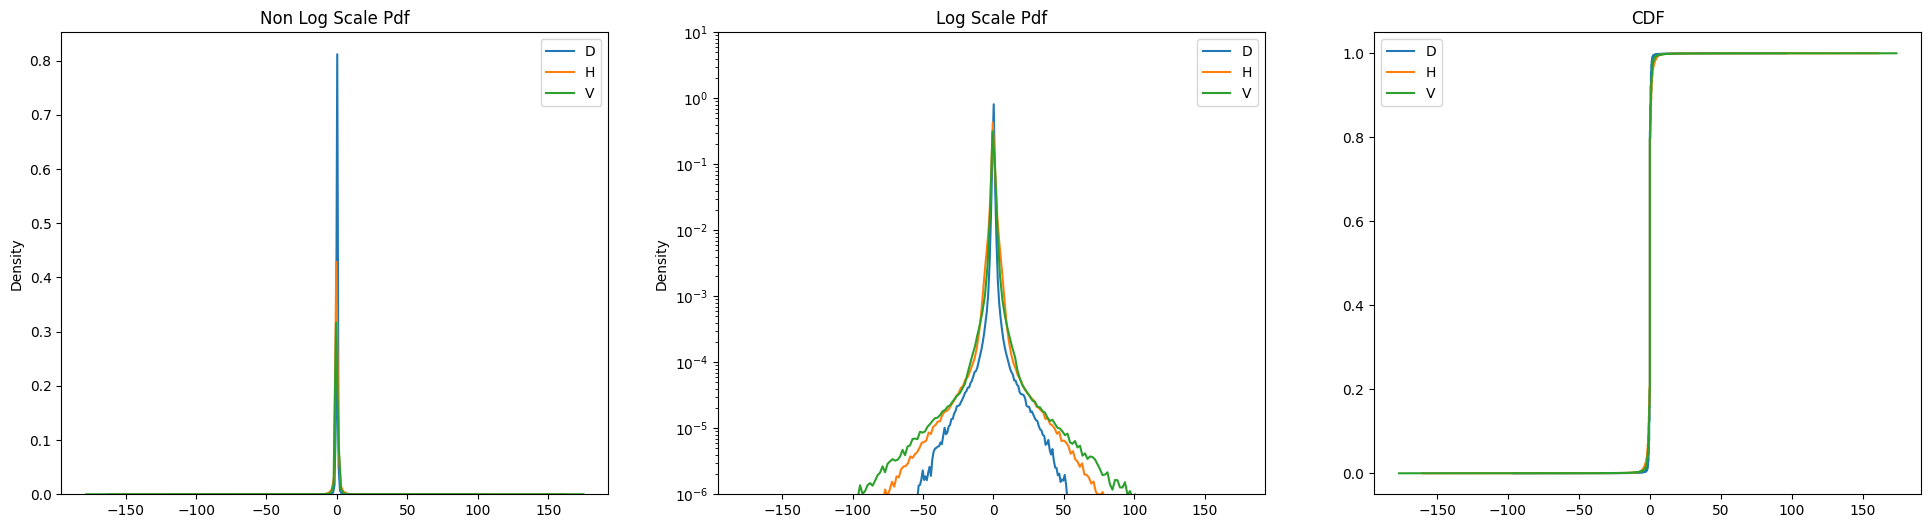

In [43]:
for i in range(2, 10):
    layer_df = infra_wv[infra_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


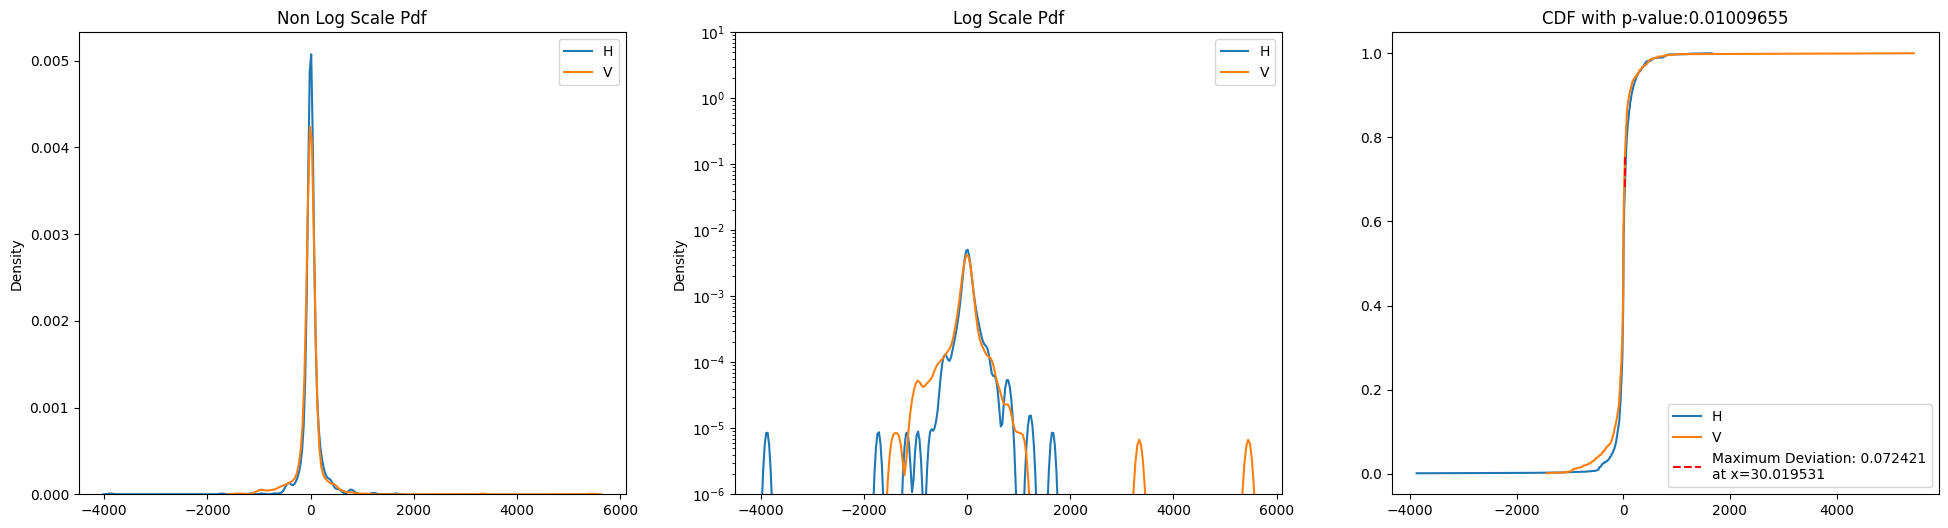

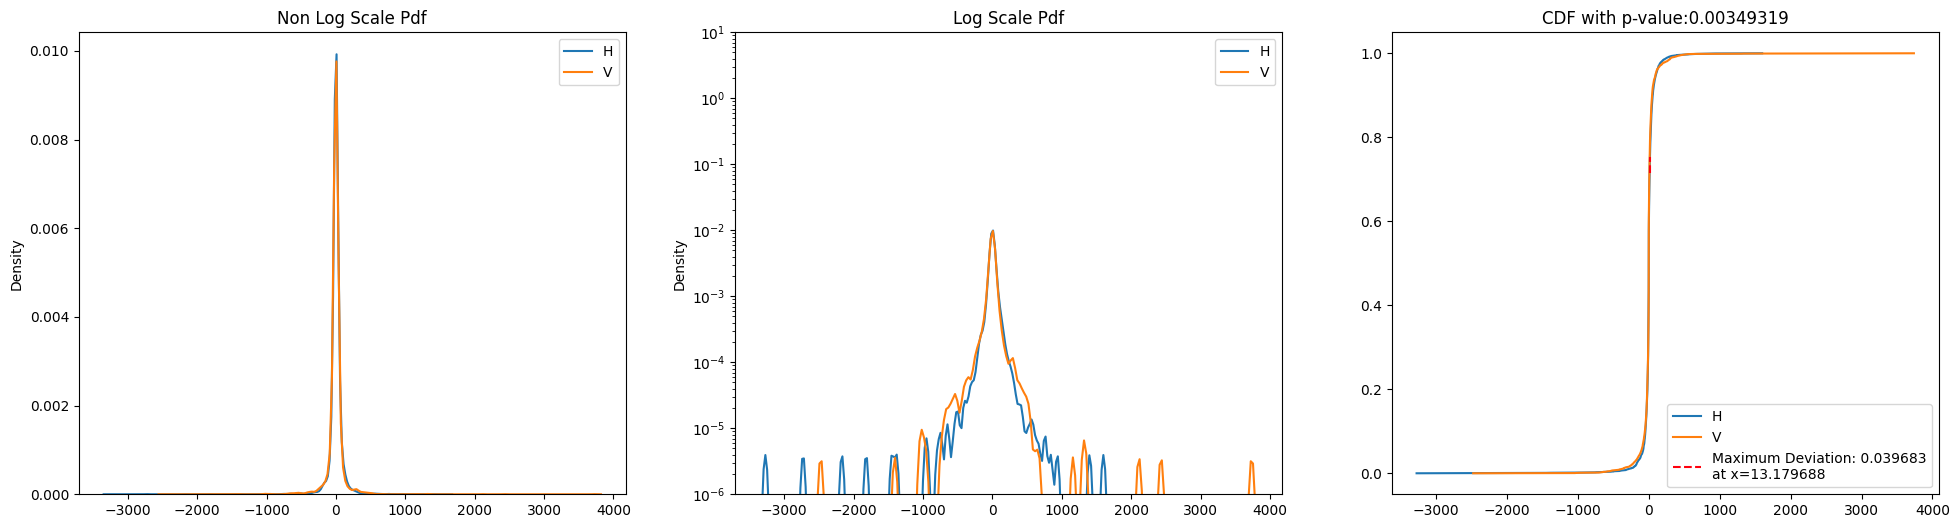

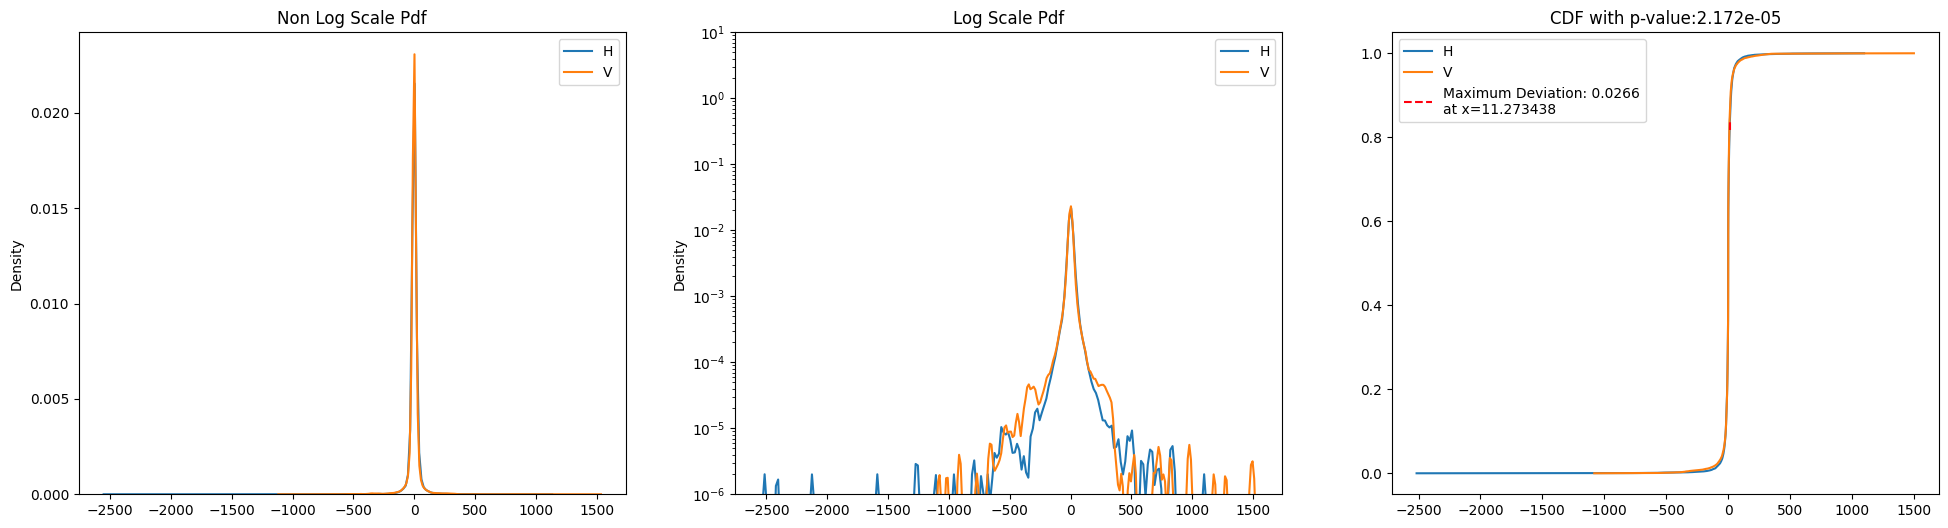

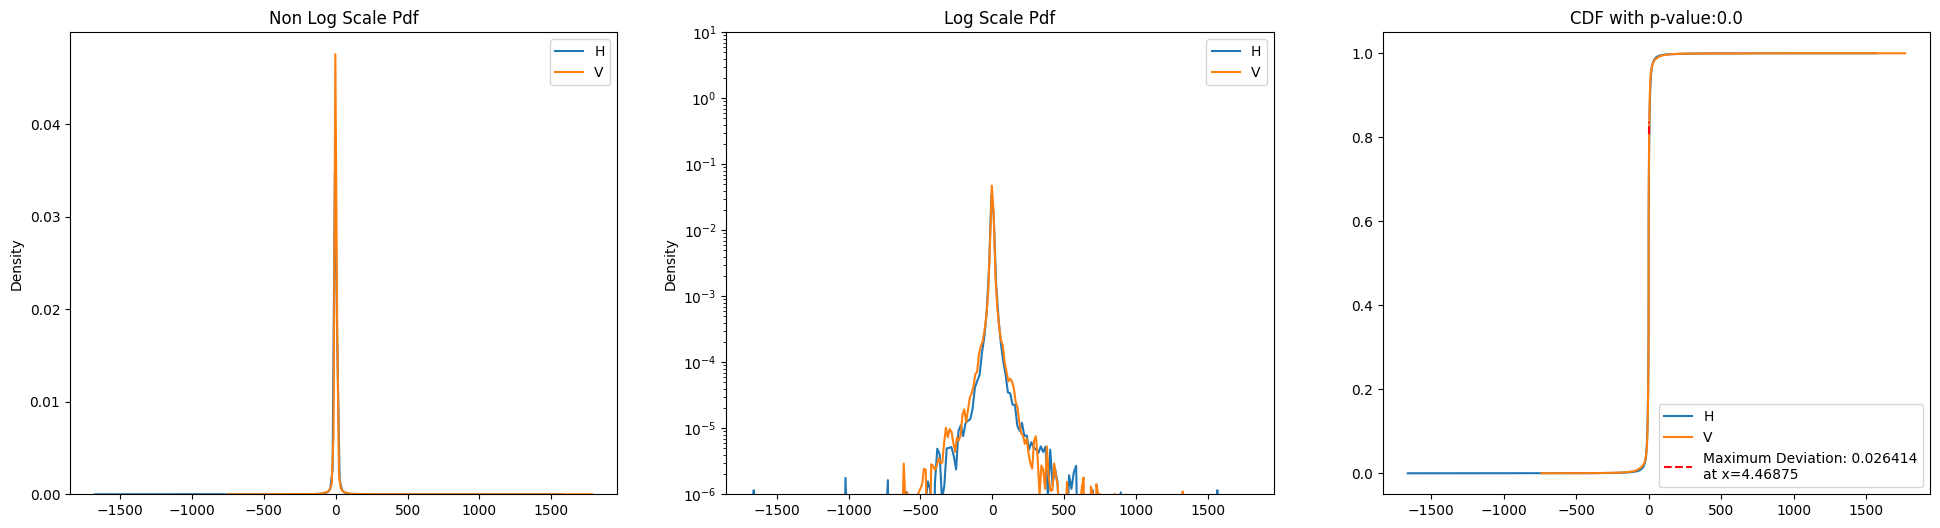

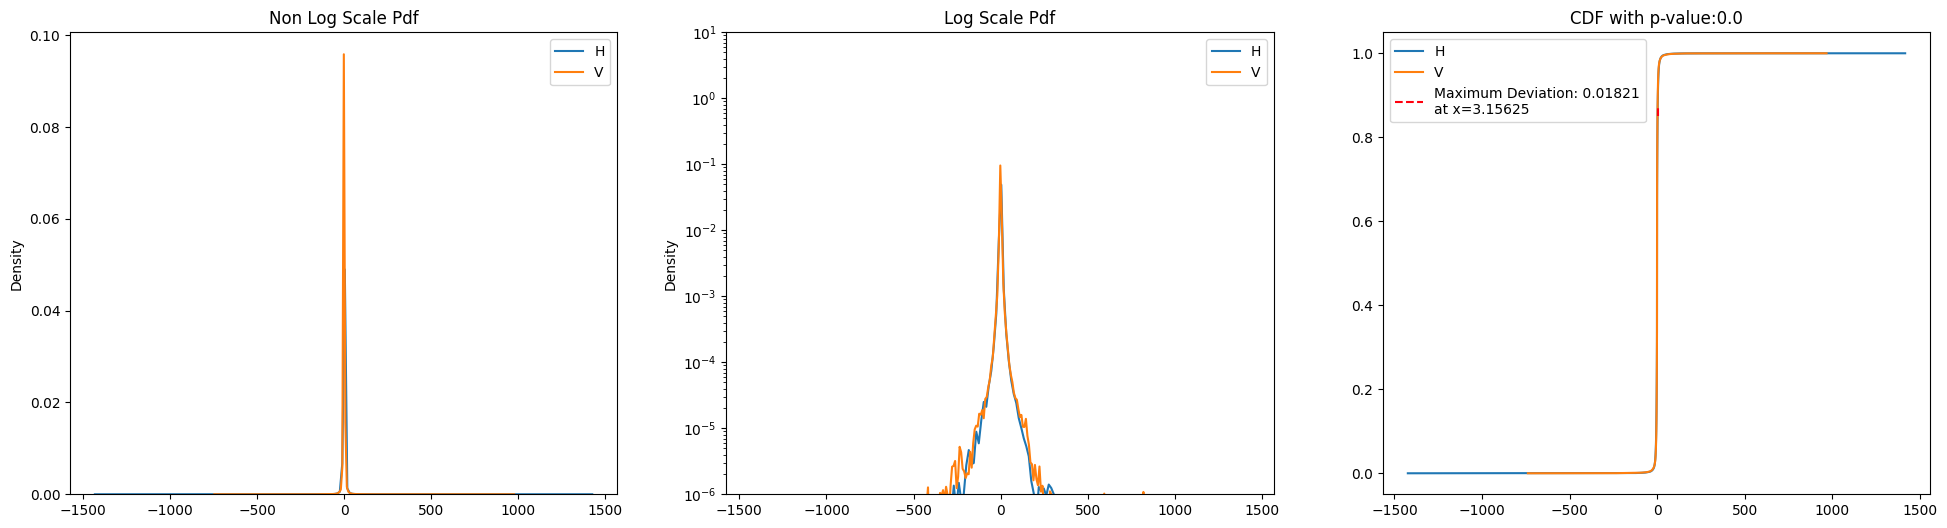

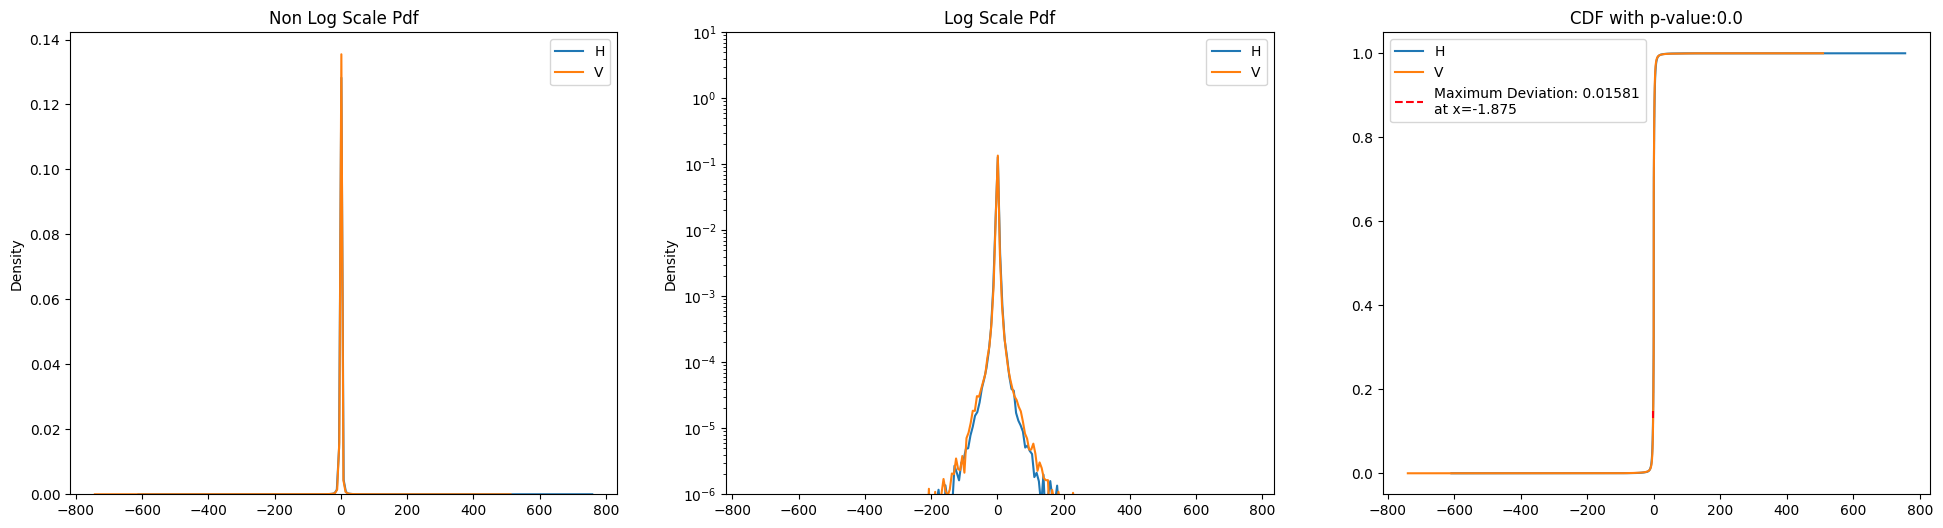

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


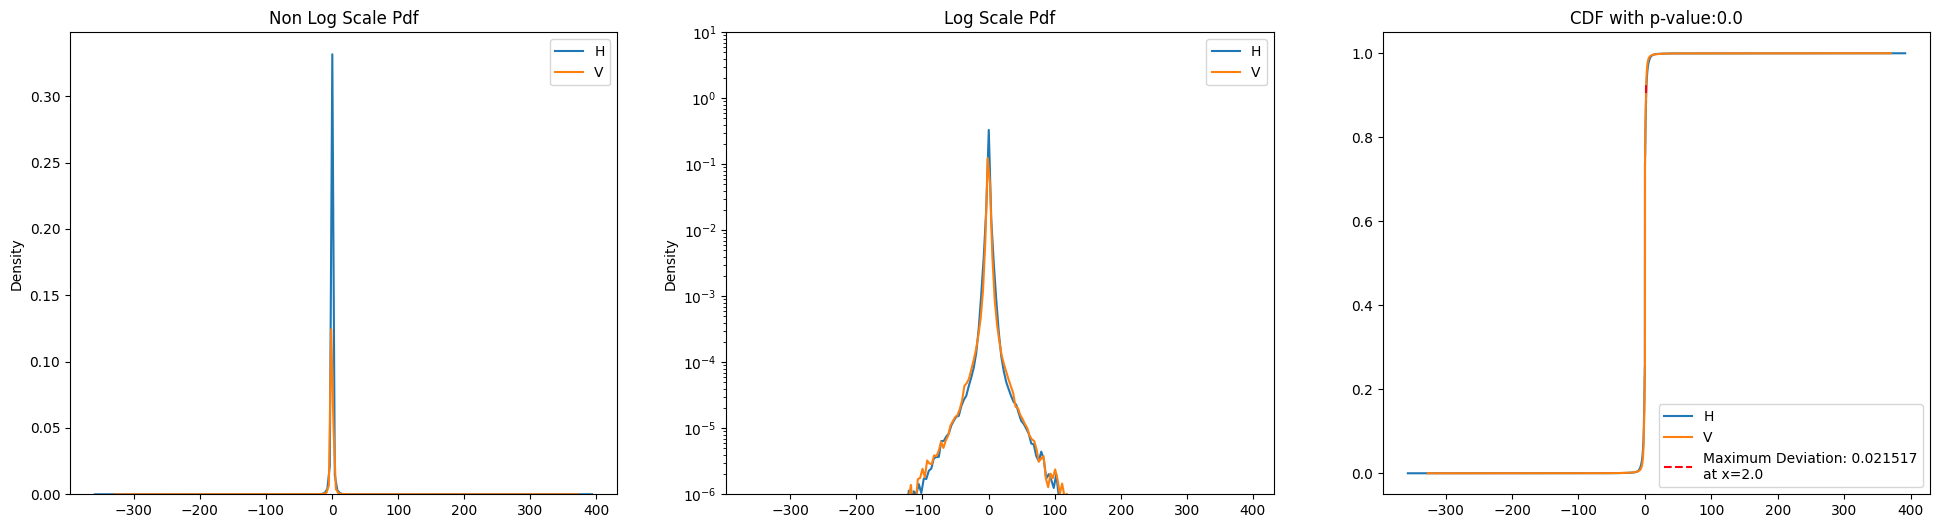

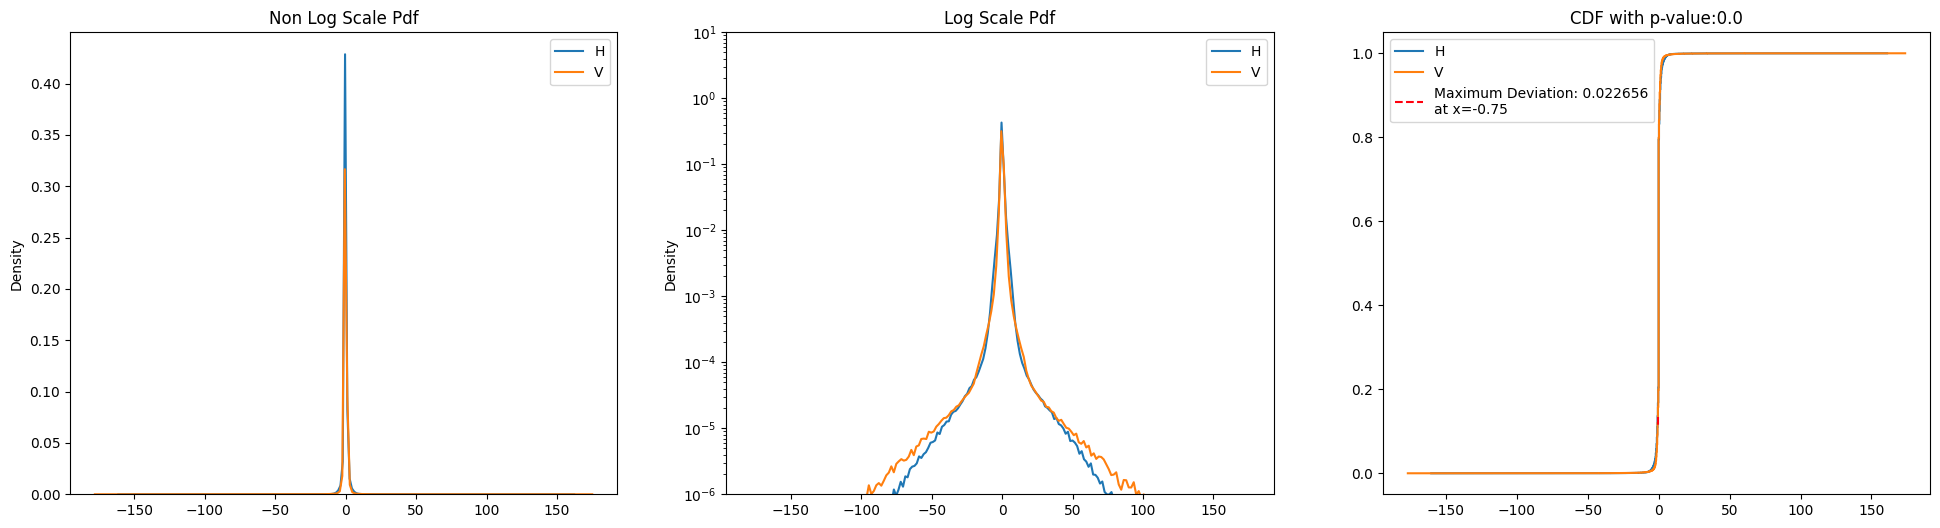

In [44]:
for i in range(2, 10):
    layer_df = infra_wv[infra_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")